In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import scipy.stats as stats

In [3]:
from sklearn.model_selection import KFold, cross_val_score

from sklearn.neighbors import KNeighborsRegressor

from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit, LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor

from xgboost import XGBRegressor

from pycaret.regression import *

import optuna

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn. metrics import mean_absolute_error, mean_squared_error,r2_score,make_scorer

In [7]:
data = pd.read_csv("D:/00-Data Science and Data Analysis/ML Projects/03-Weight prediction for data from ZS-Egypt -first project/ENG_Hadi_Output.csv")

In [8]:
data.columns

Index(['Serial', 'Bldg No', 'Area No', 'Width', 'Length', 'Eave Height',
       'Roof Slope', 'Roof Area', 'Bay Spacing', 'Frame Type',
       'No of Main Frames', 'No of Post and Beams', 'Live Load',
       ' Collateral Load', 'Snow Load', 'Wind', 'Total Weight', 'Weight_1',
       'Weight_2', 'Weight_3', 'Weight_4', 'Weight_5', 'Weight_6', 'Weight_7',
       'Weight_8', 'Weight_9', 'Weight_10', 'Weight_11', 'Mezz', 'Crane',
       'Notes', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [9]:
# renaming target columns to 'Frames','CF (C&Z)', 'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims', 'Decking','Joist', 
#'St. BO- Anchor Bolts', 'SP. BO', 'Special Works'

In [10]:
data.columns=['Serial', 'Bldg No', 'Area No', 'Width', 'Length', 'Eave Height',
       'Roof Slope', 'Roof Area', 'Bay Spacing', 'Frame Type',
       'No of Main Frames', 'No of Post and Beams', 'Live Load',
       ' Collateral Load', 'Snow Load', 'Wind', 'Total Weight', 'Frames',
       'CF (C&Z)', 'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims', 'Decking',
       'Joist', 'St. BO- Anchor Bolts', 'SP. BO', 'Special Works', 'Mezz', 'Crane',
       'Notes', 'Unnamed: 31', 'Unnamed: 32']

In [11]:
data.head()

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
0,1,B1,A1,9.25,44.624,3.64,0.5,412.772,APC,LEAN-TO,14,0,0.57,0,0,Wind Pressure = 0.681 (KN/m²),18707.72835,8400.3296,2205.44202,1172.89,0,5760,624.718094,215.82,0,178.37864,150.15,0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
1,2,B02,A1,34.6,47,21.55,4,1626.2,1@7.90 + 4@7.80 + 1@7.90,CS,5,2,0.58,0,0,Wind Pressure = 0.68 (KN/m²),221713.4722,115231.25,17331.0892,4943.04,279.342,81759,462.48,0,0,1108.241,599.03,0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
2,3,B03,SHED-A1,66.028,25.073,7.85,0,1655.520044,APD,APD,0,0,0,0,0,Wind Speed = 0 (km/H),67687.9816,49013.0279,6959.0128,1730.5,7597.08,0,858.0529,0,0,1055.74,474.568,0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
3,4,B1,A1,24,34.5,30,0,828,,,0,0,0,0,0,Wind Speed = 0 (km/H),372209.3812,284448.48,13307.5728,16715.03367,197.6,31993,1408.279995,17718.40979,0,6370.004929,51,0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
4,5,B25,A1,5.7,9.87,4,0.8,56.259,1@9.87,SS,2,0,0.57,0.5,0,Wind Speed = 36 (km/H),7214.092578,2258.493483,1631.1918,197.52,0,2943.656439,102.4589,0,0,37.87195554,42.9,0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Serial                507 non-null    int64 
 1   Bldg No               507 non-null    object
 2   Area No               507 non-null    object
 3   Width                 507 non-null    object
 4   Length                507 non-null    object
 5   Eave Height           507 non-null    object
 6   Roof Slope            507 non-null    object
 7   Roof Area             507 non-null    object
 8   Bay Spacing           507 non-null    object
 9   Frame Type            507 non-null    object
 10  No of Main Frames     507 non-null    object
 11  No of Post and Beams  507 non-null    object
 12  Live Load             507 non-null    object
 13   Collateral Load      507 non-null    object
 14  Snow Load             507 non-null    object
 15  Wind                  507 non-null    ob

In [13]:
data['Mezz'].value_counts()

NO           366
YES          134
0              2
1204.5         1
1824.5245      1
1069.028       1
656.436        1
               1
Name: Mezz, dtype: int64

In [14]:
data['Crane'].value_counts()

NO      457
YES      45
0         4
          1
Name: Crane, dtype: int64

In [15]:
# we will work on a copy of the data

In [16]:
data1 = data.copy()

In [17]:
# all dtypes in columns are 'object' while most should be numeric, we will change dtypes to floats or ints column by column
# using .astype method

In [18]:
# not all charachters in column are numeric, so we will create a function to filter cells where there are non numeric 
# characters

In [19]:
def is_alpha(x):
    bol=False
    try:
        for i in x:
            if i.isnumeric() or i== '.':
                pass
            else:
                bol=True
    except TypeError :
        return bol
    return bol

In [20]:
data1[data1['Width'].apply(is_alpha)]['Width']

353         A02 
400     A2 & A3 
439             
Name: Width, dtype: object

In [21]:
data.loc[[353,400,439]]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
353,354,B1,A1,A02,50.25,100.2,9.4,1,4930,15@5.00 + 1@5.20,MS,22,2,0.58,0.25,0,Wind Speed = 137 (km/H),235408.1169,117071.404,34323.74945,14349.20124,35004.95237,19678.92,3866.363374,7341.84,0,2968.550918,803.1355,0,YES,NO,File is having some Warnings.,NaN
400,401,B1,A1,A2 & A3,126.3,60,8,1,6320,1@7.925 - 6@7.340 - 1@7.925,MG2-MS1 & MS1,9,0,0.58,0,0,Wind Speed = 137 (km/H),195306.2766,82136.9174,40625.17944,5108.1208,56067.19312,0,5916.867585,0,0,2933.91668,2518.0816,0,NO,NO,File is having some Warnings.,NaN
439,440,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,File is having some Errors!,NaN,NaN


In [22]:
# 'Width' values in rows 353 and 400 are strings 'A02' and 'A2 & A03'
# we will delete these 2 cells and shift cells in the rows to the left
# we will add nan values to the cells at the end of the rows
# row no. 439 is an empty row so we will delete 

In [23]:
data1.loc[353].values

array([354, 'B1 ', 'A1', 'A02 ', '50.25', '100.2', '9.4', '1', '4930',
       '15@5.00 + 1@5.20  ', 'MS ', '22', '2', '0.58', '0.25', '0',
       'Wind Speed = 137 (km/H) ', '235408.1169', '117071.404',
       '34323.74945', '14349.20124', '35004.95237', '19678.92',
       '3866.363374', '7341.84', '0', '2968.550918', '803.1355', '0',
       'YES ', 'NO ', 'File is having some Warnings.  ', nan],
      dtype=object)

In [24]:
values_353 = data1.loc[353].values
values_353 = np.delete(values_353,3)
values_353 = np.append(values_353,np.nan)

In [25]:
data1.loc[353] = values_353

In [26]:
data1.loc[353].values

array([354, 'B1 ', 'A1', '50.25', '100.2', '9.4', '1', '4930',
       '15@5.00 + 1@5.20  ', 'MS ', '22', '2', '0.58', '0.25', '0',
       'Wind Speed = 137 (km/H) ', '235408.1169', '117071.404',
       '34323.74945', '14349.20124', '35004.95237', '19678.92',
       '3866.363374', '7341.84', '0', '2968.550918', '803.1355', '0',
       'YES ', 'NO ', 'File is having some Warnings.  ', nan, nan],
      dtype=object)

In [27]:
data1.loc[400].values

array([401, 'B1 ', 'A1 ', ' A2 & A3 ', '126.3', '60', '8', '1', '6320',
       '1@7.925 - 6@7.340 - 1@7.925 ', 'MG2-MS1 & MS1 ', '9', '0', '0.58',
       '0', '0', 'Wind Speed = 137 (km/H) ', '195306.2766', '82136.9174',
       '40625.17944', '5108.1208', '56067.19312', '0', '5916.867585', '0',
       '0', '2933.91668', '2518.0816', '0', 'NO ', 'NO ',
       'File is having some Warnings.  ', nan], dtype=object)

In [28]:
values_400 = data1.loc[400].values
values_400 = np.delete(values_400,3)
values_400 = np.append(values_400,np.nan)

In [29]:
data1.loc[400] = values_400

In [30]:
data1.loc[400].values

array([401, 'B1 ', 'A1 ', '126.3', '60', '8', '1', '6320',
       '1@7.925 - 6@7.340 - 1@7.925 ', 'MG2-MS1 & MS1 ', '9', '0', '0.58',
       '0', '0', 'Wind Speed = 137 (km/H) ', '195306.2766', '82136.9174',
       '40625.17944', '5108.1208', '56067.19312', '0', '5916.867585', '0',
       '0', '2933.91668', '2518.0816', '0', 'NO ', 'NO ',
       'File is having some Warnings.  ', nan, nan], dtype=object)

In [31]:
data1.drop(439,axis=0,inplace  = True)

In [32]:
data1['Width'] = data1['Width'].astype('float')

In [33]:
# values in 'Width' column have been transformed to floats successfuly

In [34]:
# Next is 'Length' column
# we run the custom function is_alpha() to each column to check that all charachters in columns are all numeric so we can 
# transform data without errors

In [35]:
data1[data1['Length'].apply(is_alpha)]['Length']

Series([], Name: Length, dtype: object)

In [36]:
# no non numeric characters so we proceed with column transformation

In [37]:
data1['Length'] = data1['Length'].astype('float')

In [38]:
# 'Eave Height' column

In [39]:
data1[data1['Eave Height'].apply(is_alpha)]['Eave Height']

Series([], Name: Eave Height, dtype: object)

In [40]:
data1['Eave Height'] = data1['Eave Height'].astype('float')

In [41]:
# 'Slope' column

In [42]:
data1[data1['Roof Slope'].apply(is_alpha)]['Roof Slope']

487    -1
Name: Roof Slope, dtype: object

In [43]:
# it is OK to have a negative value..proceed

In [44]:
data1['Roof Slope'] = data1['Roof Slope'].astype('float')

In [45]:
# 'Roof Area' column

In [46]:
data1[data1['Roof Area'].apply(is_alpha)]['Roof Area']

Series([], Name: Roof Area, dtype: object)

In [47]:
data1['Roof Area'] = data1['Roof Area'].astype('float')

In [48]:
# 'No of Main Frames' column

In [49]:
data1[data1['No of Main Frames'].apply(is_alpha)]['No of Main Frames']

21                            1@8.40 + 8@8.00 + 1@8.585 
48                                 1@7.35+6@7.50+1@7.35 
354                                    6@5.10 + 6@5.00  
436     1@8.085 +  3@7.50 +  3@8.00 +  2@7.00 +  1@6....
Name: No of Main Frames, dtype: object

In [50]:
# we check rows above one by one

In [51]:
data1.loc[21]

Serial                                                                 22
Bldg No                                                               B1 
Area No                                                                A1
Width                                                                 2.0
Length                                                                3.0
Eave Height                                                          51.1
Roof Slope                                                         80.985
Roof Area                                                            13.9
Bay Spacing                                                             1
Frame Type                                                      4138.3335
No of Main Frames                              1@8.40 + 8@8.00 + 1@8.585 
No of Post and Beams                                                MS-1 
Live Load                                                               8
 Collateral Load                      

In [52]:
# data in row 21 is shifted by 2 cells towards the right as (Width and length columns have illogic values of 2.0 and 3.0 which 
# should be enquired about from ZSE)
# the two cells shall be deleted from the row and all cells shall be shifted to the left and 2 nan values shall be appended 
# at the end of the row

In [53]:
values_21 = data1.loc[21].values
values_21 = np.delete(values_21,[3,4])
values_21 = np.append(values_21,[np.nan,np.nan])
data1.loc[21]= values_21
data1.loc[21]

Serial                                                                 22
Bldg No                                                               B1 
Area No                                                                A1
Width                                                                51.1
Length                                                             80.985
Eave Height                                                          13.9
Roof Slope                                                              1
Roof Area                                                       4138.3335
Bay Spacing                                    1@8.40 + 8@8.00 + 1@8.585 
Frame Type                                                          MS-1 
No of Main Frames                                                       8
No of Post and Beams                                                    0
Live Load                                                            0.57
 Collateral Load                      

In [54]:
data1.loc[48]

Serial                                                                 49
Bldg No                                                              B02 
Area No                                                                A1
Width                                                                 2.0
Length                                                                3.0
Eave Height                                                          24.0
Roof Slope                                                          61.17
Roof Area                                                            13.6
Bay Spacing                                                             1
Frame Type                                                        1468.08
No of Main Frames                                   1@7.35+6@7.50+1@7.35 
No of Post and Beams                                                  CS 
Live Load                                                               9
 Collateral Load                      

In [55]:
# data in row 48 is shifted by 2 cells to the right thus (Widht = 2.0 ,length = 3.0) shall be deleted from the row and
# 48 nan values shall be appended to the end of the row

In [56]:
values_48 = data1.loc[48].values
values_48 = np.delete(values_48,[3,4])
values_48 = np.append(values_48,[np.nan,np.nan])
data1.loc[48]= values_48
data1.loc[48]

Serial                                                                 49
Bldg No                                                              B02 
Area No                                                                A1
Width                                                                24.0
Length                                                              61.17
Eave Height                                                          13.6
Roof Slope                                                              1
Roof Area                                                         1468.08
Bay Spacing                                         1@7.35+6@7.50+1@7.35 
Frame Type                                                            CS 
No of Main Frames                                                       9
No of Post and Beams                                                    0
Live Load                                                            0.57
 Collateral Load                      

In [57]:
data1.loc[354]

Serial                                       355
Bldg No                                     B02 
Area No                                       A1
Width                                        2.0
Length                                       3.0
Eave Height                                100.6
Roof Slope                                  60.6
Roof Area                                    8.3
Bay Spacing                                    1
Frame Type                                  5051
No of Main Frames              6@5.10 + 6@5.00  
No of Post and Beams                         MG 
Live Load                                     11
 Collateral Load                               2
Snow Load                                   0.58
Wind                                           0
Total Weight                                   0
Frames                  Wind Speed = 137 (km/H) 
CF (C&Z)                             139946.5909
Sundry Parts                             59538.8
Sheeting            

In [58]:
values_354 = data1.loc[354].values
values_354 = np.delete(values_354,[3,4])
values_354 = np.append(values_354,[np.nan,np.nan])
data1.loc[354] = values_354
data1.loc[354]

Serial                                       355
Bldg No                                     B02 
Area No                                       A1
Width                                      100.6
Length                                      60.6
Eave Height                                  8.3
Roof Slope                                     1
Roof Area                                   5051
Bay Spacing                    6@5.10 + 6@5.00  
Frame Type                                   MG 
No of Main Frames                             11
No of Post and Beams                           2
Live Load                                   0.58
 Collateral Load                               0
Snow Load                                      0
Wind                    Wind Speed = 137 (km/H) 
Total Weight                         139946.5909
Frames                                   59538.8
CF (C&Z)                              26703.0828
Sundry Parts                          15047.1048
Sheeting            

In [59]:
data1.loc[436]

Serial                                                                437
Bldg No                                                               B1 
Area No                                                                A1
Width                                                                 2.0
Length                                                                3.0
Eave Height                                                        65.867
Roof Slope                                                          75.17
Roof Area                                                            10.0
Bay Spacing                                                             1
Frame Type                                                           3937
No of Main Frames        1@8.085 +  3@7.50 +  3@8.00 +  2@7.00 +  1@6....
No of Post and Beams                                                 MS1 
Live Load                                                              11
 Collateral Load                      

In [60]:
values_436 = data1.loc[436].values
values_436 = np.delete(values_436,[3,4])
values_436 = np.append(values_436,[np.nan,np.nan])
data1.loc[436] = values_436
data1.loc[436]

Serial                                                                437
Bldg No                                                               B1 
Area No                                                                A1
Width                                                              65.867
Length                                                              75.17
Eave Height                                                          10.0
Roof Slope                                                              1
Roof Area                                                            3937
Bay Spacing              1@8.085 +  3@7.50 +  3@8.00 +  2@7.00 +  1@6....
Frame Type                                                           MS1 
No of Main Frames                                                      11
No of Post and Beams                                                    0
Live Load                                                            0.57
 Collateral Load                      

In [61]:
data1['No of Main Frames'] = data1['No of Main Frames'].astype('int64')

In [62]:
# 'No of Post and Beams' colunm

In [63]:
data1[data1['No of Post and Beams'].apply(is_alpha)]['No of Post and Beams']

Series([], Name: No of Post and Beams, dtype: object)

In [64]:
data1['No of Post and Beams'] = data1['No of Post and Beams'].astype('int64')

In [65]:
# 'Live Load' colunm

In [66]:
data1[data1['Live Load'].apply(is_alpha)]['Live Load']

Series([], Name: Live Load, dtype: object)

In [67]:
data1['Live Load'] = data1['Live Load'].astype('float')

In [68]:
# 'Collateral Load' column

In [69]:
data1[data1[' Collateral Load'].apply(is_alpha)][' Collateral Load']

Series([], Name:  Collateral Load, dtype: object)

In [70]:
data1[' Collateral Load'] = data1[' Collateral Load'].astype('float')

In [71]:
# 'Snow Load' column

In [72]:
data1[data1['Snow Load'].apply(is_alpha)]['Snow Load']

Series([], Name: Snow Load, dtype: object)

In [73]:
data1['Snow Load'] = data1['Snow Load'].astype('float')

In [74]:
# 'Wind' colunm

In [75]:
data1[data1['Wind'].apply(is_alpha)]['Wind']

0      Wind Pressure = 0.681 (KN/m²) 
1       Wind Pressure = 0.68 (KN/m²) 
2              Wind Speed = 0 (km/H) 
3              Wind Speed = 0 (km/H) 
4             Wind Speed = 36 (km/H) 
                    ...              
502      Wind Speed = 221.364 (km/H) 
503          Wind Speed = 220 (km/H) 
504          Wind Speed = 145 (km/H) 
505          Wind Speed = 145 (km/H) 
506        Wind Speed = 141.2 (km/H) 
Name: Wind, Length: 506, dtype: object

In [76]:
# We will carfully check this column later after finishing the rest of the columns

In [77]:
# 'Total Weight' column

In [78]:
data1[data1['Total Weight'].apply(is_alpha)]['Total Weight']

Series([], Name: Total Weight, dtype: object)

In [79]:
data1['Total Weight'] = data1['Total Weight'].astype('float')

In [80]:
# wi will convert the rest of weight columns at once

In [81]:
data1[['Frames',
       'CF (C&Z)', 'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims', 'Decking',
       'Joist', 'St. BO- Anchor Bolts', 'SP. BO', 'Special Works']] = data1[['Frames',
       'CF (C&Z)', 'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims', 'Decking',
       'Joist', 'St. BO- Anchor Bolts', 'SP. BO', 'Special Works']].astype('float')

In [82]:
data1[['Frames',
       'CF (C&Z)', 'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims', 'Decking',
       'Joist', 'St. BO- Anchor Bolts', 'SP. BO', 'Special Works']]

,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works
0,8400.329600,2205.44202,1172.890000,0.000000,5760.000000,624.718094,215.82000,0.0,178.378640,150.15000,0.0
1,115231.250000,17331.08920,4943.040000,279.342000,81759.000000,462.480000,0.00000,0.0,1108.241000,599.03000,0.0
2,49013.027900,6959.01280,1730.500000,7597.080000,0.000000,858.052900,0.00000,0.0,1055.740000,474.56800,0.0
3,284448.480000,13307.57280,16715.033670,197.600000,31993.000000,1408.279995,17718.40979,0.0,6370.004929,51.00000,0.0
4,2258.493483,1631.19180,197.520000,0.000000,2943.656439,102.458900,0.00000,0.0,37.871956,42.90000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
502,137886.518500,112865.29980,22735.878330,47404.642200,0.000000,8285.413599,0.00000,0.0,3564.334755,2284.32706,0.0
503,114972.550700,59097.31520,6017.966256,64715.360000,0.000000,5263.127888,0.00000,0.0,2651.480000,2899.14440,0.0
504,5119.300000,4774.38320,783.609600,0.000000,0.000000,30.159000,0.00000,0.0,120.850000,1457.93752,0.0
505,41396.410330,11054.47000,11834.266400,3255.161233,0.000000,138.159000,0.00000,0.0,400.086500,525.98400,0.0


In [83]:
data1[['Notes', 'Unnamed: 31', 'Unnamed: 32']]

,Notes,Unnamed: 31,Unnamed: 32
0,File is not using the Latest PriceBook in Fact...,NaN,NaN
1,File is not using the Latest PriceBook in Fact...,NaN,NaN
2,File is not using the Latest PriceBook in Fact...,NaN,NaN
3,File is not using the Latest PriceBook in Fact...,NaN,NaN
4,File is not using the Latest PriceBook in Fact...,NaN,NaN
...,...,...,...
502,No TML report found.,NaN,NaN
503,File is having some Warnings.,NaN,NaN
504,File is having some Warnings.,NaN,NaN
505,File is having some Warnings.,NaN,NaN


In [84]:
data1['Notes'].value_counts()

File is not using the Latest PriceBook in Factory: ZSE     321
File is having some Warnings.                              162
No TML report found.                                        20
                                                             3
Name: Notes, dtype: int64

In [85]:
data1['Unnamed: 31'].isna().sum()

506

In [86]:
data1['Unnamed: 32'].isna().sum()

506

In [87]:
# double check data type per column

In [88]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 506
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Serial                506 non-null    int64  
 1   Bldg No               506 non-null    object 
 2   Area No               506 non-null    object 
 3   Width                 506 non-null    float64
 4   Length                506 non-null    float64
 5   Eave Height           506 non-null    float64
 6   Roof Slope            506 non-null    object 
 7   Roof Area             506 non-null    object 
 8   Bay Spacing           506 non-null    object 
 9   Frame Type            506 non-null    object 
 10  No of Main Frames     506 non-null    int64  
 11  No of Post and Beams  506 non-null    int64  
 12  Live Load             506 non-null    float64
 13   Collateral Load      506 non-null    float64
 14  Snow Load             506 non-null    float64
 15  Wind                  5

In [89]:
# 'Roof Area' and 'Roof Slope' columns are still 'object' due to cell shifting. we need to run the code for column 
# transformation above agian

In [90]:
data1['Roof Slope'] = data1['Roof Slope'].astype('float')
data1['Roof Area'] = data1['Roof Area'].astype('float')

### A  tempcon panels roof cladding shall affect the target weights columns but data does not have a column with such info. so we will add a feature column 'Tempcon' to the data with 0 or 1 values where 0 is for building without Tempcon and 1 for Buildings With Tempcon

In [91]:
data1['Tempcon Panels'].value_counts()

0.000000e+00    327
2.242881e+04      3
3.250734e+04      3
5.988013e+04      2
5.976280e+04      2
5.520605e+05      2
4.437820e+04      2
1.757587e+04      2
1.098972e+05      2
4.456239e+04      2
5.262875e+04      2
7.864608e+04      2
1.325378e+05      1
1.059840e+05      1
1.542400e+04      1
3.478124e+05      1
4.950000e+04      1
1.717980e+05      1
2.329800e+04      1
3.270583e+05      1
2.471200e+03      1
9.709440e+03      1
7.858092e+04      1
2.375184e+05      1
4.229040e+04      1
5.594913e+03      1
2.250120e+05      1
3.035019e+04      1
8.422464e+03      1
6.221898e+04      1
3.352800e+04      1
3.429144e+03      1
6.348000e+04      1
4.740000e+04      1
4.234800e+04      1
3.119368e+04      1
2.202240e+04      1
3.964800e+04      1
5.008800e+04      1
1.170657e+06      1
4.666800e+04      1
1.816800e+05      1
1.064240e+04      1
9.005394e+04      1
3.612240e+03      1
1.558704e+05      1
1.421084e+05      1
1.364220e+04      1
3.968360e+04      1
6.374400e+04      1


In [92]:
data1['Tempcon Panels'].value_counts().index[0]

0.0

In [93]:
tempcon = data1['Tempcon Panels'].apply(lambda x : 0 if x==0 else 1)

In [94]:
tempcon

0      1
1      1
2      0
3      1
4      1
      ..
502    0
503    0
504    0
505    0
506    0
Name: Tempcon Panels, Length: 506, dtype: int64

In [95]:
data1.insert(12,'Tempcon',tempcon)

In [96]:
data1.head()

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
0,1,B1,A1,9.250,44.624,3.64,0.5,412.772000,APC,LEAN-TO,14,0,1,0.57,0.0,0.0,Wind Pressure = 0.681 (KN/m²),18707.728350,8400.329600,2205.44202,1172.89000,0.000,5760.000000,624.718094,215.82000,0.0,178.378640,150.150,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
1,2,B02,A1,34.600,47.000,21.55,4.0,1626.200000,1@7.90 + 4@7.80 + 1@7.90,CS,5,2,1,0.58,0.0,0.0,Wind Pressure = 0.68 (KN/m²),221713.472200,115231.250000,17331.08920,4943.04000,279.342,81759.000000,462.480000,0.00000,0.0,1108.241000,599.030,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
2,3,B03,SHED-A1,66.028,25.073,7.85,0.0,1655.520044,APD,APD,0,0,0,0.00,0.0,0.0,Wind Speed = 0 (km/H),67687.981600,49013.027900,6959.01280,1730.50000,7597.080,0.000000,858.052900,0.00000,0.0,1055.740000,474.568,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
3,4,B1,A1,24.000,34.500,30.00,0.0,828.000000,,,0,0,1,0.00,0.0,0.0,Wind Speed = 0 (km/H),372209.381200,284448.480000,13307.57280,16715.03367,197.600,31993.000000,1408.279995,17718.40979,0.0,6370.004929,51.000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
4,5,B25,A1,5.700,9.870,4.00,0.8,56.259000,1@9.87,SS,2,0,1,0.57,0.5,0.0,Wind Speed = 36 (km/H),7214.092578,2258.493483,1631.19180,197.52000,0.000,2943.656439,102.458900,0.00000,0.0,37.871956,42.900,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [97]:
# let's check if no of 0 values in the inserted column are 327 which is the same no. of buildings that have Tempcon weight in data1

In [98]:
data1['Tempcon'].value_counts()

0    327
1    179
Name: Tempcon, dtype: int64

In [99]:
# now we check column "Bay Spacing"

In [100]:
pd.get_option("display.max_rows")

500

In [101]:
pd.set_option("display.max_rows", None)

In [102]:
data1[['Width','Length','Bay Spacing','Frame Type','No of Main Frames','No of Post and Beams','Frames','CF (C&Z)']]

,Width,Length,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Frames,CF (C&Z)
0,9.250,44.624,APC,LEAN-TO,14,0,8.400330e+03,2205.442020
1,34.600,47.000,1@7.90 + 4@7.80 + 1@7.90,CS,5,2,1.152312e+05,17331.089200
2,66.028,25.073,APD,APD,0,0,4.901303e+04,6959.012800
3,24.000,34.500,,,0,0,2.844485e+05,13307.572800
4,5.700,9.870,1@9.87,SS,2,0,2.258493e+03,1631.191800
5,13.762,19.970,1@5.385; 3@3.300; 1@4.685,CS,6,0,5.002807e+03,1502.472824
6,10.950,20.270,1@4.785; 1@4.200; 1@6.500; 1@4.785,CS,5,0,8.806745e+03,2101.520340
7,3.218,14.570,2@7.285,SS,3,0,2.605676e+03,944.680649
8,3.700,7.170,1@7.17,SS,2,0,1.730020e+03,415.621800
9,8.700,32.420,1@5.935; 3@5.400; 1@4.850; 1@5.435,SS,7,0,5.464868e+03,2165.159000


In [103]:
# Will create a bays() function that takes in string values in 'Bay Spacing' column and retuns an unpacked list of bays so we 
#can deal with it later
def bays(x):
    x = str(x)
    x = x.replace(';',' ')
    x = x.replace('+',' ')
    x = x.replace('&',' ')
    x = x.replace('-',' ')
    x = x.replace(' @ ','@')
    x = x.replace(' @','@')
    x = x.replace('@ ','@')
    x = x.replace('m','')
    x = x.split()
    bays=[]
    try:
        for n in x:
            bays = bays + int(float(n.split('@')[0])) * [float(n.split('@')[1])]
        if len(bays) == 0:
            return np.nan
        else:
            return bays
    except ValueError:
        return np.nan
    except IndexError:
        return np.nan

In [104]:
bays('1@7.40+1@7+9@7.43+1@7.83')

[7.4, 7.0, 7.43, 7.43, 7.43, 7.43, 7.43, 7.43, 7.43, 7.43, 7.43, 7.83]

In [105]:
data1.loc[408,['Bay Spacing','Length']]

Bay Spacing    2@6.11;426.7 ;1@6.3 
Length                        45.62
Name: 408, dtype: object

In [106]:
# changing the bay spacing for record 408 to bay spacing that is equal to building length

In [107]:
data1.loc[408,'Bay Spacing'] = '2@6.11+4@6.7+1@6.6'

In [108]:
data1.loc[408,'Bay Spacing']

'2@6.11+4@6.7+1@6.6'

In [109]:
bay_lst = data1['Bay Spacing'].apply(bays)

In [110]:
bay_lst

0                                                    NaN
1                         [7.9, 7.8, 7.8, 7.8, 7.8, 7.9]
2                                                    NaN
3                                                    NaN
4                                                 [9.87]
5                          [5.385, 3.3, 3.3, 3.3, 4.685]
6                               [4.785, 4.2, 6.5, 4.785]
7                                         [7.285, 7.285]
8                                                 [7.17]
9                    [5.935, 5.4, 5.4, 5.4, 4.85, 5.435]
10            [6.45, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.25]
11      [7.85, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.65]
12     [6.7, 6.75, 6.75, 6.75, 6.75, 6.75, 7.55, 7.5,...
13                                                   NaN
14     [7.8, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...
15                 [6.28, 6.5, 6.5, 6.5, 6.5, 6.5, 6.72]
16     [7.2, 5.2, 5.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, ...
17     [7.2, 5.2, 5.2, 7.2, 7.2

In [111]:
bay_lst.isna().sum()

91

In [112]:
data1[bay_lst.isna()][['Length','Bay Spacing']]

,Length,Bay Spacing
0,44.624,APC
2,25.073,APD
3,34.500,
13,93.550,APC
24,1.000,ARF
25,30.000,
42,8.400,APC
43,8.150,APC
44,35.400,APC
50,0.000,


In [113]:
# inserting a column with bay spacing lists into the data1 dataframe

In [114]:
data1.insert(8,'bay_spacing',bay_lst)

In [115]:
data1[bay_lst.isna()][['Length','Bay Spacing','bay_spacing','Frame Type']]

,Length,Bay Spacing,bay_spacing,Frame Type
0,44.624,APC,NaN,LEAN-TO
2,25.073,APD,NaN,APD
3,34.500,,NaN,
13,93.550,APC,NaN,APC
24,1.000,ARF,NaN,0
25,30.000,,NaN,
42,8.400,APC,NaN,APC
43,8.150,APC,NaN,FR
44,35.400,APC,NaN,APC
50,0.000,,NaN,


In [116]:
data1[bay_lst.isna()]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
0,1,B1,A1,9.250,44.624,3.640,0.5000,412.772000,NaN,APC,LEAN-TO,14,0,1,0.57,0.00,0.0,Wind Pressure = 0.681 (KN/m²),1.870773e+04,8.400330e+03,2205.442020,1172.890000,0.000000,5760.00000,624.718094,215.82000,0.0,178.378640,150.150000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
2,3,B03,SHED-A1,66.028,25.073,7.850,0.0000,1655.520044,NaN,APD,APD,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),6.768798e+04,4.901303e+04,6959.012800,1730.500000,7597.080000,0.00000,858.052900,0.00000,0.0,1055.740000,474.568000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
3,4,B1,A1,24.000,34.500,30.000,0.0000,828.000000,NaN,,,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),3.722094e+05,2.844485e+05,13307.572800,16715.033670,197.600000,31993.00000,1408.279995,17718.40979,0.0,6370.004929,51.000000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
13,14,10,,32.100,93.550,0.000,1.0000,3002.955000,NaN,APC,APC,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.967829e+05,2.430473e+05,15201.924800,20770.412090,0.000000,13773.12000,892.087240,0.00000,0.0,2038.680000,1059.383400,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
24,25,B1,,1.000,1.000,1.000,0.0000,1.000000,NaN,ARF,0,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),5.067834e+03,3.210504e+03,1205.938400,8.640000,327.770000,0.00000,206.431869,0.00000,0.0,26.050000,82.500000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
25,26,,,30.000,30.000,6.000,0.0000,465.500000,NaN,,,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),7.791409e+04,7.120200e+04,0.000000,732.486000,0.000000,0.00000,0.000000,5979.60000,0.0,0.000000,0.000000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
42,43,B4,A1,8.400,8.400,0.000,0.0000,70.560000,NaN,APC,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),4.254415e+03,2.468713e+03,318.017280,92.000000,972.983000,0.00000,147.074400,0.00000,0.0,186.328000,69.300000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
43,44,B5,A1,8.150,8.150,4.700,0.0000,66.422500,NaN,APC,FR,0,0,0,0.00,0.00,0.0,Wind Speed = 33 (km/H),1.690432e+04,1.556798e+04,0.000000,691.018200,0.000000,0.00000,0.000000,542.59920,0.0,102.720000,0.000000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
44,45,MAIN FACTORY,A1,12.000,35.400,25.100,0.0000,424.800000,NaN,APC,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.383946e+05,1.918506e+05,790.895000,26854.043160,0.000000,0.00000,0.000000,18899.01000,0.0,0.000000,0.000000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
50,51,,,0.000,0.000,0.000,0.0000,0.000000,NaN,,,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),7.356931e+04,1.142547e+04,12694.128200,2777.040000,0.000000,44562.39064,1105.812421,0.00000,0.0,351.063416,653.400000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [117]:
data1[data1['bay_spacing'].isna()]['Bay Spacing'].value_counts()

         34
APD      17
APC      11
0         9
          5
 APC      3
BOM       3
PO        3
BOQ       2
ARF       1
APC       1
22        1
70        1
Name: Bay Spacing, dtype: int64

In [118]:
# Lets's check the 'Frame Type' column

In [119]:
data1['Frame Type'].value_counts()

CS                 171
MS                  81
                    32
MG                  30
SS                  29
MS1                 22
APD                 21
APC                 14
MS-1                14
0                   11
MS-2                 6
RF                   6
FLAT ROOF            5
MONO SLOPE           5
MGMS                 5
CS                   4
MG13                 3
ROOF SYSTEM          3
FR                   3
BOM                  3
SS-ROOF SYSTEM       3
MG1                  3
MS2                  3
PO                   3
MG-1                 3
APC                  2
MG-2                 2
BOQ                  2
MS-4                 1
MG2-MS1 & MS1        1
10                   1
                     1
MG-MS                1
MG-3                 1
LEAN-TO              1
MS-3                 1
MS3                  1
MG2                  1
MS1 & MS2            1
MC                   1
FL                   1
MG5                  1
TRUSS BRIDGE         1
Mono Slope 

In [120]:
# Although the Frame type will not be important as this model is intended for cold formed sections weight prediction
# we will check it anyway

In [121]:
# there are some Blank values for Frame Types

In [122]:
pd.set_option("display.max_columns", None)

In [123]:
data1[(data1['Frame Type'] == " ") | (data1['Frame Type'] == "  ") | (data1['Frame Type'] == "")]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
3,4,B1,A1,24.000,34.500,30.000,0.0,828.000,NaN,,,0,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),372209.381200,284448.480000,13307.572800,16715.033670,197.600000,31993.00000,1408.279995,17718.40979,0.0,6370.004929,51.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
25,26,,,30.000,30.000,6.000,0.0,465.500,NaN,,,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),77914.086000,71202.000000,0.000000,732.486000,0.000000,0.00000,0.000000,5979.60000,0.0,0.000000,0.0000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
50,51,,,0.000,0.000,0.000,0.0,0.000,NaN,,,0,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),73569.308000,11425.473320,12694.128200,2777.040000,0.000000,44562.39064,1105.812421,0.00000,0.0,351.063416,653.4000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
51,52,,,0.000,0.000,0.000,0.0,0.000,NaN,,,0,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),82851.199000,11425.473320,20714.143400,3561.040000,0.000000,44562.39064,1453.194220,0.00000,0.0,481.557416,653.4000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
52,53,2,,0.000,0.000,0.000,0.0,0.000,NaN,,,0,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),50568.421120,12998.972640,10157.552700,2044.400000,0.000000,24126.94440,562.265019,0.00000,0.0,282.286360,396.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
58,59,B1,A1,0.000,0.000,0.000,0.0,0.000,NaN,,,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),64775.652380,58125.300000,0.000000,2504.129700,2929.413665,0.00000,0.000000,0.00000,0.0,1216.809020,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
102,103,1,1,0.000,0.000,0.000,0.0,0.000,NaN,,,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),32888.778610,32227.838610,0.000000,175.680000,0.000000,0.00000,0.000000,0.00000,0.0,485.260000,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
147,148,B01,A1,18.000,72.000,11.000,0.5,1296.000,NaN,,,0,0,0,0.0,0.0,0.0,Wind Pressure = 33 (KN/m²),128226.592700,95114.600000,9069.389814,2422.652124,8325.268200,0.00000,1086.967173,9586.60560,0.0,2621.109780,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
148,149,B02,A1,18.000,72.000,11.000,0.5,1296.000,NaN,,,0,0,0,0.0,0.0,0.0,Wind Pressure = 33 (KN/m²),117116.603700,87168.630000,7971.572736,1974.901930,6640.620200,0.00000,1156.806315,10773.70272,0.0,1430.369760,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
149,150,B03,A1,18.000,64.416,11.000,0.5,1159.488,NaN,,,0,0,0,0.0,0.0,0.0,Wind Pressure = 33 (KN/m²),153988.532900,116654.460000,7964.967766,1131.151911,5944.984500,0.00000,862.057172,19296.92160,0.0,2133.990000,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [124]:
# There are no of frames, frame type, bay spacing, live loads for all records above 
# Record 277 is a Flat roof (no cold formed)
# records 326, 468 width & length = 1 .. we will drop
# record 293 we will assume bay spacing 1@6.285  + 8@5.9 + 1@6.285 based on no of main frames, and frame Type to be 'CS'
# Lots of 0 or 1 values in width, length, roof area columns

In [125]:
data1.loc[293,'Bay Spacing'] = '1@6.285  + 8@5.9 + 1@6.285'

In [126]:
data1.at[293,'bay_spacing'] = bays('1@6.285  + 8@5.9 + 1@6.285')

In [127]:
data1.loc[293,'Frame Type'] = 'CS'

In [128]:
data1.drop([277,326,468],axis = 0, inplace = True)

In [129]:
data1[(data1['Frame Type'] == " ") | (data1['Frame Type'] == "  ") | (data1['Frame Type'] == "")].shape

(29, 35)

In [130]:
# Lets's check the records with 0 values in width , length or Roof Area

In [131]:
data1[(data1['Length'] == 0) | (data1['Width'] == 0) | (data1['Roof Area'] == 0) ].shape

(27, 35)

In [132]:
# there are 27 rows with zero values for features above

In [133]:
data1[(data1['Length'] == 0) | (data1['Width'] == 0) | (data1['Roof Area'] == 0) ]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
50,51,,,0.0,0.0,0.0,0.0,0.0,NaN,,,0,0,1,0.00,0.0,0.0,Wind Speed = 0 (km/H),73569.308000,11425.473320,12694.12820,2777.04000,0.000000,44562.39064,1105.812421,0.0000,0.0,351.063416,653.4000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
51,52,,,0.0,0.0,0.0,0.0,0.0,NaN,,,0,0,1,0.00,0.0,0.0,Wind Speed = 0 (km/H),82851.199000,11425.473320,20714.14340,3561.04000,0.000000,44562.39064,1453.194220,0.0000,0.0,481.557416,653.4000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
52,53,2,,0.0,0.0,0.0,0.0,0.0,NaN,,,0,0,1,0.00,0.0,0.0,Wind Speed = 0 (km/H),50568.421120,12998.972640,10157.55270,2044.40000,0.000000,24126.94440,562.265019,0.0000,0.0,282.286360,396.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
58,59,B1,A1,0.0,0.0,0.0,0.0,0.0,NaN,,,0,0,0,0.00,0.0,0.0,Wind Speed = 0 (km/H),64775.652380,58125.300000,0.00000,2504.12970,2929.413665,0.00000,0.000000,0.0000,0.0,1216.809020,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
102,103,1,1,0.0,0.0,0.0,0.0,0.0,NaN,,,0,0,0,0.00,0.0,0.0,Wind Speed = 0 (km/H),32888.778610,32227.838610,0.00000,175.68000,0.000000,0.00000,0.000000,0.0000,0.0,485.260000,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
125,126,1,0,100.0,0.0,10.0,0.5,0.0,NaN,0,0,0,0,1,0.00,0.0,0.0,Wind Speed = 0 (km/H),660455.343700,444740.074400,79974.39008,10189.92000,88590.663400,5052.00000,7191.806071,0.0000,0.0,7252.467000,17464.0228,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
138,139,1,1,0.0,0.0,0.0,0.0,0.0,NaN,BOQ,BOQ,0,0,0,0.00,0.0,0.0,Wind Speed = 0 (km/H),18122.693780,155.445444,0.00000,17967.24833,0.000000,0.00000,0.000000,0.0000,0.0,0.000000,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
203,204,B01,A01,0.0,0.0,0.0,0.0,0.0,NaN,APC,APC,0,0,1,0.00,0.0,0.0,Wind Speed = 0 (km/H),560841.000500,315398.535400,64168.01475,1593.24000,0.000000,164810.03000,6032.944079,0.0000,0.0,4283.211450,4555.0248,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
266,267,B1,A1,0.0,0.0,0.0,0.5,0.0,NaN,,0,0,0,1,0.58,0.2,0.0,Wind Pressure = 0.95 (KN/m²),122178.612500,76737.844700,9368.95376,4103.68304,15654.502000,5594.91320,1073.397840,6815.5956,0.0,739.287040,2090.4353,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
294,295,B1,A1,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0.00,0.0,0.0,Wind Speed = 0 (km/H),74144.181400,52786.358000,1918.50200,1888.98000,5516.234400,0.00000,254.829800,9187.2000,0.0,267.945200,2324.1320,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [134]:
zero_rows = data1[(data1['Length'] == 0) | (data1['Width'] == 0) | (data1['Roof Area'] == 0) ].index

In [135]:
zero_rows

Int64Index([ 50,  51,  52,  58, 102, 125, 138, 203, 266, 294, 295, 296, 297,
            305, 306, 318, 319, 320, 325, 367, 368, 369, 370, 371, 372, 447,
            486],
           dtype='int64')

In [136]:
# We are going to drop all of the 27 rows as most of data in them are missing

In [137]:
data1.drop(labels = zero_rows, axis = 0, inplace = True)

In [138]:
# Lets's check the records with 1 values in width , length or Roof Area

In [139]:
data1[(data1['Length'] == 1) | (data1['Width'] == 1) | (data1['Roof Area'] == 1) ]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
24,25,B1,,1.0,1.0,1.0,0.0,1.0,NaN,ARF,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),5.067834e+03,3.210504e+03,1205.9384,8.64000,327.770,0.0,206.431869,0.00000,0.0,26.050,82.50,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
92,93,B5,A2,1.0,1.0,1.0,1.0,1.0,NaN,APD,APD,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),2.473214e+04,2.057810e+04,0.0000,1653.34000,0.000,0.0,0.000000,2500.70000,0.0,0.000,0.00,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
128,129,B01,1,1.0,1.0,1.0,1.0,1.0,NaN,BOQ,BOQ,0,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),2.974107e+06,1.752750e+06,292559.5400,48149.98908,426646.821,168993.6,3936.000000,97891.20000,0.0,6066.063,177113.35,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
141,142,B1,A1,1.0,1.0,0.0,0.0,1.0,NaN,BOM,BOM,0,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),3.547527e+05,1.103766e+05,85509.7300,9093.74000,764.400,138161.0,2755.340000,0.00000,0.0,4523.914,3568.01,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
227,228,B1,A1,1.0,1.0,1.0,1.0,1.0,NaN,APC,APC,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),1.283884e+05,1.048082e+05,9273.5136,9134.14780,0.000,0.0,0.000000,4704.48000,0.0,149.660,318.45,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
285,286,B1,A1,1.0,1.0,0.0,0.0,1.0,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),3.269332e+05,2.680813e+05,0.0000,8619.30000,0.000,0.0,0.000000,49138.83975,0.0,0.000,1093.75,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [140]:
data1[(data1['Length'] == 1) | (data1['Width'] == 1) | (data1['Roof Area'] == 1) ].shape

(6, 35)

In [141]:
one_rows = data1[(data1['Length'] == 1) | (data1['Width'] == 1) | (data1['Roof Area'] == 1) ].index

In [142]:
one_rows

Int64Index([24, 92, 128, 141, 227, 285], dtype='int64')

In [143]:
# We are going to drop all of the 6 rows as most of data in them are missing

In [144]:
data1.drop(labels = one_rows, axis = 0, inplace = True)

In [145]:
# Back to Frame Type column

In [146]:
data1[(data1['Frame Type'] == " ") | (data1['Frame Type'] == "  ") | (data1['Frame Type'] == "")]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
3,4,B1,A1,24.00,34.500,30.000,0.0,828.000,NaN,,,0,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),372209.381200,284448.4800,13307.572800,16715.033670,197.6000,31993.0,1408.279995,17718.40979,0.0,6370.004929,51.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
25,26,,,30.00,30.000,6.000,0.0,465.500,NaN,,,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),77914.086000,71202.0000,0.000000,732.486000,0.0000,0.0,0.000000,5979.60000,0.0,0.000000,0.0,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
147,148,B01,A1,18.00,72.000,11.000,0.5,1296.000,NaN,,,0,0,0,0.0,0.0,0.0,Wind Pressure = 33 (KN/m²),128226.592700,95114.6000,9069.389814,2422.652124,8325.2682,0.0,1086.967173,9586.60560,0.0,2621.109780,0.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
148,149,B02,A1,18.00,72.000,11.000,0.5,1296.000,NaN,,,0,0,0,0.0,0.0,0.0,Wind Pressure = 33 (KN/m²),117116.603700,87168.6300,7971.572736,1974.901930,6640.6202,0.0,1156.806315,10773.70272,0.0,1430.369760,0.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
149,150,B03,A1,18.00,64.416,11.000,0.5,1159.488,NaN,,,0,0,0,0.0,0.0,0.0,Wind Pressure = 33 (KN/m²),153988.532900,116654.4600,7964.967766,1131.151911,5944.9845,0.0,862.057172,19296.92160,0.0,2133.990000,0.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
248,249,,,4.67,9.740,5.335,1.0,45.490,NaN,,,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),3976.174129,3152.1236,429.646400,39.600000,209.3687,0.0,102.915429,0.00000,0.0,42.520000,0.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
307,308,B1,A1,2.00,65.000,6.840,1.0,130.000,NaN,,,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),27772.979360,19336.2900,7538.161400,506.154000,0.0000,0.0,0.000000,0.00000,0.0,392.373960,0.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
308,309,B02,A1,15.75,17.400,8.175,1.0,274.050,NaN,,,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),11835.723320,10073.7000,1452.839738,139.799580,0.0000,0.0,0.000000,0.00000,0.0,169.384002,0.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [147]:
data1[(data1['Frame Type'] == " ") | (data1['Frame Type'] == "  ") | (data1['Frame Type'] == "")].index

Int64Index([3, 25, 147, 148, 149, 248, 307, 308], dtype='int64')

In [148]:
# we can assume "CS" for missing frame types above but bay spacing and no. of frames are also missing so we will drop snince it 
# will not be safe to assume all these missing data

In [149]:
data1.drop([3, 25, 147, 148, 149, 248, 307, 308], axis = 0 , inplace = True)

### making a copy of data1 to continue working on

In [150]:
data2 = data1.copy()

In [151]:
data2.shape

(462, 35)

In [152]:
# Now Back to checking the Frame Type column

In [153]:
data2['Frame Type'].value_counts()

CS                 171
MS                  81
MG                  30
SS                  29
MS1                 22
APD                 20
MS-1                14
APC                 13
MS-2                 6
RF                   6
0                    5
FLAT ROOF            5
MONO SLOPE           5
MGMS                 5
CS                   4
PO                   3
MG13                 3
MG1                  3
MG-1                 3
MS2                  3
SS-ROOF SYSTEM       3
FR                   3
ROOF SYSTEM          3
BOM                  2
MG-2                 2
MS-4                 1
MG-3                 1
MS-3                 1
10                   1
CS                   1
MG-MS                1
MG2-MS1 & MS1        1
LEAN-TO              1
MS3                  1
MG2                  1
MS1 & MS2            1
MC                   1
FL                   1
MG5                  1
TRUSS BRIDGE         1
APC                  1
Mono Slope           1
RS                   1
Name: Frame

In [154]:
# check records with frame type = 0 and 10

In [155]:
data2[(data2['Frame Type'] == '10') | (data2['Frame Type'] == '0')]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
54,55,B1,A1,44.000,52.000,31.02,0.00,2288.000000,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),24293.94189,0.00000,0.00000,0.000000,14544.290000,0.0,3930.971080,0.0000,0.0,1149.854800,4668.826006,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
298,299,B04,A01,36.000,99.000,4.70,0.00,3564.000000,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),27104.81699,17116.24000,0.00000,7502.890592,0.000000,0.0,0.000000,1898.1864,0.0,0.000000,587.500000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
303,304,B04,A1,12.456,54.300,6.60,0.24,676.360800,"[6.15, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.15]",1 @ 6.15 ; 7 @ 6.0 ; 1 @ 6.15,10,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),24232.40704,12886.32095,5713.81568,841.388800,3652.246652,0.0,618.905719,0.0000,0.0,311.829238,207.900000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
321,322,B02,A1,55.066,56.712,8.90,0.00,3122.902992,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),99312.89707,58494.30000,18476.53992,1363.580000,17608.264830,0.0,1264.054220,0.0000,0.0,1592.859500,513.298600,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
322,323,B03,A1,55.066,56.712,8.90,0.00,3122.902992,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),108161.05470,61057.58000,21664.25000,1526.800000,20320.248130,0.0,1343.907693,0.0000,0.0,1656.870000,591.398900,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
323,324,B04,A1,55.066,58.712,8.90,0.00,3233.034992,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),113875.94490,62648.85000,25010.53000,1527.040000,20950.103960,0.0,1358.457693,0.0000,0.0,1735.370000,645.593200,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [156]:
# For row 303, the no. 10 is supposed to be the number of main frames instead of the 0, se we will modify We will assume
# a 'CS' frame type

In [157]:
data2.loc[303,'Frame Type'] = 'CS'

In [158]:
data2.loc[303,'No of Main Frames'] = 10

In [159]:
data2[(data2['Frame Type'] == '10') | (data2['Frame Type'] == '0')]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
54,55,B1,A1,44.000,52.000,31.02,0.0,2288.000000,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),24293.94189,0.00,0.00000,0.000000,14544.29000,0.0,3930.971080,0.0000,0.0,1149.8548,4668.826006,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
298,299,B04,A01,36.000,99.000,4.70,0.0,3564.000000,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),27104.81699,17116.24,0.00000,7502.890592,0.00000,0.0,0.000000,1898.1864,0.0,0.0000,587.500000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
321,322,B02,A1,55.066,56.712,8.90,0.0,3122.902992,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),99312.89707,58494.30,18476.53992,1363.580000,17608.26483,0.0,1264.054220,0.0000,0.0,1592.8595,513.298600,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
322,323,B03,A1,55.066,56.712,8.90,0.0,3122.902992,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),108161.05470,61057.58,21664.25000,1526.800000,20320.24813,0.0,1343.907693,0.0000,0.0,1656.8700,591.398900,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
323,324,B04,A1,55.066,58.712,8.90,0.0,3233.034992,NaN,0,0,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),113875.94490,62648.85,25010.53000,1527.040000,20950.10396,0.0,1358.457693,0.0000,0.0,1735.3700,645.593200,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [160]:
# rows above also miss bay_spacing data so we will drop
# we will drop rows where data2[(data2['Frame Type'] == '10') | (data2['Frame Type'] == '0')]

In [161]:
data2[(data2['Frame Type'] == '10') | (data2['Frame Type'] == '0')].index

Int64Index([54, 298, 321, 322, 323], dtype='int64')

In [162]:
data2.drop([54, 298, 321, 322, 323], inplace = True)

In [163]:
data2['Frame Type'].value_counts()

CS                 171
MS                  81
MG                  30
SS                  29
MS1                 22
APD                 20
MS-1                14
APC                 13
RF                   6
MS-2                 6
MGMS                 5
MONO SLOPE           5
FLAT ROOF            5
CS                   4
MG1                  3
MG-1                 3
MS2                  3
MG13                 3
ROOF SYSTEM          3
PO                   3
FR                   3
SS-ROOF SYSTEM       3
BOM                  2
CS                   2
MG-2                 2
MG-MS                1
MG2-MS1 & MS1        1
MS-4                 1
MG-3                 1
MS-3                 1
LEAN-TO              1
MS3                  1
MG2                  1
MS1 & MS2            1
MC                   1
FL                   1
MG5                  1
TRUSS BRIDGE         1
APC                  1
Mono Slope           1
RS                   1
Name: Frame Type, dtype: int64

In [164]:
# check rows where frame type = APD, APC, PO, FR, BOM, FL

In [165]:
data2['Frame Type'].unique()

array(['LEAN-TO ', 'CS ', 'APD ', 'SS ', 'APC ', 'MS ', 'MGMS ', 'MS-1 ',
       'MS-2 ', 'Mono Slope ', 'RF ', 'FR ', 'APC  ', 'TRUSS BRIDGE ',
       'ROOF SYSTEM ', 'MG5 ', 'FLAT ROOF ', 'BOM ', 'MG ', 'FL ', 'MS1 ',
       'MS2 ', 'MG-1 ', 'CS  ', 'MC ', 'MG13 ', 'MS1 & MS2 ', 'MG2 ',
       'MG-2 ', 'MS3 ', 'MONO SLOPE ', 'MS-3 ', 'MG-MS ', 'CS', 'MG1 ',
       'MS-4 ', 'MG2-MS1 & MS1 ', 'MG-3 ', 'PO ', 'SS-ROOF SYSTEM ',
       'RS '], dtype=object)

In [166]:
# APD, APC

In [167]:
data2[(data2['Frame Type'] == 'APD ')| (data2['Frame Type'] == 'APC ') | (data2['Frame Type'] == 'APC  ')]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
2,3,B03,SHED-A1,66.028,25.073,7.85,0.0000,1655.520044,NaN,APD,APD,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),6.768798e+04,4.901303e+04,6959.012800,1730.500000,7597.0800,0.00000,858.052900,0.00000,0.0,1055.740000,474.56800,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
13,14,10,,32.100,93.550,0.00,1.0000,3002.955000,NaN,APC,APC,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.967829e+05,2.430473e+05,15201.924800,20770.412090,0.0000,13773.12000,892.087240,0.00000,0.0,2038.680000,1059.38340,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
40,41,2,1,15.000,22.500,22.10,0.0000,337.500000,"[7.5, 7.5, 7.5]",3@7.50,APC,4,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.160492e+05,1.785123e+05,0.000000,16535.587970,0.0000,0.00000,0.000000,19673.28641,0.0,0.000000,1328.00000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
42,43,B4,A1,8.400,8.400,0.00,0.0000,70.560000,NaN,APC,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),4.254415e+03,2.468713e+03,318.017280,92.000000,972.9830,0.00000,147.074400,0.00000,0.0,186.328000,69.30000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
44,45,MAIN FACTORY,A1,12.000,35.400,25.10,0.0000,424.800000,NaN,APC,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.383946e+05,1.918506e+05,790.895000,26854.043160,0.0000,0.00000,0.000000,18899.01000,0.0,0.000000,0.00000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
82,83,1,1,16.000,35.000,4.10,0.0000,560.000000,"[7.0, 7.0, 7.0, 7.0, 7.0]",5@7.00,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),3.127402e+04,2.016062e+04,7602.840000,612.920000,2577.2600,0.00000,96.600000,0.00000,0.0,223.780000,0.00000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
97,98,1,,82.500,133.400,0.00,0.0000,11005.500000,NaN,APC,APC,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),9.941532e+05,6.904523e+05,72954.839540,43413.343070,0.0000,150925.34910,4986.870321,21146.40000,0.0,5448.530539,4825.54000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
98,99,B2,A1,18.200,17.230,7.40,0.8300,313.586000,NaN,APC,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.284898e+04,1.895176e+04,1569.646130,788.746288,1441.2900,0.00000,28.392000,0.00000,0.0,47.699000,21.45000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
153,154,B02,A1,24.240,96.240,8.85,1.0000,2332.857600,NaN,APD,APD,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),1.994546e+05,5.413417e+04,34802.514380,6382.870400,27435.3462,32954.24200,6774.903980,0.00000,0.0,13678.769300,23291.80480,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
154,155,B03,A1,24.240,108.240,8.50,1.0000,2623.737600,NaN,APD,APD,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.184265e+05,6.086037e+04,34434.028740,7303.904200,30856.1424,36145.13800,7409.702279,0.00000,0.0,15145.871780,26271.38000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [168]:
data2[(data2['Frame Type'] == 'APD ')| (data2['Frame Type'] == 'APC ') | (data2['Frame Type'] == 'APC  ')].shape

(34, 35)

In [169]:
# some rows also lack bay_spacing data
# checking rows 40,82,229,230,231,284 where data about bay spacing is available

In [170]:
data2.loc[[40,82,229,230,231,284]]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
40,41,2,1,15.00,22.50,22.1,0.00,337.5000,"[7.5, 7.5, 7.5]",3@7.50,APC,4,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),216049.21370,178512.33930,0.00000,16535.58797,0.00,0.0,0.00000,19673.28641,0.0,0.0000,1328.00,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
82,83,1,1,16.00,35.00,4.1,0.00,560.0000,"[7.0, 7.0, 7.0, 7.0, 7.0]",5@7.00,APC,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),31274.01840,20160.61840,7602.84000,612.92000,2577.26,0.0,96.60000,0.00000,0.0,223.7800,0.00,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
229,230,B1,A1,21.20,24.38,0.0,0.00,516.8560,"[6.055, 6.135, 6.135, 6.055]",1@ 6.055 ; 2 @ 6.135 & 1 @ 6.055,APD,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),25076.54400,22034.00000,2892.14400,0.00000,0.00,0.0,0.00000,0.00000,0.0,44.8000,105.60,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
230,231,B2,A1,12.65,21.30,0.0,0.00,269.4450,"[5.38, 5.4, 5.4, 5.12]",1 @ 5.380 ; 2 @ 5.400 & 1 @ 5.120,APD,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),15715.75400,14328.00000,1293.75400,0.00000,0.00,0.0,0.00000,0.00000,0.0,28.0000,66.00,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
231,232,B03,A1,10.11,22.31,0.0,0.00,225.5541,"[3.06, 5.5, 5.5, 5.5, 2.75]",1 @ 3.060 ; 3 @ 5.50 ; 1 @2.750,APD,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),13609.91040,12415.00000,1100.91040,0.00000,0.00,0.0,0.00000,0.00000,0.0,28.0000,66.00,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
284,285,B1,A1,18.41,61.98,4.4,1.37,956.9500,"[6.9, 6.36, 6.36, 6.36, 6.36, 6.36, 6.36, 6.86]",1 @ 6.9 ; 6 @ 6.36 ; 1 @ 6.86,APC,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),57908.91903,39676.70095,8996.73664,1598.60000,5549.64,0.0,1219.07584,0.00000,0.0,238.2556,629.91,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [171]:
# rows 40 looks like a flat roof noticing CF (C&Z)=0 and Decking weight !0
# Frame type will be set to FLAT ROOF
# Live Load = 0 but we shall fill it later

In [172]:
data2.loc[40,'Frame Type'] = 'FLAT ROOF'

In [173]:
# Rows 229,230,231 having Eave Heigh = 0 , Frame type shall be considered 'ROOF SYSTEM '

In [174]:
data2.loc[[229,230,231],'Frame Type'] = 'ROOF SYSTEM '

In [175]:
# row 82,284 Frame Types Shall Be considered = 'CS'

In [176]:
data2.loc[[82,284],'Frame Type'] = 'CS'

In [177]:
# row 82,229,230,231,284 with 0 no of main frames .. RF at both endwalls shall be assumed and no of frames shall be no of bays +1

In [178]:
data2.loc[[40,82,229,230,231,284],['bay_spacing','No of Main Frames']]

,bay_spacing,No of Main Frames
40,"[7.5, 7.5, 7.5]",4
82,"[7.0, 7.0, 7.0, 7.0, 7.0]",0
229,"[6.055, 6.135, 6.135, 6.055]",0
230,"[5.38, 5.4, 5.4, 5.12]",0
231,"[3.06, 5.5, 5.5, 5.5, 2.75]",0
284,"[6.9, 6.36, 6.36, 6.36, 6.36, 6.36, 6.36, 6.86]",0


In [179]:
data2.loc[[82,229,230,231,284],['No of Main Frames']] = [6,5,5,6,9]

In [180]:
data2.loc[[82,229,230,231,284],['bay_spacing','No of Main Frames']]

,bay_spacing,No of Main Frames
82,"[7.0, 7.0, 7.0, 7.0, 7.0]",6
229,"[6.055, 6.135, 6.135, 6.055]",5
230,"[5.38, 5.4, 5.4, 5.12]",5
231,"[3.06, 5.5, 5.5, 5.5, 2.75]",6
284,"[6.9, 6.36, 6.36, 6.36, 6.36, 6.36, 6.36, 6.86]",9


In [181]:
data2[(data2['Frame Type'] == 'APD ')| (data2['Frame Type'] == 'APC ') | (data2['Frame Type'] == 'APC  ')]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
2,3,B03,SHED-A1,66.028,25.073,7.85,0.0000,1655.520044,NaN,APD,APD,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),6.768798e+04,4.901303e+04,6959.012800,1730.500000,7597.0800,0.00000,858.052900,0.000,0.0,1055.740000,474.56800,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
13,14,10,,32.100,93.550,0.00,1.0000,3002.955000,NaN,APC,APC,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.967829e+05,2.430473e+05,15201.924800,20770.412090,0.0000,13773.12000,892.087240,0.000,0.0,2038.680000,1059.38340,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
42,43,B4,A1,8.400,8.400,0.00,0.0000,70.560000,NaN,APC,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),4.254415e+03,2.468713e+03,318.017280,92.000000,972.9830,0.00000,147.074400,0.000,0.0,186.328000,69.30000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
44,45,MAIN FACTORY,A1,12.000,35.400,25.10,0.0000,424.800000,NaN,APC,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.383946e+05,1.918506e+05,790.895000,26854.043160,0.0000,0.00000,0.000000,18899.010,0.0,0.000000,0.00000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
97,98,1,,82.500,133.400,0.00,0.0000,11005.500000,NaN,APC,APC,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),9.941532e+05,6.904523e+05,72954.839540,43413.343070,0.0000,150925.34910,4986.870321,21146.400,0.0,5448.530539,4825.54000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
98,99,B2,A1,18.200,17.230,7.40,0.8300,313.586000,NaN,APC,APC,0,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.284898e+04,1.895176e+04,1569.646130,788.746288,1441.2900,0.00000,28.392000,0.000,0.0,47.699000,21.45000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
153,154,B02,A1,24.240,96.240,8.85,1.0000,2332.857600,NaN,APD,APD,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),1.994546e+05,5.413417e+04,34802.514380,6382.870400,27435.3462,32954.24200,6774.903980,0.000,0.0,13678.769300,23291.80480,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
154,155,B03,A1,24.240,108.240,8.50,1.0000,2623.737600,NaN,APD,APD,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.184265e+05,6.086037e+04,34434.028740,7303.904200,30856.1424,36145.13800,7409.702279,0.000,0.0,15145.871780,26271.38000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
155,156,B04,A1,44.000,84.000,9.90,1.0000,3696.000000,NaN,APD,APD,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),2.698624e+05,8.839535e+04,36300.736000,7743.624000,43466.4484,31235.54000,7605.053683,0.000,0.0,2679.868400,52435.78500,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
156,157,B12,A1,12.240,96.240,7.60,1.0000,1177.977600,NaN,APD,APD,0,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),1.385638e+05,4.174854e+04,21551.675390,5009.168000,13853.4788,22386.92400,5545.723780,0.000,0.0,1268.862000,27199.41160,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [182]:
data2[(data2['Frame Type'] == 'APD ')| (data2['Frame Type'] == 'APC ') | (data2['Frame Type'] == 'APC  ')].shape

(28, 35)

In [183]:
# the filtered rows above have no frame types, no bay spacing,no no. of frames and no live load
# we are going to drop all 28 rows above since it is difficult to assume missing values

In [184]:
data2.drop(list(data2[(data2['Frame Type'] == 'APD ')| (data2['Frame Type'] == 'APC ') | (data2['Frame Type'] == 'APC  ')].index),inplace = True, axis = 0)

In [185]:
data2['Frame Type'].value_counts()

CS                 171
MS                  81
MG                  30
SS                  29
MS1                 22
MS-1                14
ROOF SYSTEM          6
MS-2                 6
RF                   6
MONO SLOPE           5
FLAT ROOF            5
MGMS                 5
CS                   4
CS                   4
MG-1                 3
MG13                 3
FR                   3
MG1                  3
SS-ROOF SYSTEM       3
PO                   3
MS2                  3
MG-2                 2
BOM                  2
MS-4                 1
MG2-MS1 & MS1        1
MG-MS                1
MS-3                 1
MG-3                 1
LEAN-TO              1
MS3                  1
MG2                  1
MS1 & MS2            1
MC                   1
FL                   1
MG5                  1
TRUSS BRIDGE         1
FLAT ROOF            1
Mono Slope           1
RS                   1
Name: Frame Type, dtype: int64

In [186]:
# remove hyphens and spaces from frame types

In [187]:
def remove_hyphen_spaces(x):
    x = x.replace('-','')
    x = x.replace(' ','')
    return x

In [188]:
remove_hyphen_spaces('MS-1 ')

'MS1'

In [189]:
data2['Frame Type'].nunique()

39

In [190]:
data2['Frame Type'] = data2['Frame Type'].apply(remove_hyphen_spaces)

In [191]:
data2['Frame Type'].nunique()

30

In [192]:
data2['Frame Type'].value_counts()

CS              179
MS               81
MS1              36
MG               30
SS               29
MS2               9
MGMS              6
RF                6
FLATROOF          6
MG1               6
ROOFSYSTEM        6
MONOSLOPE         5
MG13              3
PO                3
FR                3
SSROOFSYSTEM      3
MG2               3
BOM               2
MS3               2
MG3               1
MG2MS1&MS1        1
MS4               1
LEANTO            1
MS1&MS2           1
MC                1
FL                1
MG5               1
TRUSSBRIDGE       1
MonoSlope         1
RS                1
Name: Frame Type, dtype: int64

In [193]:
data2.loc[(data2['Frame Type'] == 'MONOSLOPE') | (data2['Frame Type'] == 'MonoSlope')]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
23,24,B1,A2,15.120,42.75,10.81,1.0,646.38000,"[7.0, 6.74, 6.74, 6.845, 6.845, 6.74, 6.74]",1@7 2@6.74 2@6.845 2@6.740,MonoSlope,7,0,1,0.57,0.10,0.00,Wind Pressure = 0.68 (KN/m²),5.811140e+04,3.858490e+04,5116.55020,1134.12000,0.0000,11429.98,1202.264300,0.0,0.0,463.73496,179.850,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
251,252,B1,A1,79.600,257.17,25.00,0.3,13660.00000,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0]",6@5.00,MONOSLOPE,44,0,0,0.58,0.25,0.75,Wind Pressure = 1 (KN/m²),1.853920e+06,1.435009e+06,91136.64242,40648.31200,167087.0014,0.00,5502.739044,19800.0,0.0,7149.18857,87586.901,0.0,YES,NO,File is having some Warnings.,NaN,NaN
253,254,B1,A1,59.166,69.17,9.40,0.3,4092.51222,"[8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5]",8@8.50,MONOSLOPE,9,0,1,0.57,0.25,0.00,Wind Pressure = 0.95 (KN/m²),2.873178e+05,1.149494e+05,39698.15473,3852.00000,49780.7567,49500.00,2132.478459,0.0,0.0,1625.73990,25779.270,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
254,255,B1,A2,39.100,178.17,17.80,0.3,6966.44700,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",24@6.00 + 1@5.00 + 1@5.50 + 3@7.50,MONOSLOPE,30,0,1,0.57,0.25,0.00,Wind Pressure = 0.95 (KN/m²),1.299563e+06,8.543511e+05,60489.92122,52490.58168,84660.6271,171798.00,4499.638848,21106.8,0.0,5334.79070,44831.520,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
255,256,B1,A3,30.330,103.17,10.30,0.3,3129.14610,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",15@6.00 + 1@5.00 + 1@7.00,MONOSLOPE,18,0,1,0.57,0.25,0.00,Wind Pressure = 0.95 (KN/m²),2.060750e+05,9.249010e+04,25315.60165,3987.54000,37298.2289,23298.00,2092.030952,0.0,0.0,1484.35120,20109.182,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
262,263,B1,A1,73.920,201.17,11.35,0.5,13620.00000,"[10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0,...",1@10.00+20@9.00+1@10.00,MONOSLOPE,20,0,1,0.58,0.00,0.00,Wind Pressure = 0.68 (KN/m²),2.423106e+06,2.000000e+06,129234.19350,3752.79600,159471.2200,78580.92,912.712152,0.0,0.0,2278.55120,48875.260,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [194]:
data2.loc[data2['Frame Type'] == 'SS']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
4,5,B25,A1,5.700,9.870,4.000,0.80,56.259000,[9.87],1@9.87,SS,2,0,1,0.57,0.50,0.0,Wind Speed = 36 (km/H),7214.092578,2258.493483,1631.191800,197.520000,0.000000,2943.656439,102.458900,0.0000,0.0,37.871956,42.9000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
7,8,B37,A1,3.218,14.570,5.000,0.80,46.886260,"[7.285, 7.285]",2@7.285,SS,3,0,1,0.57,0.50,0.0,Wind Speed = 36 (km/H),7597.581887,2605.675818,944.680649,205.320000,0.000000,3596.993800,143.003908,0.0000,0.0,62.307712,39.6000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
8,9,B38,A1,3.700,7.170,4.000,0.80,26.529000,[7.17],1@7.17,SS,2,0,1,0.57,0.50,0.0,Wind Speed = 36 (km/H),4210.877885,1730.019985,415.621800,145.840000,0.000000,1783.600000,86.577900,0.0000,0.0,31.068200,18.1500,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
9,10,B42,A1,8.700,32.420,4.000,0.80,282.054000,"[5.935, 5.4, 5.4, 5.4, 4.85, 5.435]",1@5.935; 3@5.400; 1@4.850; 1@5.435,SS,7,0,1,0.57,0.50,0.0,Wind Speed = 36 (km/H),18612.655740,5464.867898,2165.159000,578.720000,0.000000,9857.120000,303.130695,0.0000,0.0,134.758150,108.9000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
39,40,1,1,12.196,36.268,5.000,0.20,442.324528,"[2.006, 2.006, 2.006, 2.006, 2.006, 2.006, 2.0...",7@2.006+1@2.00+10@2.006,SS,4,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),19519.259200,15793.091200,33.173120,160.200000,2891.999700,0.000000,579.734720,0.0000,0.0,61.060460,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
41,42,3,1,8.000,4.500,5.000,0.20,36.000000,[4.5],1@4.50,SS,2,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),3092.842726,1718.579800,112.096015,55.120000,0.000000,1067.760000,114.776111,0.0000,0.0,16.260800,8.2500,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
47,48,B1,A1,25.030,81.170,9.500,0.83,2031.685100,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",10@8.00,SS,11,0,1,0.57,0.10,0.0,Wind Pressure = 0.95 (KN/m²),144032.933100,89852.900000,19591.250800,9189.700000,18385.760480,1252.560000,1027.892416,0.0000,0.0,1228.878766,3503.9906,0.0,YES,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
57,58,B3,A1,12.350,28.615,8.500,1.00,353.395250,"[6.4, 5.3, 5.9, 6.15, 5.0]",1@6.40 + 1@5.30 + 1@5.90 + 1@6.15 + 1@5.00,SS,6,0,0,0.57,0.00,0.0,Wind Pressure = 0.68 (KN/m²),7602.848965,5435.412785,34.272000,124.200000,1676.893770,0.000000,181.020000,0.0000,0.0,69.921410,81.1290,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
59,60,B1,A1,11.520,25.670,11.020,2.14,295.718400,"[6.535, 6.25, 6.25, 6.635]",1@6.535 2@6.25 1@6.635,SS,5,0,1,0.57,0.00,0.0,Wind Pressure = 0.68 (KN/m²),31055.431660,15584.096000,2887.876000,1853.364000,0.000000,10100.425000,325.179500,0.0000,0.0,173.771160,130.7200,0.0,NO,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
68,69,B1,A1,11.966,24.570,9.100,0.30,294.004620,"[5.85, 5.85, 5.85, 5.85]",4@5.85,SS,5,0,0,0.57,0.25,0.0,Wind Pressure = 0.68 (KN/m²),16607.312480,9353.530000,3558.309520,1129.520000,1927.066504,0.000000,328.870960,0.0000,0.0,151.615500,158.4000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [195]:
#change frame types of Monoslope and MONOSLPE to 'SS'

In [196]:
data2.loc[(data2['Frame Type'] == 'MONOSLOPE') | (data2['Frame Type'] == 'MonoSlope'),['Frame Type']]='SS'

In [197]:
# Some frame types are 'FR' and 'RF' which is not a recognized frame type therefore we will assume a 'CS' instead
# 'SSROOFSYSTEM' shall be transformed to 'ROOFSYSTEM'
# 'RS' shall be transformed to 'ROOFSYSTEM'

# 81 records with 'MS' as Frame Types but no. of spans was not given.. we are going to leave it as it is and ask about it later
# 30 records with 'MG' as Frame Types but no. of spans was not given.. we are going to leave it as it is and ask about it later

In [198]:
data2.loc[(data2['Frame Type'] == 'RF')|(data2['Frame Type'] == 'FR')]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
30,31,B1,A1,24.000,111.000,8.500,1.00,2664.00000,"[7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",14@7.5 + 1@6.0,RF,16,0,0,0.57,0.00,0.0,Wind Pressure = 0.68 (KN/m²),137190.634800,113649.672700,14440.80880,6637.94336,0.00000,0.0,299.700000,1188.000000,0.0,553.760000,420.7500,0.0,YES,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
31,32,1,,2.900,2.900,5.950,0.00,8.41000,[2.6],1@2.60,FR,2,0,0,6.75,0.00,0.0,Wind Pressure = 0.7 (KN/m²),3548.693677,2921.578845,0.00000,459.18400,0.00000,0.0,0.000000,137.210832,0.0,30.720000,0.0000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
43,44,B5,A1,8.150,8.150,4.700,0.00,66.42250,NaN,APC,FR,0,0,0,0.00,0.00,0.0,Wind Speed = 33 (km/H),16904.318740,15567.981340,0.00000,691.01820,0.00000,0.0,0.000000,542.599200,0.0,102.720000,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
99,100,1,0,42.220,45.440,8.850,2.50,1918.47680,"[7.72, 7.5, 7.5, 7.5, 7.5, 7.72]",1@7.720 + 4@7.50 + 1@7.720,FR,5,0,0,1.00,0.10,0.0,Wind Speed = 0.81 (km/H),179645.010600,127488.840000,0.00000,2708.40000,12602.06000,0.0,623.167200,32999.701000,0.0,437.220000,2785.6224,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
142,143,B1,MODEL (A)-A1,16.062,20.770,6.613,2.00,333.60774,"[5.385, 5.0, 5.0, 5.385]",1@5.385 + 2@5 + 1@5.385,RF,5,0,0,0.57,0.00,0.0,Wind Pressure = 1.1 (KN/m²),13075.291870,6123.550000,2796.61664,484.80000,2581.75000,0.0,769.753626,0.000000,0.0,180.221600,138.6000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
144,145,B3,MODEL (C)-A1,13.835,41.270,1.695,0.48,570.97045,"[5.635, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.635]",1@5.635 + 6@5 + 1@5.635,RF,9,0,0,0.57,0.00,0.0,Wind Pressure = 1.1 (KN/m²),16315.786910,7508.368000,3185.16880,710.40000,3497.71000,0.0,968.775111,0.000000,0.0,260.565000,184.8000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
176,177,B01,A01 & A02,90.670,105.205,12.900,0.00,9538.93735,"[2.09, 5.69, 6.4, 6.3, 6.3, 5.0, 8.0, 8.0, 8.0...",1@2.090;1@5.690;1@6.400;2@6.300;1@5.000;7@8.00...,RF,0,0,1,0.57,0.15,0.0,Wind Pressure = 0.68 (KN/m²),829504.762000,473265.976800,57903.43870,80952.41392,105961.55060,58201.2,5857.972115,0.000000,0.0,6549.879900,40812.3300,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
177,178,B01,A01 & A02,90.670,105.205,12.900,0.00,9538.93735,"[2.09, 5.69, 6.4, 6.3, 6.3, 5.0, 8.0, 8.0, 8.0...",1@2.090;1@5.690;1@6.400;2@6.300;1@5.000;7@8.00...,RF,0,0,1,0.57,0.15,0.0,Wind Pressure = 0.68 (KN/m²),843377.029700,472678.623500,61302.69683,80927.56642,105961.55060,70339.2,5897.136562,0.000000,0.0,6155.875900,40114.3800,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
236,237,B1,ALL,67.200,140.770,9.000,1.00,9459.74400,NaN,22,RF,23,0,0,0.57,0.10,0.0,Wind Pressure = 0.68 (KN/m²),238078.521500,138660.964900,37553.52820,7172.28000,43932.53681,0.0,5520.450769,0.000000,0.0,3024.130808,2214.6300,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [199]:
data2.loc[(data2['Frame Type'] == 'RF')|(data2['Frame Type'] == 'FR'),'Frame Type'] = 'CS'

In [200]:
data2.loc[(data2['Frame Type'] == 'SSROOFSYSTEM'),['Frame Type']] = 'ROOFSYSTEM'

In [201]:
data2.loc[(data2['Frame Type'] == 'RS'),['Frame Type']] = 'ROOFSYSTEM'

In [202]:
data2['Frame Type'].value_counts()

CS             188
MS              81
MS1             36
SS              35
MG              30
ROOFSYSTEM      10
MS2              9
MGMS             6
FLATROOF         6
MG1              6
MG2              3
MG13             3
PO               3
BOM              2
MS3              2
FL               1
MC               1
MG5              1
MS1&MS2          1
TRUSSBRIDGE      1
MS4              1
MG2MS1&MS1       1
MG3              1
LEANTO           1
Name: Frame Type, dtype: int64

In [203]:
# check records with value_counts ==1

In [204]:
data2[data2['Frame Type'].apply(lambda x: x in list(data2['Frame Type'].value_counts()[data2['Frame Type'].value_counts() == 1].index))]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
0,1,B1,A1,9.250,44.624,3.64,0.50,412.7720,NaN,APC,LEANTO,14,0,1,0.57,0.0,0.0,Wind Pressure = 0.681 (KN/m²),1.870773e+04,8400.3296,2205.44202,1172.890000,0.00000,5760.0,624.718094,215.820,0.0,178.37864,150.1500,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
56,57,B02,A1,2.800,12.205,12.00,1.00,34.1740,"[2.185, 2.53, 2.53, 2.53, 2.43]",1@2.185 + 3@2.53 + 1@2.43,TRUSSBRIDGE,5,0,0,0.57,0.0,0.0,Wind Pressure = 0.68 (KN/m²),4.968178e+03,4397.5440,0.00000,224.529845,0.00000,0.0,0.000000,346.104,0.0,0.00000,0.0000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
67,68,B01,A1,140.000,50.590,5.05,1.00,7082.6000,"[7.795, 7.0, 7.0, 7.0, 7.0, 7.0, 7.795]",1@7.795 + 5@7.000 + 1@7.795,MG5,8,0,0,0.57,0.1,0.0,Wind Pressure = 0.68 (KN/m²),2.129143e+05,116174.3720,35111.59400,7021.200000,44657.54000,0.0,3793.351616,0.000,0.0,3448.62720,2707.6360,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
91,92,B1,A1,15.650,20.170,8.00,0.00,315.6605,"[8.185, 7.6, 4.385]",1@8.185 1@7.60 1@4.385,FL,4,0,0,1.00,0.1,0.0,Wind Speed = 33 (km/H),9.639681e+04,77835.3300,0.00000,7648.801325,0.00000,0.0,0.000000,10529.640,0.0,383.04000,0.0000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
192,193,B1,A1,39.884,105.500,12.00,1.00,4207.7620,"[8.3, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",1@8.3;11@8,MC,14,0,0,0.57,0.0,0.0,Wind Pressure = 0.7 (KN/m²),1.798052e+05,106719.0536,22915.94976,11589.183680,30394.60600,0.0,2603.031800,2827.440,0.0,1866.56136,889.3500,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
216,217,B1,A1,71.200,87.040,7.49,0.50,4927.0000,"[7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, ...",12@7.2,MS1&MS2,13,0,0,0.58,0.0,0.0,Wind Pressure = 0.7 (KN/m²),1.722019e+05,86811.8546,28664.69280,5735.200000,45748.38794,0.0,2367.597393,0.000,0.0,1659.72200,1214.4000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
374,375,B1,A1,126.180,256.920,10.00,0.67,32418.1656,"[7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.7...",33@7.750,MS4,34,0,1,0.58,0.3,0.0,Wind Speed = 150 (km/H),1.139198e+06,810257.4480,147996.06140,56215.392160,31922.56920,63744.0,4721.583200,11262.240,0.0,8602.12640,4476.6384,0.0,NO,NO,No TML report found.,NaN,NaN
400,401,B1,A1,126.300,60.000,8.00,1.00,6320.0000,"[7.925, 7.34, 7.34, 7.34, 7.34, 7.34, 7.34, 7....",1@7.925 - 6@7.340 - 1@7.925,MG2MS1&MS1,9,0,0,0.58,0.0,0.0,Wind Speed = 137 (km/H),1.953063e+05,82136.9174,40625.17944,5108.120800,56067.19312,0.0,5916.867585,0.000,0.0,2933.91668,2518.0816,0.0,NO,NO,File is having some Warnings.,NaN,NaN
440,441,B01,A1,100.000,110.000,15.00,1.00,11000.0000,"[7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",1 @7+ 12@8.00+1@7.00,MG3,15,0,0,0.58,0.0,0.0,Wind Speed = 154 (km/H),5.515337e+05,334904.8000,69182.69420,22886.885120,108453.25140,0.0,8764.375400,0.000,0.0,4982.79708,2358.9000,0.0,NO,YES,File is having some Warnings.,NaN,NaN


In [205]:
# for record 91 Frame type shall be converted from 'FL' to FLATROOF as the weight of cold formed sections = 0, and there
# is a weight for decking 
# record 56 shall be dropped as it does not look like a traditional building (truss with no sheeting, tempcon or coldfromed sections)
# Bay spacing for record 0 (Lean-To building) shall be considered 13x3.43
# record 192 frame type 'MC' shall be transformed to 'CS'

In [206]:
data2.loc[91,['Frame Type']]  = 'FLATROOF'

In [207]:
data2.drop(56, axis = 0, inplace =True)

In [208]:
data2.at[0,'Bay Spacing'] = '13@3.43'

In [209]:
data2.at[0,'bay_spacing'] = 13*[3.43]

In [210]:
data2.loc[0,'bay_spacing']

[3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43]

In [211]:
data2.at[192,'Frame Type'] = 'CS'

In [212]:
data2['Frame Type'].value_counts()

CS            189
MS             81
MS1            36
SS             35
MG             30
ROOFSYSTEM     10
MS2             9
FLATROOF        7
MGMS            6
MG1             6
PO              3
MG2             3
MG13            3
MS3             2
BOM             2
MS1&MS2         1
MG5             1
MS4             1
MG2MS1&MS1      1
MG3             1
LEANTO          1
Name: Frame Type, dtype: int64

In [213]:
# Frame Type 'BOM'
# Frame Type 'PO'
# Rows with 'BOM' or 'PO' frame types also have nan values for bay_spacing we will drop these rows

In [214]:
data2.loc[data2['Frame Type'] == 'BOM']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
76,77,1,1,16.060,20.77,6.61,1.77,333.56620,NaN,BOM,BOM,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),12218.278260,5824.98,2352.328200,363.38,2401.925500,0.0,962.479246,0.0,0.0,219.715436,93.469882,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
143,144,B2,MODEL (B)-A1,11.662,15.77,0.00,0.00,183.90974,NaN,BOM,BOM,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),8767.236498,4296.86,1720.870763,258.88,1497.688798,0.0,754.566937,0.0,0.0,184.951257,53.418743,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [215]:
data2.drop([76,143], axis = 0 , inplace = True)

In [216]:
data2.loc[data2['Frame Type'] == 'PO']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
459,460,,,72.00,44.00,0.00,0.0,3168.0000,NaN,PO,PO,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),181569.13320,148969.4707,0.000,5167.291328,0.000,0.0,0.000000,27017.9712,0.0,414.4000,0.00,0.0,NO,NO,File is having some Warnings.,NaN,NaN
460,461,1,1,72.00,98.00,0.00,0.0,7056.0000,NaN,PO,PO,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),753310.26940,617370.7084,0.000,14332.121030,0.000,0.0,0.000000,119647.4400,0.0,1960.0000,0.00,0.0,NO,NO,File is having some Warnings.,NaN,NaN
474,475,B1,A1,20.65,35.77,5.95,1.0,738.6505,NaN,PO,PO,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),11494.78018,0.0000,56.168,0.000000,9834.863,0.0,1289.745978,0.0000,0.0,136.7232,177.28,0.0,NO,NO,No TML report found.,NaN,NaN


In [217]:
data2.drop([459,460,474], axis = 0 , inplace = True)

In [218]:
data2['Frame Type'].value_counts()

CS            189
MS             81
MS1            36
SS             35
MG             30
ROOFSYSTEM     10
MS2             9
FLATROOF        7
MGMS            6
MG1             6
MG13            3
MG2             3
MS3             2
LEANTO          1
MS4             1
MG2MS1&MS1      1
MG5             1
MS1&MS2         1
MG3             1
Name: Frame Type, dtype: int64

In [219]:
#  There are 6 records for which Frame type is 'MGMS' 
#  MGMS: we are not going to delete such records and use it for cold formed prediction model
#  MS: we are not going to delet such records and use it for cold formed prediction model
#  MG: we are not going to delet such records and use it for cold formed prediction model
# 'MG2MS1&MS1': we are not going to delet such records and use it for cold formed prediction model
# 'MS1&MS2' : we are not going to delet such records and use it for cold formed prediction model
# 'ROOFSYSTEM': we are not going to delet such records and use it for cold formed prediction model

In [220]:
data2[data2['Frame Type'] == 'MGMS']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
19,20,B1,A1-A3,94.337,177.17,8.10,1.0,14910.0000,"[8.585, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0...",1@8.585 20@8.00 1@8.585,MGMS,23,0,1,0.58,0.25,0.0,Wind Pressure = 0.68 (KN/m²),642893.80100,306080.2280,82055.40082,10660.45000,0.0000,212753.04000,16991.808500,2233.44,0.0,8546.229700,3573.2040,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
62,63,B1,A1&A2,116.700,121.17,12.70,1.0,11013.0000,"[7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",16@7.50,MGMS,17,0,1,0.57,0.70,0.0,Wind Pressure = 0.95 (KN/m²),936009.08680,597669.4940,87012.20764,38118.15441,117026.5842,26388.00000,4008.601594,38372.40,0.0,5753.226400,21660.4186,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
281,282,B02,A01@A02,90.000,75.00,15.80,0.0,6750.0000,"[7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",10@7.50,MGMS,11,0,1,0.57,0.50,0.0,Wind Speed = 137 (km/H),354449.84740,158417.2840,41707.96400,5583.97680,0.0000,142108.40000,1584.418900,0.00,0.0,5047.803700,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
286,287,B01,A1,60.720,31.17,4.75,0.5,1892.6424,"[6.585, 6.0, 6.0, 6.0, 6.585]",1 @ 6.585 ; 3 @ 6 ; 1 @ 6.585,MGMS,6,0,1,0.57,0.10,0.0,Wind Pressure = 0.681 (KN/m²),73687.89375,24252.0008,11447.00280,2647.23000,0.0000,32901.79568,1477.398567,0.00,0.0,830.945903,131.5200,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
392,393,B1,A1,80.662,75.80,9.00,1.0,6114.1796,"[7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",10@7.50,MGMS,9,2,0,0.58,0.00,0.0,Wind Speed = 137 (km/H),155256.41590,63334.5000,29314.79400,4427.92880,51888.4372,0.00000,3246.977286,0.00,0.0,2283.238640,760.5400,0.0,NO,NO,File is having some Warnings.,NaN,NaN
393,394,B1,A1,100.662,90.80,9.00,1.0,9140.1096,"[7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",12@7.50,MGMS,11,2,0,0.58,0.00,0.0,Wind Speed = 137 (km/H),216386.68750,89433.9500,38974.26470,7220.25100,70996.3908,0.00000,4364.107088,0.00,0.0,3600.083920,1797.6400,0.0,NO,NO,File is having some Warnings.,NaN,NaN


In [221]:
data2[data2['Frame Type'] == 'MS']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
16,17,B1,A1,83.840,162.770,12.820,0.00,13646.636800,"[7.2, 5.2, 5.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, ...",1@7.20 2@5.20 20@7.20,MS,24,0,0,0.58,0.00,0.00,Wind Pressure = 0.7 (KN/m²),8.540241e+05,4.506693e+05,115727.175900,19703.046800,185360.62530,0.000000e+00,4680.146249,18759.91320,0.0,6454.132800,52669.71440,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
17,18,B1,A1,83.840,162.770,12.820,0.00,13646.636800,"[7.2, 5.2, 5.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, ...",1@7.20 2@5.20 20@7.20,MS,24,0,1,0.58,0.00,0.00,Wind Pressure = 0.7 (KN/m²),7.959332e+05,4.506693e+05,98802.010300,19703.046800,23782.81160,1.700986e+05,4680.146249,18759.91320,0.0,5416.372800,4021.05000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
18,19,B2,A1,84.650,375.350,10.180,0.00,31773.377500,"[11.32, 10.88, 10.88, 10.88, 11.05, 7.5, 10.3,...",1@11.32 3@10.88 1@11.05 1@7.50 1@10.30 1...,MS,45,0,0,0.60,0.50,0.00,Wind Pressure = 0.562 (KN/m²),1.868212e+06,9.436914e+05,310935.061600,82253.528000,403467.53710,0.000000e+00,9409.285300,0.00000,0.0,12997.884300,105457.46100,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
32,33,B1,A1,54.700,189.170,12.900,1.00,10347.599000,"[8.335, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5...",1@8.335 23@7.50 1@8.335,MS,26,0,1,0.57,0.10,0.00,Wind Pressure = 0.7 (KN/m²),6.912375e+05,3.737220e+05,79671.181800,32215.720000,120382.24120,6.106152e+04,4736.348100,0.00000,0.0,6613.345600,12835.16820,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
33,34,B01,A1,54.720,67.000,13.050,0.00,3666.240000,"[7.0, 8.5, 7.5, 7.5, 6.5, 7.5, 7.5, 8.5, 6.5]",1@7.0+1@8.50+2@7.50+1@6.50+2@7.50+1@8.50+1@6.50,MS,10,0,0,5.00,0.00,0.00,Wind Pressure = 0.68 (KN/m²),8.368879e+05,7.287622e+05,0.000000,43895.942360,0.00000,0.000000e+00,0.000000,59811.84000,0.0,4417.920000,0.00000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
35,36,B1,A1,39.804,99.702,11.272,1.00,3968.538408,"[7.09, 7.09, 7.09, 7.09, 7.09, 7.09, 7.09, 7.0...",14@7.09,MS,13,2,0,0.57,0.15,0.00,Wind Pressure = 0.7 (KN/m²),2.307083e+05,1.487950e+05,24274.152360,14409.028740,28550.03767,0.000000e+00,3542.801471,8441.71416,0.0,1765.024370,930.60000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
49,50,B1,A1,41.250,58.400,7.862,1.00,2409.000000,"[7.6, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.6]",1@7.6+6@7.20+1@7.60,MS,7,2,0,0.57,0.00,0.00,Wind Pressure = 0.7 (KN/m²),5.553084e+04,4.005884e+04,11728.455000,2707.080000,0.00000,0.000000e+00,157.680000,0.00000,0.0,393.680000,485.10000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
55,56,B1,A1,60.570,67.400,12.000,1.00,4082.418000,"[7.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 2.15,...",1@7.10 7@6.00 1@2.15 1@3.05 1@6.00 1@7.10,MS,10,0,1,0.57,0.00,0.00,Wind Pressure = 0.68 (KN/m²),6.372783e+05,5.337958e+05,7761.674152,3984.999119,0.00000,8.384153e+04,2383.549485,4314.14280,0.0,720.054797,476.52000,0.0,YES,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
61,62,B02,A1&A2&A4,70.666,121.170,11.950,1.00,8562.599220,"[7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",16@7.50,MS,17,0,1,0.57,0.70,0.00,Wind Pressure = 0.81 (KN/m²),6.793602e+05,3.968300e+05,67153.137920,27233.730880,91837.04220,3.066168e+04,4269.489145,26642.88000,0.0,5721.808000,29010.43120,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
70,71,2,1,32.370,65.900,7.700,0.50,2133.183000,"[7.55, 7.0, 7.0, 8.0, 6.0, 6.0, 7.5, 8.5, 8.35]",1@7.55+2@7.00+1@8.00+2@6.00+1@7.50+1@8.50+1@8.35,MS,10,0,0,0.00,0.00,0.00,Wind Speed = 0 (km/H),9.371416e+04,6.553951e+04,21088.746000,4863.120000,0.00000,0.000000e+0

In [222]:
data2[data2['Frame Type'] == 'MG']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
79,80,B1,A1,204.266,64.850,7.600,1.00,13246.6501,"[8.8, 7.875, 7.875, 7.875, 7.875, 7.875, 7.875...",1@8.800 6@7.875 1@8.800,MG,7,2,0,0.55,0.15,0.0,Wind Pressure = 0.68 (KN/m²),4.514773e+05,2.123725e+05,83306.36934,35493.236400,8.239191e+04,0.000,11998.817990,0.00,0.0,11404.00187,14510.43645,0.0000,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
94,95,B02,A1,62.000,91.325,10.000,0.00,5662.1500,"[7.52, 6.93, 6.93, 6.93, 6.93, 6.93, 6.93, 6.9...",1@7.52 + 11@6.93 + 1@7.52,MG,14,0,1,0.58,0.15,0.0,Wind Pressure = 0.68 (KN/m²),3.420071e+05,1.999451e+05,35205.28340,4874.680000,0.000000e+00,95560.500,2648.596706,0.00,0.0,1872.18910,1900.75500,0.0000,NO,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
95,96,B02,A1,62.000,91.325,10.100,0.50,5662.1500,"[7.52, 6.93, 6.93, 6.93, 6.93, 6.93, 6.93, 6.9...",1@7.52 + 11@6.93 + 1@7.52,MG,14,0,1,0.58,0.15,0.0,Wind Pressure = 0.68 (KN/m²),2.886721e+05,1.674509e+05,28115.80368,6028.440000,0.000000e+00,78637.130,3073.700506,0.00,0.0,3459.94910,1906.20000,0.0000,NO,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
100,101,B1,A1,70.500,288.270,15.500,1.00,20323.0350,"[7.5, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, ...",1@7.50 21@7.00 1@6.60 19@7.00,MG,42,0,0,0.58,0.10,0.0,Wind Pressure = 0.68 (KN/m²),7.755164e+05,5.122835e+05,77217.98860,41723.630000,1.131582e+05,0.000,7335.540456,0.00,0.0,16369.02690,7428.55500,0.0000,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
101,102,B1,A1,70.500,288.270,15.500,1.00,20323.0350,"[7.5, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, ...",1@7.50 21@7.00 1@6.60 19@7.00,MG,42,0,0,0.58,0.10,0.0,Wind Pressure = 0.68 (KN/m²),9.298877e+05,6.093901e+05,132403.32500,48686.300000,1.131582e+05,0.000,8572.218756,0.00,0.0,8973.58420,8704.00500,0.0000,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
118,119,B1,A1,64.700,118.450,10.221,1.00,7663.7150,"[7.1, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",1@7.10 14@7.50 1@6.35,MG,17,0,0,0.58,0.10,0.0,Wind Pressure = 0.7 (KN/m²),3.048622e+05,1.904422e+05,42147.16200,5793.520000,5.023210e+04,0.000,7848.545590,0.00,0.0,5894.74440,2503.92000,0.0000,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
131,132,B1,A1+A2,406.600,243.600,8.310,0.50,91796.0000,"[8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, ...",30@8.4,MG,30,0,0,0.60,0.40,0.0,Wind Pressure = 0.68 (KN/m²),3.513100e+06,1.618681e+06,527558.27000,70704.076000,1.091697e+06,0.000,54685.686000,21962.16,0.0,29905.90560,97905.81000,0.0000,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
145,146,B1,A1,89.030,67.800,7.600,0.00,6036.2340,"[6.1, 5.45, 5.45, 5.8]",1@6.100 2@5.450 1@5.800,MG,23,0,1,0.00,0.00,0.0,Wind Speed = 0 (km/H),1.335905e+06,8.857026e+05,140994.79320,17649.179000,4.593674e+04,235899.675,4623.683810,0.00,0.0,3585.31278,1513.03500,0.0000,NO,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
206,207,B1,A1,180.000,66.000,11.550,1.00,11340.0000,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",11 @ 6.0,MG,12,0,0,0.57,0.10,0.0,Wind Pressure = 0.7 (KN/m²),4.125154e+05,2.677186e+05,47878.96960,10835.520000,7.179510e+04,0.000,5084.052200,0.00,0.0,5154.77360,4048.44000,0.0000,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
259,260,B1,A1,46.700,32.500,5.628,1.43,1517.7500,"[8.425, 7.825, 7.825, 8.425]",1@8.425 & 2@7.825 & 1@8.425,MG,3,2,0,0.57,0.25,0.0,Wind Pressure = 0.81 (KN/m²),5.057835e+04,2.396232e+04,12985.36200,1959.080000,9.657990e+03,0.000,1284.465947,0.00,0.0,674.33380,54.80000,0.0000,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [223]:
data2['Frame Type'].value_counts().index

Index(['CS', 'MS', 'MS1', 'SS', 'MG', 'ROOFSYSTEM', 'MS2', 'FLATROOF', 'MGMS',
       'MG1', 'MG13', 'MG2', 'MS3', 'LEANTO', 'MS4', 'MG2MS1&MS1', 'MG5',
       'MS1&MS2', 'MG3'],
      dtype='object')

In [224]:
data2[(data2['Frame Type'] == 'MG2MS1&MS1') | (data2['Frame Type'] == 'MS1&MS2')]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
216,217,B1,A1,71.2,87.04,7.49,0.5,4927.0,"[7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, ...",12@7.2,MS1&MS2,13,0,0,0.58,0.0,0.0,Wind Pressure = 0.7 (KN/m²),172201.8547,86811.8546,28664.69280,5735.2000,45748.38794,0.0,2367.597393,0.0,0.0,1659.72200,1214.4000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
400,401,B1,A1,126.3,60.00,8.00,1.0,6320.0,"[7.925, 7.34, 7.34, 7.34, 7.34, 7.34, 7.34, 7....",1@7.925 - 6@7.340 - 1@7.925,MG2MS1&MS1,9,0,0,0.58,0.0,0.0,Wind Speed = 137 (km/H),195306.2766,82136.9174,40625.17944,5108.1208,56067.19312,0.0,5916.867585,0.0,0.0,2933.91668,2518.0816,0.0,NO,NO,File is having some Warnings.,NaN,NaN


In [225]:
data2[data2['Frame Type'] == 'ROOFSYSTEM']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
60,61,B02,A1,25.800,37.10,0.000,0.0,957.18000,"[4.3, 4.3, 4.3, 3.8, 4.3, 4.3, 4.3, 4.3, 3.2]",3@4.30 1@3.80 4@4.30 1@3.20,ROOFSYSTEM,10,0,0,3.00,0.00,0.0,Wind Pressure = 0.68 (KN/m²),99319.67601,87632.04371,0.00000,1542.86030,0.00000,0.0,0.00000,7970.292,0.0,2174.48000,0.00,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
229,230,B1,A1,21.200,24.38,0.000,0.0,516.85600,"[6.055, 6.135, 6.135, 6.055]",1@ 6.055 ; 2 @ 6.135 & 1 @ 6.055,ROOFSYSTEM,5,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),25076.54400,22034.00000,2892.14400,0.00000,0.00000,0.0,0.00000,0.000,0.0,44.80000,105.60,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
230,231,B2,A1,12.650,21.30,0.000,0.0,269.44500,"[5.38, 5.4, 5.4, 5.12]",1 @ 5.380 ; 2 @ 5.400 & 1 @ 5.120,ROOFSYSTEM,5,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),15715.75400,14328.00000,1293.75400,0.00000,0.00000,0.0,0.00000,0.000,0.0,28.00000,66.00,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
231,232,B03,A1,10.110,22.31,0.000,0.0,225.55410,"[3.06, 5.5, 5.5, 5.5, 2.75]",1 @ 3.060 ; 3 @ 5.50 ; 1 @2.750,ROOFSYSTEM,6,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),13609.91040,12415.00000,1100.91040,0.00000,0.00000,0.0,0.00000,0.000,0.0,28.00000,66.00,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
382,383,B01,A1,98.288,30.00,9.000,1.0,2948.64000,"[8.26, 8.26, 8.26, 8.26, 8.26, 5.0, 5.0]",5@8.26 2@5.00,ROOFSYSTEM,6,0,0,0.57,0.00,0.0,Wind Speed = 137 (km/H),66994.55496,21583.46000,11535.05496,16224.11456,13920.04258,0.0,2335.93906,0.000,0.0,787.90380,608.04,0.0,YES,NO,File is having some Warnings.,NaN,NaN
383,384,B02,A1,91.678,18.77,9.000,1.0,1720.79606,"[5.3, 6.35, 6.35]",1@5.30 2@6.35,ROOFSYSTEM,4,0,0,0.57,0.00,0.0,Wind Speed = 137 (km/H),49697.11670,13106.08000,8200.25936,18036.15952,7920.31510,0.0,1533.15586,0.000,0.0,495.78686,405.36,0.0,YES,NO,File is having some Warnings.,NaN,NaN
470,471,B4,A1,7.370,39.39,3.360,1.5,290.30430,"[3.4, 3.4, 3.4, 3.4, 3.5, 3.95, 3.92, 3.92, 3....",4@3.40 1@3.50 1@3.95 2@3.92 1@3.94 1@3.2...,ROOFSYSTEM,12,0,0,0.58,0.00,0.0,Wind Speed = 154 (km/H),9357.01920,4091.88000,1857.13780,764.31360,1993.56000,0.0,317.14000,0.000,0.0,181.06780,151.92,0.0,NO,NO,File is having some Warnings.,NaN,NaN
471,472,B5,A1,7.370,26.60,3.360,1.5,196.04200,"[4.26, 3.32, 3.92, 3.94, 3.72, 3.72, 3.72]",1@4.26 1@3.32 1@3.92 1@3.94 3@3.72,ROOFSYSTEM,8,0,0,0.58,0.00,0.0,Wind Speed = 154 (km/H),5410.84280,2464.09600,987.69240,455.41000,1077.60000,0.0,218.32440,0.000,0.0,106.44000,101.28,0.0,NO,NO,File is having some Warnings.,NaN,NaN
472,473,B6,A1,5.860,5.31,3.360,1.5,31.11660,"[2.01, 3.3]",1@2.01 1@3.30,ROOFSYSTEM,3,0,0,0.58,0.00,0.0,Wind Speed = 154 (km/H),1524.72740,828.03600,210.48920,169.14400,184.09000,0.0,61.17820,0.000,0.0,33.81000,37.98,0.0,NO,NO,File is having some Warnings.,NaN,NaN
500,501,1,1,103.180,50.02,6.614,1.4,5161.06360,"[6.26, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.26]",1@6.260+6@6.25+1@6.260,ROOFSYSTEM,7,0,0,0.58,0.05,0.0,Wind Speed = 172 (km/H),118545.75720,51164.41000,26252.51600,4082.51520,32535.87800,0.0,2681.80600,0.000,0.0,1828.63200,0.00,0.0,NO,NO,No TML report found.,NaN,NaN


In [226]:
data2[data2['Frame Type'] == 'ROOFSYSTEM']['Width']

60      25.800
229     21.200
230     12.650
231     10.110
382     98.288
383     91.678
470      7.370
471      7.370
472      5.860
500    103.180
Name: Width, dtype: float64

In [227]:
# Roof system building widths range from 5.86 upto 103.18 (for larger building widths it is logic to have internal supports for the
# rafter but such supports are not available or referenced in the data)

In [228]:
data2[data2['Frame Type'] == 'FLATROOF']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
40,41,2,1,15.00,22.500,22.10,0.0,337.50000,"[7.5, 7.5, 7.5]",3@7.50,FLATROOF,4,0,0,0.00,0.00,0.0,Wind Speed = 0 (km/H),216049.21370,178512.33930,0.0000,16535.587970,0.00000,0.0,0.00000,19673.28641,0.0,0.00000,1328.00,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
69,70,B02,A1,8.85,52.370,13.20,0.0,463.47450,"[6.585, 5.2, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0...",1@6.585 + 1@5.20 + 7@5 + 1@5.385,FLATROOF,11,0,0,0.00,0.25,0.0,Wind Pressure = 0.68 (KN/m²),121745.77830,109973.73000,0.0000,2334.768346,0.00000,0.0,0.00000,7571.52000,0.0,1865.76000,0.00,0.0,YES,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
91,92,B1,A1,15.65,20.170,8.00,0.0,315.66050,"[8.185, 7.6, 4.385]",1@8.185 1@7.60 1@4.385,FLATROOF,4,0,0,1.00,0.10,0.0,Wind Speed = 33 (km/H),96396.81132,77835.33000,0.0000,7648.801325,0.00000,0.0,0.00000,10529.64000,0.0,383.04000,0.00,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
169,170,B1,A1,30.00,12.300,10.15,0.0,369.00000,"[7.92, 4.38]",1@7.92 + 1@4.380,FLATROOF,2,0,0,0.58,0.00,0.0,Wind Pressure = 0.68 (KN/m²),52812.96318,38031.13759,1201.2120,6620.773360,1474.55641,0.0,56.91538,5123.05200,0.0,232.71644,72.60,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
387,388,B1,A1,7.65,8.640,6.50,0.0,66.09600,[8.64],1@8.64,FLATROOF,2,0,0,0.00,0.00,0.0,Wind Speed = 137 (km/H),20101.69024,15941.58000,0.0000,3595.550240,0.00000,0.0,0.00000,538.56000,0.0,26.00000,0.00,0.0,YES,NO,File is having some Warnings.,NaN,NaN
431,432,B1,A1,71.43,30.380,17.20,0.0,2170.04340,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",12@8.00 1@8.30,FLATROOF,6,0,0,3.00,0.00,0.2,Wind Speed = 160 (km/H),779502.37440,653151.36000,23560.2944,17406.160000,0.00000,0.0,0.00000,74289.60000,0.0,10131.76000,963.20,0.0,YES,NO,File is having some Warnings.,NaN,NaN
432,433,B1,A02,29.53,16.155,17.20,0.0,477.05715,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",12@8.00 1@8.30,FLATROOF,3,0,0,3.00,0.00,0.2,Wind Speed = 160 (km/H),199631.98530,148082.88000,9829.7472,22355.738080,0.00000,0.0,0.00000,16869.60000,0.0,2191.30000,302.72,0.0,YES,NO,File is having some Warnings.,NaN,NaN


In [229]:
data2[data2['Frame Type'] == 'FLATROOF']['Width']

40     15.00
69      8.85
91     15.65
169    30.00
387     7.65
431    71.43
432    29.53
Name: Width, dtype: float64

In [230]:
# flatroof buildingS widths range from 7.65 upto 71.43 (larger building widths it is logic to have internal supports for the
# rafter but such supports are not available or referenced in the data)
# only 7 records for flat roof buildings.. they will not be useful,,we will drop them

In [231]:
data2.drop(labels = list(data2[data2['Frame Type'] == 'FLATROOF'].index), axis = 0 , inplace = True)

In [232]:
data2[data2['Frame Type'] == 'MG13']

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
208,209,B04,A1,210.666,40.77,6.8,1.0,8588.85282,"[8.385, 8.0, 8.0, 8.0, 8.385]",1@8.385 + 3@8.000 + 1@8.385,MG13,4,2,1,0.57,0.2,0.0,Wind Pressure = 0.95 (KN/m²),380569.2710,104611.106,62619.6692,22165.84,79156.455,50088.0,15105.08677,0.0,0.0,15354.074,31469.040,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
209,210,B05,A1,210.666,35.77,6.8,1.0,7535.52282,"[7.385, 7.0, 7.0, 7.0, 7.385]",1@7.385 + 3@7.000 + 1@7.385,MG13,4,2,1,0.57,0.2,0.0,Wind Pressure = 0.95 (KN/m²),351801.5922,100784.262,53339.6500,22165.84,68878.845,46668.0,14157.11117,0.0,0.0,15161.324,30646.560,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
210,211,B06,A1,210.666,25.77,6.8,1.0,5428.86282,"[6.635, 6.25, 6.25, 6.635]",1@6.635 + 2@6.250 + 1@6.635,MG13,3,2,1,0.57,0.2,0.0,Wind Pressure = 0.95 (KN/m²),283325.7017,85411.495,37303.8584,18624.76,49304.241,39648.0,11022.03927,0.0,0.0,13522.484,28488.824,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [233]:
data2['Frame Type'].value_counts()

CS            189
MS             81
MS1            36
SS             35
MG             30
ROOFSYSTEM     10
MS2             9
MGMS            6
MG1             6
MG13            3
MG2             3
MS3             2
MG2MS1&MS1      1
MS4             1
LEANTO          1
MS1&MS2         1
MG5             1
MG3             1
Name: Frame Type, dtype: int64

In [234]:
# checking na values in bay spacing column

## This here is a checkpoint : 
### where it is decided to consider 2 data subsets derived from the current dataset:
### - Subset1 : subset where data about frametypes is almost complete and sufficient to build a prediction model for Weight_1 column (Frames and other Main Steel)
### - Subset2 : subset where data about bays is complete and sufficient to Build a prediction Model for Weight_2 column (Cold formed sections)

## Creating a copy of data2 to continue working

In [235]:
data3 = data2.copy()

In [236]:
data3.head()

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
0,1,B1,A1,9.250,44.624,3.64,0.5,412.77200,"[3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.4...",13@3.43,LEANTO,14,0,1,0.57,0.0,0.0,Wind Pressure = 0.681 (KN/m²),18707.728350,8400.329600,2205.442020,1172.89,0.000,5760.000000,624.718094,215.82,0.0,178.378640,150.15,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
1,2,B02,A1,34.600,47.000,21.55,4.0,1626.20000,"[7.9, 7.8, 7.8, 7.8, 7.8, 7.9]",1@7.90 + 4@7.80 + 1@7.90,CS,5,2,1,0.58,0.0,0.0,Wind Pressure = 0.68 (KN/m²),221713.472200,115231.250000,17331.089200,4943.04,279.342,81759.000000,462.480000,0.00,0.0,1108.241000,599.03,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
4,5,B25,A1,5.700,9.870,4.00,0.8,56.25900,[9.87],1@9.87,SS,2,0,1,0.57,0.5,0.0,Wind Speed = 36 (km/H),7214.092578,2258.493483,1631.191800,197.52,0.000,2943.656439,102.458900,0.00,0.0,37.871956,42.90,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
5,6,B26,A1,13.762,19.970,2.70,0.8,274.82714,"[5.385, 3.3, 3.3, 3.3, 4.685]",1@5.385; 3@3.300; 1@4.685,CS,6,0,1,0.57,0.5,0.0,Wind Speed = 36 (km/H),14599.845920,5002.806539,1502.472824,794.40,0.000,6639.978998,392.759500,0.00,0.0,153.578062,113.85,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
6,7,B29,A1,10.950,20.270,7.10,1.2,221.95650,"[4.785, 4.2, 6.5, 4.785]",1@4.785; 1@4.200; 1@6.500; 1@4.785,CS,5,0,1,0.57,0.5,0.0,Wind Speed = 36 (km/H),23995.189100,8806.745048,2101.520340,1030.14,0.000,11324.040000,444.716114,0.00,0.0,149.427600,138.60,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [237]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 506
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Serial                416 non-null    int64  
 1   Bldg No               416 non-null    object 
 2   Area No               416 non-null    object 
 3   Width                 416 non-null    float64
 4   Length                416 non-null    float64
 5   Eave Height           416 non-null    float64
 6   Roof Slope            416 non-null    float64
 7   Roof Area             416 non-null    float64
 8   bay_spacing           408 non-null    object 
 9   Bay Spacing           416 non-null    object 
 10  Frame Type            416 non-null    object 
 11  No of Main Frames     416 non-null    int64  
 12  No of Post and Beams  416 non-null    int64  
 13  Tempcon               416 non-null    int64  
 14  Live Load             416 non-null    float64
 15   Collateral Load      4

In [238]:
data3.isna().sum()

Serial                    0
Bldg No                   0
Area No                   0
Width                     0
Length                    0
Eave Height               0
Roof Slope                0
Roof Area                 0
bay_spacing               8
Bay Spacing               0
Frame Type                0
No of Main Frames         0
No of Post and Beams      0
Tempcon                   0
Live Load                 0
 Collateral Load          0
Snow Load                 0
Wind                      0
Total Weight              0
Frames                    0
CF (C&Z)                  0
Sundry Parts              0
Sheeting                  0
Tempcon Panels            0
Trims                     0
Decking                   0
Joist                     0
St. BO- Anchor Bolts      0
SP. BO                    0
Special Works             0
Mezz                      0
Crane                     0
Notes                     0
Unnamed: 31             416
Unnamed: 32             416
dtype: int64

In [239]:
# We start over from first column and check .describe(),

In [240]:
data3['Width'].describe()

count    416.000000
mean      44.088522
std       39.683630
min        2.900000
25%       18.069000
50%       34.925000
75%       55.850000
max      406.600000
Name: Width, dtype: float64

In [241]:
data3['Length'].describe()

count     416.000000
mean       91.241781
std       297.759034
min         2.653000
25%        39.170000
50%        64.408000
75%       100.000000
max      6024.000000
Name: Length, dtype: float64

In [242]:
# the maximum building length is 6024 whish is not logic.. lets check

In [243]:
data3['Length'].argmax()

372

In [244]:
data3.iloc[data3['Length'].argmax()]

Serial                                              459
Bldg No                                            B02 
Area No                                             A1 
Width                                              20.0
Length                                           6024.0
Eave Height                                       10.25
Roof Slope                                          1.0
Roof Area                                      120480.0
bay_spacing                        [6.0, 6.0, 6.0, 6.0]
Bay Spacing                                   4@6.00   
Frame Type                                           CS
No of Main Frames                                     4
No of Post and Beams                                  0
Tempcon                                               0
Live Load                                          0.58
 Collateral Load                                    0.0
Snow Load                                           0.0
Wind                           Wind Speed = 137 

In [245]:
# change building length to 24 m

In [246]:
data3.loc[458,'Length'] = 24

In [247]:
data3['Eave Height'].describe()

count    416.000000
mean       9.612123
std        3.906211
min        0.000000
25%        7.000000
50%        9.355000
75%       12.000000
max       29.000000
Name: Eave Height, dtype: float64

In [248]:
# lets check rows where Eave height = 0

In [249]:
data3[data3['Eave Height'] == 0]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
60,61,B02,A1,25.80,37.10,0.0,0.0,957.1800,"[4.3, 4.3, 4.3, 3.8, 4.3, 4.3, 4.3, 4.3, 3.2]",3@4.30 1@3.80 4@4.30 1@3.20,ROOFSYSTEM,10,0,0,3.0,0.0,0.0,Wind Pressure = 0.68 (KN/m²),99319.67601,87632.04371,0.0000,1542.8603,0.0,0.0,0.0,7970.292,0.0,2174.48,0.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
229,230,B1,A1,21.20,24.38,0.0,0.0,516.8560,"[6.055, 6.135, 6.135, 6.055]",1@ 6.055 ; 2 @ 6.135 & 1 @ 6.055,ROOFSYSTEM,5,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),25076.54400,22034.00000,2892.1440,0.0000,0.0,0.0,0.0,0.000,0.0,44.80,105.6,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
230,231,B2,A1,12.65,21.30,0.0,0.0,269.4450,"[5.38, 5.4, 5.4, 5.12]",1 @ 5.380 ; 2 @ 5.400 & 1 @ 5.120,ROOFSYSTEM,5,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),15715.75400,14328.00000,1293.7540,0.0000,0.0,0.0,0.0,0.000,0.0,28.00,66.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
231,232,B03,A1,10.11,22.31,0.0,0.0,225.5541,"[3.06, 5.5, 5.5, 5.5, 2.75]",1 @ 3.060 ; 3 @ 5.50 ; 1 @2.750,ROOFSYSTEM,6,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),13609.91040,12415.00000,1100.9104,0.0000,0.0,0.0,0.0,0.000,0.0,28.00,66.0,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [250]:
# row 60 shall be dropped because it seems to be a flat roof 

In [251]:
data3.drop(60,axis = 0 , inplace = True)

In [252]:
data3['Roof Slope'].describe()

count    415.000000
mean       0.932518
std        0.578029
min       -1.000000
25%        0.625000
50%        1.000000
75%        1.000000
max        5.000000
Name: Roof Slope, dtype: float64

In [253]:
# checking buildings with roof slope > 2 

In [254]:
data3[data3['Roof Slope'] > 2]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
1,2,B02,A1,34.600,47.000,21.55,4.000,1626.20000,"[7.9, 7.8, 7.8, 7.8, 7.8, 7.9]",1@7.90 + 4@7.80 + 1@7.90,CS,5,2,1,0.58,0.00,0.0,Wind Pressure = 0.68 (KN/m²),2.217135e+05,115231.25000,17331.0892,4943.040000,279.34200,81759.000,462.480000,0.0000,0.0,1108.241000,599.0300,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
59,60,B1,A1,11.520,25.670,11.02,2.140,295.71840,"[6.535, 6.25, 6.25, 6.635]",1@6.535 2@6.25 1@6.635,SS,5,0,1,0.57,0.00,0.0,Wind Pressure = 0.68 (KN/m²),3.105543e+04,15584.09600,2887.8760,1853.364000,0.00000,10100.425,325.179500,0.0000,0.0,173.771160,130.7200,0.0,NO,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
99,100,1,0,42.220,45.440,8.85,2.500,1918.47680,"[7.72, 7.5, 7.5, 7.5, 7.5, 7.72]",1@7.720 + 4@7.50 + 1@7.720,CS,5,0,0,1.00,0.10,0.0,Wind Speed = 0.81 (km/H),1.796450e+05,127488.84000,0.0000,2708.400000,12602.06000,0.000,623.167200,32999.7010,0.0,437.220000,2785.6224,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
349,350,B1,A1,32.150,34.470,4.70,2.680,1108.21050,"[5.55, 5.55, 5.55, 5.55, 5.55, 5.55]",6@5.55,CS,7,0,0,0.58,0.00,0.0,Wind Speed = 137 (km/H),3.939098e+04,19651.94652,7143.6592,2632.319040,5409.42628,0.000,1027.128307,0.0000,0.0,1515.809560,2010.6880,0.0,NO,NO,File is having some Warnings.,NaN,NaN
366,367,B01,A01&A02,51.210,53.515,15.86,2.066,2740.50315,"[3.0, 7.475, 8.745, 8.745, 8.745, 8.745, 8.06]",1@3.00+1@7.475+4@8.745+1@8.06,CS,8,0,0,0.58,0.00,0.0,Wind Speed = 137 (km/H),2.736081e+05,173657.00700,29723.6969,10486.053960,47092.19760,0.000,3999.646936,2059.2000,0.0,2415.729600,4174.5900,0.0,NO,NO,No TML report found.,NaN,NaN
377,378,B01,A1,82.000,310.000,7.30,4.500,25420.00000,"[7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.75, 7.7...",40@7.75,CS,39,2,0,0.60,0.40,0.0,Wind Speed = 160 (km/H),1.287809e+06,933559.54000,144761.7518,38234.719200,147374.01280,0.000,7131.670000,0.0000,0.0,11862.851600,4884.0000,0.0,NO,NO,File is having some Warnings.,NaN,NaN
388,389,B1,A1,13.800,25.600,9.65,2.500,353.28000,"[5.12, 5.12, 5.12, 5.12, 5.12]",5@5.12,CS,6,0,1,0.75,0.35,0.0,Wind Speed = 79.2 (km/H),9.722927e+04,46964.41600,7300.3970,7764.127000,3877.79360,25251.800,1533.053654,3135.3696,0.0,1193.520800,208.7880,0.0,YES,NO,File is having some Warnings.,NaN,NaN
389,390,B1,A2,13.000,27.240,9.65,2.500,354.12000,"[3.41, 3.41, 3.41, 3.41, 3.41, 3.41, 3.41, 3.41]",8@3.41,CS,9,0,1,0.75,0.35,0.0,Wind Speed = 79.2 (km/H),8.313444e+04,46527.10000,5824.0704,3117.778400,2487.08000,19232.000,1136.586690,3160.0800,0.0,1336.564000,313.1820,0.0,YES,NO,File is having some Warnings.,NaN,NaN
390,391,B1,A3,12.870,44.540,9.65,2.500,573.22980,"[4.454, 4.454, 4.454, 4.454, 4.454, 4.454, 4.4...",10@4.454,CS,11,0,1,0.75,0.35,0.0,Wind Speed = 79.2 (km/H),1.603261e+05,81578.90000,11142.5392,14612.022800,5532.34280,37388.000,2252.577265,5179.6800,0.0,2257.276000,382.7780,0.0,YES,NO,File is having some Warnings.,NaN,NaN
396,397,B1,A1,18.000,102.000,12.00,2.680,1836.00000,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",17 @6.00,CS,18,0,0,0.58,0.00,0.0,Wind Speed = 137 (km/H),9.669712e+04,53938.00800,16918.6260,4935.241200,16068.00380,0.000,2743.380000,0.0000,0.0,1213.447400,880.4100,0.0,NO,YES,File is having some Warnings.,NaN,NaN


In [255]:
# We will ignore non common roof slopes for now

In [256]:
data3['Roof Area'].describe()

count       415.000000
mean       4577.555266
std        9332.631048
min           8.410000
25%         878.583100
50%        2105.260200
75%        4880.157000
max      120480.000000
Name: Roof Area, dtype: float64

In [257]:
data3[data3['Roof Area'] > 40000]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
131,132,B1,A1+A2,406.6,243.60,8.310,0.5,91796.000,"[8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, ...",30@8.4,MG,30,0,0,0.60,0.4,0.0,Wind Pressure = 0.68 (KN/m²),3.513100e+06,1618680.799,527558.2700,70704.076000,1.091697e+06,0.00,54685.686000,21962.16000,0.0,29905.90560,97905.8100,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
228,229,1,1,171.5,296.17,22.000,0.0,50793.155,"[9.4, 16.8, 16.8, 16.8, 16.8, 16.8, 16.8, 16.8...",1@9.40+17@16.80,MS,36,0,1,0.56,0.1,0.0,Wind Pressure = 0.7 (KN/m²),4.169175e+06,2439801.320,359318.2497,88232.012610,0.000000e+00,1170657.46,13303.526450,38386.19624,0.0,37704.46090,21771.6750,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
232,233,B1,A1,101.5,487.10,16.477,0.3,49440.650,"[8.65, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1,...",1.00@8.65 + 58@8.10 + 1.00@8.65,MS3,61,0,1,0.57,0.5,0.0,Wind Pressure = 0.68 (KN/m²),2.723850e+06,1429758.929,342035.1172,68447.800000,5.858620e+05,181680.00,10146.493230,0.00000,0.0,26405.43120,79514.5866,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
458,459,B02,A1,20.0,24.00,10.250,1.0,120480.000,"[6.0, 6.0, 6.0, 6.0]",4@6.00,CS,4,0,0,0.58,0.0,0.0,Wind Speed = 137 (km/H),5.209563e+04,29202.760,4409.0996,6946.945089,6.276775e+03,0.00,691.977086,3915.64800,0.0,500.60812,151.8200,0.0,YES,NO,File is having some Warnings.,NaN,NaN


In [258]:
# modify roof area for row 458 to 20*24 = 480

In [259]:
data3.loc[458,'Roof Area'] = 480

In [260]:
data3[data3['bay_spacing'].isna()]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
43,44,B5,A1,8.15,8.15,4.700,0.0,66.4225,NaN,APC,CS,0,0,0,0.00,0.0,0.0,Wind Speed = 33 (km/H),1.690432e+04,1.556798e+04,0.00000,691.01820,0.00000,0.0000,0.000000,542.59920,0.0,102.720000,0.00000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
126,127,B02,A01&02&03,92.10,116.92,11.550,0.5,10616.1100,NaN,,MS2,17,0,1,0.57,0.3,0.0,Wind Pressure = 0.68 (KN/m²),9.459292e+05,5.862841e+05,74928.73268,57602.26904,99251.89926,59603.0620,2179.519800,39221.42400,0.0,3594.797000,23263.39680,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
127,128,B1,A1,92.72,428.02,11.600,0.5,10616.1100,NaN,,MS2,17,0,1,0.57,0.3,0.0,Wind Pressure = 0.68 (KN/m²),3.026384e+06,1.907177e+06,185665.26890,153062.54760,413579.30420,140691.1800,8569.043400,97980.36336,0.0,22759.170000,96899.36816,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
236,237,B1,ALL,67.20,140.77,9.000,1.0,9459.7440,NaN,22,CS,23,0,0,0.57,0.1,0.0,Wind Pressure = 0.68 (KN/m²),2.380785e+05,1.386610e+05,37553.52820,7172.28000,43932.53681,0.0000,5520.450769,0.00000,0.0,3024.130808,2214.63000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
339,340,B1,A1,27.07,63.12,8.617,1.5,1586.0000,NaN,,CS,14,0,1,0.58,0.0,0.0,Wind Speed = 137 (km/H),1.474168e+05,7.121453e+04,12106.98870,9910.43400,0.00000,44378.2000,1015.568820,4892.10480,0.0,3644.868400,254.10000,0.0,YES,NO,File is having some Warnings.,NaN,NaN
340,341,B1,A1,27.07,63.12,8.617,1.5,1586.0000,NaN,,CS,14,0,1,0.58,0.0,0.0,Wind Speed = 137 (km/H),1.547059e+05,7.846801e+04,12106.98870,9910.43400,0.00000,44378.2000,1015.568820,4892.10480,0.0,3680.468400,254.10000,0.0,YES,NO,File is having some Warnings.,NaN,NaN
434,435,B1,A1,16.60,76.10,29.000,1.0,1263.2600,NaN,,MS,20,0,1,0.58,0.0,0.0,Wind Speed = 137 (km/H),9.234361e+05,7.236352e+05,18653.36060,50629.56201,0.00000,82606.7425,1651.297450,36571.62960,0.0,2103.177330,7585.10720,0.0,YES,NO,File is having some Warnings.,NaN,NaN
452,453,B1,A1,18.00,70.00,13.814,2.0,1260.0000,NaN,70,SS,9,2,0,0.58,0.0,0.0,Wind Speed = 137 (km/H),6.457570e+04,3.955282e+04,9476.14230,2894.89120,10181.38760,0.0000,1306.548975,0.00000,0.0,494.996600,668.91000,0.0,NO,NO,File is having some Warnings.,NaN,NaN


In [261]:
# we will assume equal bay spacing based on no. of frames for records 126, 127, 236, 339, 340, 434, 452
# row is for a flat roof building so it shall be dropped

In [262]:
data3[data3['bay_spacing'].isna()].index

Int64Index([43, 126, 127, 236, 339, 340, 434, 452], dtype='int64')

In [263]:
data3.drop(43,axis = 0, inplace= True)

In [264]:
data3.loc[126,'Bay Spacing'] = str(int(data3.loc[126,'No of Main Frames']-1+data3.loc[126,'No of Post and Beams']))+'@'+str((np.round(data3.loc[126,'Length']/int(data3.loc[126,'No of Main Frames']-1+data3.loc[126,'No of Post and Beams']),3)))
    
data3.loc[127,'Bay Spacing'] = str(int(data3.loc[127,'No of Main Frames']-1+data3.loc[127,'No of Post and Beams']))+'@'+str((np.round(data3.loc[127,'Length']/int(data3.loc[127,'No of Main Frames']-1+data3.loc[127,'No of Post and Beams']),3)))  
    
data3.loc[236,'Bay Spacing'] = str(int(data3.loc[236,'No of Main Frames']-1+data3.loc[236,'No of Post and Beams']))+'@'+str((np.round(data3.loc[236,'Length']/int(data3.loc[236,'No of Main Frames']-1+data3.loc[236,'No of Post and Beams']),3)))

data3.loc[339,'Bay Spacing'] = str(int(data3.loc[339,'No of Main Frames']-1+data3.loc[339,'No of Post and Beams']))+'@'+str((np.round(data3.loc[339,'Length']/int(data3.loc[339,'No of Main Frames']-1+data3.loc[339,'No of Post and Beams']),3)))
    
data3.loc[340,'Bay Spacing'] = str(int(data3.loc[340,'No of Main Frames']-1+data3.loc[340,'No of Post and Beams']))+'@'+str((np.round(data3.loc[340,'Length']/int(data3.loc[340,'No of Main Frames']-1+data3.loc[340,'No of Post and Beams']),3)))
    
data3.loc[434,'Bay Spacing'] = str(int(data3.loc[434,'No of Main Frames']-1+data3.loc[434,'No of Post and Beams']))+'@'+str((np.round(data3.loc[434,'Length']/int(data3.loc[434,'No of Main Frames']-1+data3.loc[434,'No of Post and Beams']),3)))
    
data3.loc[452,'Bay Spacing'] = str(int(data3.loc[452,'No of Main Frames']-1+data3.loc[452,'No of Post and Beams']))+'@'+str((np.round(data3.loc[452,'Length']/int(data3.loc[452,'No of Main Frames']-1+data3.loc[452,'No of Post and Beams']),3)))

In [265]:
data3.at[126,'bay_spacing'] = bays(data3.loc[126,'Bay Spacing'])
data3.at[127,'bay_spacing'] = bays(data3.loc[127,'Bay Spacing'])
data3.at[236,'bay_spacing'] = bays(data3.loc[236,'Bay Spacing'])
data3.at[339,'bay_spacing'] = bays(data3.loc[339,'Bay Spacing'])
data3.at[340,'bay_spacing'] = bays(data3.loc[340,'Bay Spacing'])
data3.at[434,'bay_spacing'] = bays(data3.loc[434,'Bay Spacing'])
data3.at[452,'bay_spacing'] = bays(data3.loc[452,'Bay Spacing'])

In [266]:
data3.loc[[126, 127, 236, 339, 340, 434, 452]]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
126,127,B02,A01&02&03,92.10,116.92,11.550,0.5,10616.110,"[7.308, 7.308, 7.308, 7.308, 7.308, 7.308, 7.3...",16@7.308,MS2,17,0,1,0.57,0.3,0.0,Wind Pressure = 0.68 (KN/m²),9.459292e+05,5.862841e+05,74928.73268,57602.26904,99251.89926,59603.0620,2179.519800,39221.42400,0.0,3594.797000,23263.39680,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
127,128,B1,A1,92.72,428.02,11.600,0.5,10616.110,"[26.751, 26.751, 26.751, 26.751, 26.751, 26.75...",16@26.751,MS2,17,0,1,0.57,0.3,0.0,Wind Pressure = 0.68 (KN/m²),3.026384e+06,1.907177e+06,185665.26890,153062.54760,413579.30420,140691.1800,8569.043400,97980.36336,0.0,22759.170000,96899.36816,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
236,237,B1,ALL,67.20,140.77,9.000,1.0,9459.744,"[6.399, 6.399, 6.399, 6.399, 6.399, 6.399, 6.3...",22@6.399,CS,23,0,0,0.57,0.1,0.0,Wind Pressure = 0.68 (KN/m²),2.380785e+05,1.386610e+05,37553.52820,7172.28000,43932.53681,0.0000,5520.450769,0.00000,0.0,3024.130808,2214.63000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
339,340,B1,A1,27.07,63.12,8.617,1.5,1586.000,"[4.855, 4.855, 4.855, 4.855, 4.855, 4.855, 4.8...",13@4.855,CS,14,0,1,0.58,0.0,0.0,Wind Speed = 137 (km/H),1.474168e+05,7.121453e+04,12106.98870,9910.43400,0.00000,44378.2000,1015.568820,4892.10480,0.0,3644.868400,254.10000,0.0,YES,NO,File is having some Warnings.,NaN,NaN
340,341,B1,A1,27.07,63.12,8.617,1.5,1586.000,"[4.855, 4.855, 4.855, 4.855, 4.855, 4.855, 4.8...",13@4.855,CS,14,0,1,0.58,0.0,0.0,Wind Speed = 137 (km/H),1.547059e+05,7.846801e+04,12106.98870,9910.43400,0.00000,44378.2000,1015.568820,4892.10480,0.0,3680.468400,254.10000,0.0,YES,NO,File is having some Warnings.,NaN,NaN
434,435,B1,A1,16.60,76.10,29.000,1.0,1263.260,"[4.005, 4.005, 4.005, 4.005, 4.005, 4.005, 4.0...",19@4.005,MS,20,0,1,0.58,0.0,0.0,Wind Speed = 137 (km/H),9.234361e+05,7.236352e+05,18653.36060,50629.56201,0.00000,82606.7425,1651.297450,36571.62960,0.0,2103.177330,7585.10720,0.0,YES,NO,File is having some Warnings.,NaN,NaN
452,453,B1,A1,18.00,70.00,13.814,2.0,1260.000,"[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, ...",10@7.0,SS,9,2,0,0.58,0.0,0.0,Wind Speed = 137 (km/H),6.457570e+04,3.955282e+04,9476.14230,2894.89120,10181.38760,0.0000,1306.548975,0.00000,0.0,494.996600,668.91000,0.0,NO,NO,File is having some Warnings.,NaN,NaN


In [267]:
data3[data3['bay_spacing'].isna()]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32


In [268]:
data3[data3['Frame Type'].isna()]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32


In [269]:
data3['No of Main Frames'].describe()

count    414.000000
mean      11.108696
std        7.915735
min        0.000000
25%        6.000000
50%        9.000000
75%       14.000000
max       61.000000
Name: No of Main Frames, dtype: float64

In [270]:
data3['No of Main Frames'].argmax()

189

In [271]:
data3.iloc[data3['No of Main Frames'].argmax()]

Serial                                                                233
Bldg No                                                               B1 
Area No                                                               A1 
Width                                                               101.5
Length                                                              487.1
Eave Height                                                        16.477
Roof Slope                                                            0.3
Roof Area                                                        49440.65
bay_spacing             [8.65, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1,...
Bay Spacing                              1.00@8.65 + 58@8.10 + 1.00@8.65 
Frame Type                                                            MS3
No of Main Frames                                                      61
No of Post and Beams                                                    0
Tempcon                               

In [272]:
data3['No of Post and Beams'].describe()

count    414.000000
mean       0.454106
std        0.841750
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: No of Post and Beams, dtype: float64

In [273]:
data3['No of Post and Beams'].argmax()

297

<AxesSubplot:xlabel='No of Post and Beams', ylabel='count'>

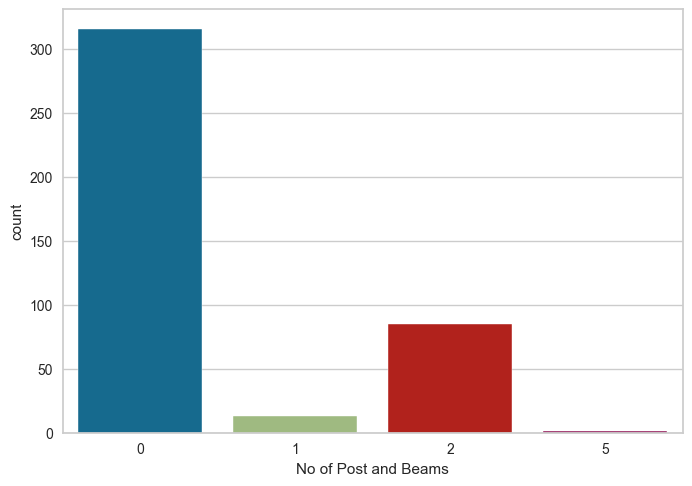

In [274]:
sns.countplot(data3['No of Post and Beams'])

In [275]:
data3.loc[380]

Serial                                                       381
Bldg No                                                     B01 
Area No                                                      A1 
Width                                                       35.6
Length                                                      50.0
Eave Height                                                  8.0
Roof Slope                                                   1.0
Roof Area                                                 1780.0
bay_spacing             [8.26, 8.26, 8.26, 8.26, 8.26, 5.0, 5.0]
Bay Spacing                                   5@8.26  2@5.00    
Frame Type                                                    MS
No of Main Frames                                              2
No of Post and Beams                                           5
Tempcon                                                        0
Live Load                                                   0.58
 Collateral Load         

In [276]:
# It looks like no. of frames and no. of p&b are missed up, we are going to consider 2 p& b and 6 frames

In [277]:
data3.loc[380,'No of Post and Beams']=2
data3.loc[380,'No of Main Frames']=6

In [278]:
data3['Live Load'].describe()

count    414.000000
mean       0.574179
std        0.424159
min        0.000000
25%        0.570000
50%        0.580000
75%        0.580000
max        6.750000
Name: Live Load, dtype: float64

In [279]:
data3[data3['Live Load']>1]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
31,32,1,,2.90,2.9,5.95,0.0,8.41,[2.6],1@2.60,CS,2,0,0,6.75,0.0,0.0,Wind Pressure = 0.7 (KN/m²),3548.693677,2921.578845,0.0000,459.18400,0.00,0.0,0.000000,137.210832,0.0,30.720,0.000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
33,34,B01,A1,54.72,67.0,13.05,0.0,3666.24,"[7.0, 8.5, 7.5, 7.5, 6.5, 7.5, 7.5, 8.5, 6.5]",1@7.0+1@8.50+2@7.50+1@6.50+2@7.50+1@8.50+1@6.50,MS,10,0,0,5.00,0.0,0.0,Wind Pressure = 0.68 (KN/m²),836887.912400,728762.210000,0.0000,43895.94236,0.00,0.0,0.000000,59811.840000,0.0,4417.920,0.000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
36,37,B5,A1,18.20,24.1,6.00,0.0,438.62,"[6.0, 6.0, 5.65, 6.45]",2@6.00 1@5.65 1@6.45,CS,5,0,0,3.00,0.0,0.0,Wind Pressure = 0.68 (KN/m²),33419.237200,27879.993000,0.0000,1306.96020,0.00,0.0,0.000000,4032.864000,0.0,199.420,0.000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
375,376,B2,A1,47.40,195.4,9.10,0.6,9261.96,"[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12....",8@12 + 1@3.4 + 8@12,MG,18,0,0,1.50,0.1,0.0,Wind Pressure = 1.24 (KN/m²),666562.144300,395453.506400,103545.8926,18895.07000,128956.38,0.0,9493.925312,0.000000,0.0,5708.322,4509.048,0.0,NO,NO,File is having some Warnings.,NaN,NaN


In [280]:
# we are going to drop rows 32,33,36 they seem to be flat roofs, will not be useul 
# row 375 wt/m2 of CF=11.18 we will drop too

In [281]:
data3.loc[[31,33,36,375]]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
31,32,1,,2.90,2.9,5.95,0.0,8.41,[2.6],1@2.60,CS,2,0,0,6.75,0.0,0.0,Wind Pressure = 0.7 (KN/m²),3548.693677,2921.578845,0.0000,459.18400,0.00,0.0,0.000000,137.210832,0.0,30.720,0.000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
33,34,B01,A1,54.72,67.0,13.05,0.0,3666.24,"[7.0, 8.5, 7.5, 7.5, 6.5, 7.5, 7.5, 8.5, 6.5]",1@7.0+1@8.50+2@7.50+1@6.50+2@7.50+1@8.50+1@6.50,MS,10,0,0,5.00,0.0,0.0,Wind Pressure = 0.68 (KN/m²),836887.912400,728762.210000,0.0000,43895.94236,0.00,0.0,0.000000,59811.840000,0.0,4417.920,0.000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
36,37,B5,A1,18.20,24.1,6.00,0.0,438.62,"[6.0, 6.0, 5.65, 6.45]",2@6.00 1@5.65 1@6.45,CS,5,0,0,3.00,0.0,0.0,Wind Pressure = 0.68 (KN/m²),33419.237200,27879.993000,0.0000,1306.96020,0.00,0.0,0.000000,4032.864000,0.0,199.420,0.000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
375,376,B2,A1,47.40,195.4,9.10,0.6,9261.96,"[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12....",8@12 + 1@3.4 + 8@12,MG,18,0,0,1.50,0.1,0.0,Wind Pressure = 1.24 (KN/m²),666562.144300,395453.506400,103545.8926,18895.07000,128956.38,0.0,9493.925312,0.000000,0.0,5708.322,4509.048,0.0,NO,NO,File is having some Warnings.,NaN,NaN


In [282]:
data3.drop([31,33,36,375],inplace = True)

In [283]:
data3.columns

Index(['Serial', 'Bldg No', 'Area No', 'Width', 'Length', 'Eave Height',
       'Roof Slope', 'Roof Area', 'bay_spacing', 'Bay Spacing', 'Frame Type',
       'No of Main Frames', 'No of Post and Beams', 'Tempcon', 'Live Load',
       ' Collateral Load', 'Snow Load', 'Wind', 'Total Weight', 'Frames',
       'CF (C&Z)', 'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims',
       'Decking', 'Joist', 'St. BO- Anchor Bolts', 'SP. BO', 'Special Works',
       'Mezz', 'Crane', 'Notes', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [284]:
data3.iloc[data3['Width'].argmax()]

Serial                                                                132
Bldg No                                                               B1 
Area No                                                            A1+A2 
Width                                                               406.6
Length                                                              243.6
Eave Height                                                          8.31
Roof Slope                                                            0.5
Roof Area                                                         91796.0
bay_spacing             [8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, ...
Bay Spacing                                                       30@8.4 
Frame Type                                                             MG
No of Main Frames                                                      30
No of Post and Beams                                                    0
Tempcon                               

In [285]:
# Now Let's see the 'Wind' Column
# consider dropping the column

In [286]:
data3['Wind'].value_counts()

Wind Pressure = 0.68 (KN/m²)       125
Wind Speed = 137 (km/H)            106
Wind Pressure = 0.7 (KN/m²)         28
Wind Speed = 0 (km/H)               26
Wind Pressure = 0.81 (KN/m²)        23
Wind Speed = 154 (km/H)             20
Wind Pressure = 0.95 (KN/m²)        18
Wind Speed = 130 (km/H)             12
Wind Pressure = 0.681 (KN/m²)        8
Wind Speed = 150 (km/H)              8
Wind Speed = 36 (km/H)               6
Wind Speed = 79.2 (km/H)             3
Wind Pressure = 1.1 (KN/m²)          3
Wind Pressure = 0.57 (KN/m²)         2
Wind Speed = 145 (km/H)              2
Wind Pressure = 1.71 (KN/m²)         2
Wind Pressure = 1.1025 (KN/m²)       2
Wind Pressure = 1.2 (KN/m²)          1
Wind Speed = 221.364 (km/H)          1
Wind Speed = 220 (km/H)              1
Wind Speed = 172 (km/H)              1
Wind Speed = 165.2 (km/H)            1
Wind Pressure = 0.78 (KN/m²)         1
Wind Speed = 160 (km/H)              1
Wind Pressure = 1.32 (KN/m²)         1
Wind Speed = 254 (km/H)  

In [287]:
# it is better to diregard the wind column as there is no unified unit of measurement, or load application code, enclosure category
# (enclosed, partially enclosed, open) available in data

In [288]:
# 27 recods with 0 for live load

In [289]:
data3[data3['Live Load'] == 0].shape[0]

27

<AxesSubplot:>

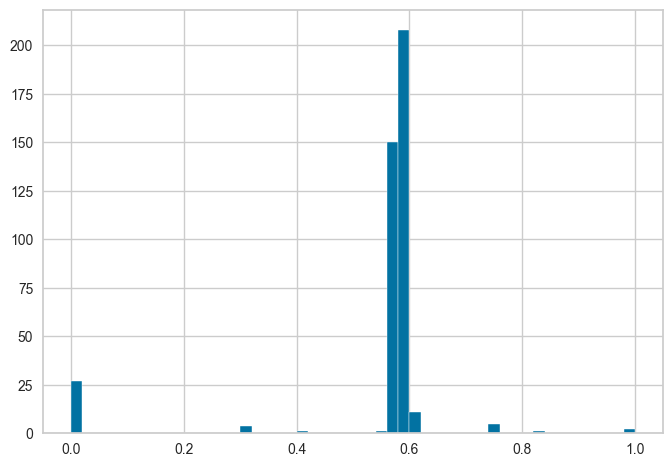

In [290]:
data3['Live Load'].hist(bins = 50)

In [291]:
data3['Live Load'].value_counts()

0.58    208
0.57    149
0.00     27
0.60     11
0.75      5
0.30      4
1.00      2
0.55      1
0.56      1
0.40      1
0.83      1
Name: Live Load, dtype: int64

In [292]:
# most of the Live Load values are 0.57,0.58
# we are going to replace 0 values with mode of Live Load column = 0.58

In [293]:
data3.loc[data3['Live Load'] == 0]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
10,11,B1,A1-APD,30.150,48.700,12.170,1.00,1468.305000,"[6.45, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.25]",1@6.45 6@6.00 1@6.25,CS,9,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),1.102092e+05,81507.023150,14733.536000,1832.04000,9801.670000,0.00000,1872.021410,0.0000,0.0,462.924000,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
34,35,1,,38.711,49.467,8.581,1.00,1914.917037,"[9.467, 8.0, 8.0, 8.0, 8.0, 8.0]",1@9.467+5@8.000,CS,7,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),1.671295e+05,104496.677600,20567.771740,8243.05452,0.000000,29035.94400,1275.447131,2446.7256,0.0,1063.829860,0.0000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
39,40,1,1,12.196,36.268,5.000,0.20,442.324528,"[2.006, 2.006, 2.006, 2.006, 2.006, 2.006, 2.0...",7@2.006+1@2.00+10@2.006,SS,4,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),1.951926e+04,15793.091200,33.173120,160.20000,2891.999700,0.00000,579.734720,0.0000,0.0,61.060460,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
41,42,3,1,8.000,4.500,5.000,0.20,36.000000,[4.5],1@4.50,SS,2,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),3.092843e+03,1718.579800,112.096015,55.12000,0.000000,1067.76000,114.776111,0.0000,0.0,16.260800,8.2500,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
66,67,1,,20.000,80.944,4.500,0.30,1618.880000,"[8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 10.5, 8.194, 5....",6@8.40+1@10.5+1@8.194+1@5.35+1@4.475,CS,0,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),2.443705e+05,193656.150300,23800.978470,2127.55900,17585.947080,0.00000,3732.203884,0.0000,0.0,1903.431470,1564.2000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
70,71,2,1,32.370,65.900,7.700,0.50,2133.183000,"[7.55, 7.0, 7.0, 8.0, 6.0, 6.0, 7.5, 8.5, 8.35]",1@7.55+2@7.00+1@8.00+2@6.00+1@7.50+1@8.50+1@8.35,MS,10,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),9.371416e+04,65539.511000,21088.746000,4863.12000,0.000000,0.00000,0.000000,0.0000,0.0,701.480000,1521.3000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
78,79,1,A1 & A2,64.280,36.500,13.900,0.65,2346.220000,"[7.26, 5.0, 7.0, 5.0, 5.0, 7.25]",1@7.26+1@5.00+1@7.00+2@5.00+1@7.25,MS1,7,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),2.732185e+05,155225.862900,19993.550640,13170.09179,0.000000,80048.58000,1321.203997,0.0000,0.0,2379.125900,1080.0348,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
81,82,B01,A1,27.000,60.000,11.200,1.00,1620.000000,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",10@6.00,MS,11,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),1.977064e+05,104016.178000,73.440000,56014.18400,33534.526820,0.00000,1846.764000,0.0000,0.0,1574.543140,646.8000,0.0,YES,YES,File is not using the Latest PriceBook in Fact...,NaN,NaN
82,83,1,1,16.000,35.000,4.100,0.00,560.000000,"[7.0, 7.0, 7.0, 7.0, 7.0]",5@7.00,CS,6,0,0,0.0,0.0,0.0,Wind Speed = 0 (km/H),3.127402e+04,20160.618400,7602.840000,612.92000,2577.260000,0.00000,96.600000,0.0000,0.0,223.780000,0.0000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
134,135,B1,A1,32.290,77.630,6.700,1.00,2405.000000,"[6.65, 6.45, 6.45, 6.45, 6.45, 6.45, 6.45, 6.4...",1@6.65 + 10@6.45 +1@6.65,CS,13,0,1,0.0,0.0,0.0,Wind Speed = 0 (km/H),1.775569e+05,81722.540200,18136.055880,5235.86400,0.000000,68010.00000,1574.282800,831.6000,0.0,1615.897200,430.6500,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [294]:
data3.loc[data3['Live Load'] == 0,'Live Load'] = data3['Live Load'].mode()[0]

In [295]:
data3['Live Load'].value_counts()

0.58    235
0.57    149
0.60     11
0.75      5
0.30      4
1.00      2
0.55      1
0.56      1
0.40      1
0.83      1
Name: Live Load, dtype: int64

In [296]:
data3['Snow Load'].value_counts()

0.00    394
0.20      7
1.17      3
0.90      2
0.30      2
0.75      1
0.97      1
Name: Snow Load, dtype: int64

In [297]:
data3[' Collateral Load'].value_counts()

0.00    212
0.10     79
0.20     25
0.30     20
0.25     19
0.15     17
0.50     16
0.40      9
0.05      6
0.35      4
0.70      2
0.60      1
Name:  Collateral Load, dtype: int64

In [298]:
# Checking the 'No. of Main Frame' column where values = 0

In [299]:
data3[data3['No of Main Frames'] == 0]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Wind,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
66,67,1,,20.00,80.944,4.50,0.3,1618.88000,"[8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 10.5, 8.194, 5....",6@8.40+1@10.5+1@8.194+1@5.35+1@4.475,CS,0,0,0,0.58,0.00,0.0,Wind Speed = 0 (km/H),244370.470200,193656.150300,23800.97847,2127.55900,17585.94708,0.00000,3732.203884,0.00,0.0,1903.431470,1564.20000,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
71,72,1,A01& A02,20.00,38.500,9.60,1.0,770.00000,"[7.5, 6.0, 6.0, 6.0, 6.0, 7.0]",1@7.50 + 4@6.00 +1@7.00,CS,0,0,1,0.57,0.00,0.0,Wind Speed = 39 (km/H),84304.278300,46110.580000,9348.48100,7158.52800,10649.31760,6530.04000,1469.552308,815.76,0.0,574.315390,1647.70400,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
176,177,B01,A01 & A02,90.67,105.205,12.90,0.0,9538.93735,"[2.09, 5.69, 6.4, 6.3, 6.3, 5.0, 8.0, 8.0, 8.0...",1@2.090;1@5.690;1@6.400;2@6.300;1@5.000;7@8.00...,CS,0,0,1,0.57,0.15,0.0,Wind Pressure = 0.68 (KN/m²),829504.762000,473265.976800,57903.43870,80952.41392,105961.55060,58201.20000,5857.972115,0.00,0.0,6549.879900,40812.33000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
177,178,B01,A01 & A02,90.67,105.205,12.90,0.0,9538.93735,"[2.09, 5.69, 6.4, 6.3, 6.3, 5.0, 8.0, 8.0, 8.0...",1@2.090;1@5.690;1@6.400;2@6.300;1@5.000;7@8.00...,CS,0,0,1,0.57,0.15,0.0,Wind Pressure = 0.68 (KN/m²),843377.029700,472678.623500,61302.69683,80927.56642,105961.55060,70339.20000,5897.136562,0.00,0.0,6155.875900,40114.38000,0.0,YES,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
345,346,B01,A01&A02&A03&A04&A05,16.50,129.170,5.85,1.0,2131.30500,"[6.585, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0...",1@6.585+ 19@6.00+1@4.00+1@4.585,CS,0,0,1,0.58,0.00,0.0,Wind Speed = 0 (km/H),104147.594400,20788.122960,24525.59100,4651.67840,11079.42522,39401.26888,1962.119944,0.00,0.0,1346.687976,392.70000,0.0,NO,NO,No TML report found.,NaN,NaN
361,362,B01,A05,16.70,2.653,5.00,1.0,44.30510,[2.653],1@2.653,CS,0,1,0,0.58,0.00,0.0,Wind Speed = 137 (km/H),2275.045867,904.280788,686.69196,96.75680,477.82131,0.00000,80.181609,0.00,0.0,29.313400,0.00000,0.0,NO,NO,File is having some Warnings.,NaN,NaN
463,464,B01,,60.00,55.290,13.40,1.0,3317.40000,"[9.5, 6.145, 8.0, 8.0, 8.0, 8.0, 7.645]",1@9.50+1@6.145+4@8.00+1@7.645,MS2,0,0,1,0.57,0.00,0.0,Wind Speed = 137 (km/H),438389.904200,304673.369100,15105.80280,50172.09197,0.00000,40807.92000,863.396700,24116.40,0.0,1915.403600,735.52000,0.0,YES,NO,File is having some Warnings.,NaN,NaN
502,503,1,A01 to A09,33.40,144.710,10.00,1.0,4833.31400,"[8.0, 8.0, 7.25, 7.25, 7.0, 7.0, 7.0, 7.8, 7.8...",2@8.00+2@7.250+3@7.00+4@7.800+2@7.325+3@8.090+...,MS,0,0,0,0.58,0.20,0.0,Wind Speed = 221.364 (km/H),335026.414200,137886.518500,112865.29980,22735.87833,47404.64220,0.00000,8285.413599,0.00,0.0,3564.334755,2284.32706,0.0,YES,NO,No TML report found.,NaN,NaN


In [300]:
data3[data3['No of Main Frames'] == 0].shape[0]

8

In [301]:
# 'No of Main Frames' shall be filled by the no of bays+1

In [302]:
data3[data3['No of Main Frames'] == 0]['bay_spacing'].apply(len)+1 

66     11
71      7
176    16
177    16
345    23
361     2
463     8
502    19
Name: bay_spacing, dtype: int64

In [303]:
data3.loc[data3['No of Main Frames'] == 0,'No of Main Frames'] = data3[data3['No of Main Frames'] == 0]['bay_spacing'].apply(len)+1

In [304]:
data3.loc[[66,71,176,177,345,361,463,502],['No of Main Frames']]

,No of Main Frames
66,11
71,7
176,16
177,16
345,23
361,2
463,8
502,19


In [305]:
# it is better to disregard the 'Wind' feature/column for now till we get more detailed data about wind load
# we will proceed with our test model

In [306]:
## we will make a copy of data3

In [307]:
data4 = data3.copy()

In [308]:
data4.drop('Wind', axis=1, inplace = True)

In [309]:
data4.head()

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane,Notes,Unnamed: 31,Unnamed: 32
0,1,B1,A1,9.250,44.624,3.64,0.5,412.77200,"[3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.4...",13@3.43,LEANTO,14,0,1,0.57,0.0,0.0,18707.728350,8400.329600,2205.442020,1172.89,0.000,5760.000000,624.718094,215.82,0.0,178.378640,150.15,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
1,2,B02,A1,34.600,47.000,21.55,4.0,1626.20000,"[7.9, 7.8, 7.8, 7.8, 7.8, 7.9]",1@7.90 + 4@7.80 + 1@7.90,CS,5,2,1,0.58,0.0,0.0,221713.472200,115231.250000,17331.089200,4943.04,279.342,81759.000000,462.480000,0.00,0.0,1108.241000,599.03,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
4,5,B25,A1,5.700,9.870,4.00,0.8,56.25900,[9.87],1@9.87,SS,2,0,1,0.57,0.5,0.0,7214.092578,2258.493483,1631.191800,197.52,0.000,2943.656439,102.458900,0.00,0.0,37.871956,42.90,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
5,6,B26,A1,13.762,19.970,2.70,0.8,274.82714,"[5.385, 3.3, 3.3, 3.3, 4.685]",1@5.385; 3@3.300; 1@4.685,CS,6,0,1,0.57,0.5,0.0,14599.845920,5002.806539,1502.472824,794.40,0.000,6639.978998,392.759500,0.00,0.0,153.578062,113.85,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN
6,7,B29,A1,10.950,20.270,7.10,1.2,221.95650,"[4.785, 4.2, 6.5, 4.785]",1@4.785; 1@4.200; 1@6.500; 1@4.785,CS,5,0,1,0.57,0.5,0.0,23995.189100,8806.745048,2101.520340,1030.14,0.000,11324.040000,444.716114,0.00,0.0,149.427600,138.60,0.0,NO,NO,File is not using the Latest PriceBook in Fact...,NaN,NaN


In [310]:
data4.columns

Index(['Serial', 'Bldg No', 'Area No', 'Width', 'Length', 'Eave Height',
       'Roof Slope', 'Roof Area', 'bay_spacing', 'Bay Spacing', 'Frame Type',
       'No of Main Frames', 'No of Post and Beams', 'Tempcon', 'Live Load',
       ' Collateral Load', 'Snow Load', 'Total Weight', 'Frames', 'CF (C&Z)',
       'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims', 'Decking',
       'Joist', 'St. BO- Anchor Bolts', 'SP. BO', 'Special Works', 'Mezz',
       'Crane', 'Notes', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [311]:
data4[' Collateral Load'].value_counts()

0.00    212
0.10     79
0.20     25
0.30     20
0.25     19
0.15     17
0.50     16
0.40      9
0.05      6
0.35      4
0.70      2
0.60      1
Name:  Collateral Load, dtype: int64

In [312]:
data4['Snow Load'].value_counts()

0.00    394
0.20      7
1.17      3
0.90      2
0.30      2
0.75      1
0.97      1
Name: Snow Load, dtype: int64

In [313]:
data4['Notes'].value_counts()

File is not using the Latest PriceBook in Factory: ZSE     244
File is having some Warnings.                              148
No TML report found.                                        18
Name: Notes, dtype: int64

In [314]:
# We will drop 'Notes', 'Unnamed 31', 'Unnamed 32' columns

In [315]:
data4.drop(['Notes','Unnamed: 31', 'Unnamed: 32'], axis = 1, inplace = True)

### We will go over all columns again to check missing and illogic values per column

In [316]:
data4.columns

Index(['Serial', 'Bldg No', 'Area No', 'Width', 'Length', 'Eave Height',
       'Roof Slope', 'Roof Area', 'bay_spacing', 'Bay Spacing', 'Frame Type',
       'No of Main Frames', 'No of Post and Beams', 'Tempcon', 'Live Load',
       ' Collateral Load', 'Snow Load', 'Total Weight', 'Frames', 'CF (C&Z)',
       'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims', 'Decking',
       'Joist', 'St. BO- Anchor Bolts', 'SP. BO', 'Special Works', 'Mezz',
       'Crane'],
      dtype='object')

In [317]:
data4.isna().sum()

Serial                  0
Bldg No                 0
Area No                 0
Width                   0
Length                  0
Eave Height             0
Roof Slope              0
Roof Area               0
bay_spacing             0
Bay Spacing             0
Frame Type              0
No of Main Frames       0
No of Post and Beams    0
Tempcon                 0
Live Load               0
 Collateral Load        0
Snow Load               0
Total Weight            0
Frames                  0
CF (C&Z)                0
Sundry Parts            0
Sheeting                0
Tempcon Panels          0
Trims                   0
Decking                 0
Joist                   0
St. BO- Anchor Bolts    0
SP. BO                  0
Special Works           0
Mezz                    0
Crane                   0
dtype: int64

In [318]:
data4[['Width']].describe()

,Width
count,410.000000
mean,44.350378
std,39.846686
min,3.218000
25%,18.098000
50%,35.000000
75%,56.600000
max,406.600000


In [319]:
# chaeck main & max. width
data4.iloc[[data4['Width'].argmin(),data4['Width'].argmax()]]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
7,8,B37,A1,3.218,14.57,5.00,0.8,46.88626,"[7.285, 7.285]",2@7.285,SS,3,0,1,0.57,0.5,0.0,7.597582e+03,2.605676e+03,944.680649,205.320,0.00,3596.9938,143.003908,0.00,0.0,62.307712,39.60,0.0,NO,NO
131,132,B1,A1+A2,406.600,243.60,8.31,0.5,91796.00000,"[8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, ...",30@8.4,MG,30,0,0,0.60,0.4,0.0,3.513100e+06,1.618681e+06,527558.270000,70704.076,1091697.07,0.0000,54685.686000,21962.16,0.0,29905.905600,97905.81,0.0,YES,NO


In [320]:
sum(data4.loc[131,'bay_spacing'])

252.0000000000001

In [321]:
# row 131 (max-width building) length is not equal to building length from sum of bay_spacing
# roof area != width*length
# no of main frames != len(bay_spacing)+1
# but we will leave it as it is for now

In [322]:
# 'Width' column is OK, Now to the 'Length' column

In [323]:
data4[['Length']].describe()

,Length
count,410.000000
mean,77.126661
std,60.270650
min,2.653000
25%,39.542500
50%,64.408000
75%,100.000000
max,487.100000


In [324]:
# let's check the max. and min length rows

In [325]:
data4.iloc[[data4['Length'].argmin(),data4['Length'].argmax()]]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
361,362,B01,A05,16.7,2.653,5.000,1.0,44.3051,[2.653],1@2.653,CS,2,1,0,0.58,0.0,0.0,2.275046e+03,9.042808e+02,686.69196,96.7568,477.82131,0.0,80.181609,0.0,0.0,29.3134,0.0000,0.0,NO,NO
232,233,B1,A1,101.5,487.100,16.477,0.3,49440.6500,"[8.65, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1,...",1.00@8.65 + 58@8.10 + 1.00@8.65,MS3,61,0,1,0.57,0.5,0.0,2.723850e+06,1.429759e+06,342035.11720,68447.8000,585861.97840,181680.0,10146.493230,0.0,0.0,26405.4312,79514.5866,0.0,NO,NO


In [326]:
data4.iloc[[data4['Length'].argmin(),data4['Length'].argmax()]]['bay_spacing'].apply(sum)

361      2.653
232    487.100
Name: bay_spacing, dtype: float64

In [327]:
# we should check sum of bays vs. Length

In [328]:
data4['Length']/(data4['bay_spacing'].apply(sum))

0      1.000763
1      1.000000
4      1.000000
5      1.000000
6      1.000000
7      1.000000
8      1.000000
9      1.000000
10     1.000000
11     1.000000
12     1.012698
14     1.000000
15     1.000000
16     1.007240
17     1.007240
18     0.999973
19     1.000000
20     1.000000
21     1.000000
22     1.000000
23     0.897167
26     1.000000
27     1.000000
28     1.000000
29     1.000000
30     1.000000
32     1.000000
34     1.000000
35     1.004453
37     1.000000
38     1.000000
39     1.004598
41     1.000000
45     0.977135
46     1.000000
47     1.014625
48     1.024623
49     1.000000
53     1.000000
55     1.000000
57     0.995304
59     1.000000
61     1.009750
62     1.009750
63     1.000000
64     1.000000
65     1.000000
66     1.025659
67     1.000000
68     1.050000
70     1.000000
71     1.000000
72     1.018624
73     1.000000
74     1.000000
75     1.000000
77     1.000000
78     0.999726
79     1.000000
80     1.000000
81     1.000000
82     1.000000
83     1

In [329]:
# filtering rows where ratio above between 0.95 and 1.05
# non conforimg lengths and Roof areas is a sign of low quality input for such rows and we may consider deketing

In [330]:
data4[(data4['Length']/(data4['bay_spacing'].apply(np.sum)) < 0.95) | (data4['Length']/(data4['bay_spacing'].apply(np.sum)) > 1.05) ]['Length']/data4[(data4['Length']/(data4['bay_spacing'].apply(np.sum)) < 0.95) | (data4['Length']/(data4['bay_spacing'].apply(np.sum)) > 1.05) ]['bay_spacing'].apply(sum)

23     0.897167
145    2.973684
173    0.874117
192    1.095535
193    1.095223
213    1.123158
251    8.572333
284    1.193760
353    1.249377
355    0.481481
382    0.584795
454    0.066731
477    1.102778
478    1.102778
479    1.102778
488    1.473773
502    1.059215
dtype: float64

In [331]:
# indices for filtered  rows above

In [332]:
data4[(data4['Length']/(data4['bay_spacing'].apply(np.sum)) < 0.9) | (data4['Length']/(data4['bay_spacing'].apply(np.sum)) > 1.1) ].index

Int64Index([23, 145, 173, 213, 251, 284, 353, 355, 382, 454, 477, 478, 479,
            488],
           dtype='int64')

In [333]:
data4[(data4['Length']/(data4['bay_spacing'].apply(np.sum)) < 0.9) | (data4['Length']/(data4['bay_spacing'].apply(np.sum)) > 1.1) ]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
23,24,B1,A2,15.120,42.75,10.810,1.00,646.38000,"[7.0, 6.74, 6.74, 6.845, 6.845, 6.74, 6.74]",1@7 2@6.74 2@6.845 2@6.740,SS,7,0,1,0.57,0.10,0.00,5.811140e+04,3.858490e+04,5116.55020,1134.12000,0.00000,11429.980,1202.264300,0.00,0.0,463.734960,179.8500,0.0000,NO,NO
145,146,B1,A1,89.030,67.80,7.600,0.00,6036.23400,"[6.1, 5.45, 5.45, 5.8]",1@6.100 2@5.450 1@5.800,MG,23,0,1,0.58,0.00,0.00,1.335905e+06,8.857026e+05,140994.79320,17649.17900,45936.74100,235899.675,4623.683810,0.00,0.0,3585.312780,1513.0350,0.0000,NO,YES
173,174,B1,A1,45.300,105.20,9.750,1.00,4765.56000,"[7.54, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,...",1 @ 7.54 ; 12 @ 7.50 ; 1 @ 7.50; 1 @ 7.66 ; 1...,MS1,15,0,1,0.60,0.25,0.00,2.373272e+05,1.082400e+05,30211.77380,4949.53000,0.00000,86382.000,3493.447112,0.00,0.0,1778.863000,2271.6000,0.0000,NO,NO
213,214,B4,A1,6.166,10.67,6.300,1.00,65.79122,[9.5],1@9.50,CS,2,0,1,0.57,0.50,0.00,1.326604e+04,7.032596e+03,2239.72688,268.67000,0.00000,3429.144,243.951460,0.00,0.0,51.953440,0.0000,0.0000,NO,YES
251,252,B1,A1,79.600,257.17,25.000,0.30,13660.00000,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0]",6@5.00,SS,44,0,0,0.58,0.25,0.75,1.853920e+06,1.435009e+06,91136.64242,40648.31200,167087.00140,0.000,5502.739044,19800.00,0.0,7149.188570,87586.9010,0.0000,YES,NO
284,285,B1,A1,18.410,61.98,4.400,1.37,956.95000,"[6.9, 6.36, 6.36, 6.36, 6.36, 6.36, 6.36, 6.86]",1 @ 6.9 ; 6 @ 6.36 ; 1 @ 6.86,CS,9,0,0,0.58,0.00,0.00,5.790892e+04,3.967670e+04,8996.73664,1598.60000,5549.64000,0.000,1219.075840,0.00,0.0,238.255600,629.9100,0.0000,NO,NO
353,354,B1,A1,50.250,100.20,9.400,1.00,4930.00000,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",15@5.00 + 1@5.20,MS,22,2,1,0.58,0.25,0.00,2.354081e+05,1.170714e+05,34323.74945,14349.20124,35004.95237,19678.920,3866.363374,7341.84,0.0,2968.550918,803.1355,0.0000,YES,NO
355,356,1,A01-A02,55.430,13.00,10.200,0.50,720.59000,"[6.0, 7.0, 7.0, 7.0]",1@6.00+3@7.00,MS,5,0,0,0.58,0.20,0.00,3.077430e+04,1.822462e+04,4905.25920,1465.90036,4289.74600,0.000,660.536195,0.00,0.0,323.800600,904.4437,0.0000,NO,NO
382,383,B01,A1,98.288,30.00,9.000,1.00,2948.64000,"[8.26, 8.26, 8.26, 8.26, 8.26, 5.0, 5.0]",5@8.26 2@5.00,ROOFSYSTEM,6,0,0,0.57,0.00,0.00,6.699455e+04,2.158346e+04,11535.05496,16224.11456,13920.04258,0.000,2335.939060,0.00,0.0,787.903800,608.0400,0.0000,YES,NO
454,455,B1,A4,15.110,55.00,14.312,2.00,831.05000,"[6.65, 6.65, 10.89, 10.3, 71.0, 71.0, 71.0, 71...",2@6.65+1@10.89+1@10.3+11@71+1@8.72,SS,7,0,0,0.58,0.00,0.00,2.710014e+04,1.312399e+04,5656.90520,934.98160,5961.30000,0.000,735.030000,0.00,0.0,278.280000,409.6500,0.0000,NO,NO


In [334]:
drop_lst = list(data4[(data4['Length']/(data4['bay_spacing'].apply(np.sum)) < 0.9) | (data4['Length']/(data4['bay_spacing'].apply(np.sum)) > 1.1) ].index)

In [335]:
len(drop_lst)

14

In [336]:
data4.drop(drop_lst,inplace = True )

In [337]:
# in paralell we will check if Buildings' W*L == Roof Area

In [338]:
data4['Width']*data4['Length']/data4['Roof Area']

0      1.000000
1      1.000000
4      1.000000
5      1.000000
6      1.000000
7      1.000000
8      1.000000
9      1.000000
10     1.000000
11     1.000000
12     1.000000
14     1.000000
15     1.000000
16     1.000000
17     1.000000
18     1.000000
19     1.120972
20     1.000000
21     1.000000
22     1.000000
26     1.000000
27     1.000000
28     1.000000
29     1.000000
30     1.000000
32     1.000000
34     1.000000
35     1.000000
37     1.000000
38     1.000000
39     1.000000
41     1.000000
45     1.000000
46     1.000000
47     1.000000
48     1.000000
49     1.000000
53     1.000000
55     1.000000
57     1.000000
59     1.000000
61     1.000000
62     1.283986
63     1.000000
64     1.000000
65     1.000000
66     1.000000
67     1.000000
68     1.000000
70     1.000000
71     1.000000
72     1.000000
73     1.000000
74     1.000000
75     1.000000
77     1.004594
78     1.000000
79     1.000000
80     1.000000
81     1.000000
82     1.000000
83     1.000000
84     1

In [339]:
# focusing on rows where W * L > 1.1 | < 0.9

In [340]:
data4[(data4['Width']*data4['Length']/data4['Roof Area'] <0.90) | (data4['Width']*data4['Length']/data4['Roof Area'] > 1.1)]

,Serial,Bldg No,Area No,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
19,20,B1,A1-A3,94.337,177.17,8.10,1.000,14910.00,"[8.585, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0...",1@8.585 20@8.00 1@8.585,MGMS,23,0,1,0.58,0.25,0.0,6.428938e+05,3.060802e+05,82055.400820,10660.45000,0.00000,212753.040,16991.808500,2233.44000,0.0,8546.22970,3573.20400,0.0,YES,NO
62,63,B1,A1&A2,116.700,121.17,12.70,1.000,11013.00,"[7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",16@7.50,MGMS,17,0,1,0.57,0.70,0.0,9.360091e+05,5.976695e+05,87012.207640,38118.15441,117026.58420,26388.000,4008.601594,38372.40000,0.0,5753.22640,21660.41860,0.0,NO,NO
127,128,B1,A1,92.720,428.02,11.60,0.500,10616.11,"[26.751, 26.751, 26.751, 26.751, 26.751, 26.75...",16@26.751,MS2,17,0,1,0.57,0.30,0.0,3.026384e+06,1.907177e+06,185665.268900,153062.54760,413579.30420,140691.180,8569.043400,97980.36336,0.0,22759.17000,96899.36816,0.0,YES,NO
216,217,B1,A1,71.200,87.04,7.49,0.500,4927.00,"[7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, ...",12@7.2,MS1&MS2,13,0,0,0.58,0.00,0.0,1.722019e+05,8.681185e+04,28664.692800,5735.20000,45748.38794,0.000,2367.597393,0.00000,0.0,1659.72200,1214.40000,0.0,NO,NO
243,244,B1,A1,87.500,110.00,8.00,1.000,8595.50,"[5.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, ...",1@5.50 13@7.50 1@7.00,MS,14,2,0,0.57,0.10,0.0,3.268735e+05,2.122196e+05,37617.042700,6180.97000,62940.84200,0.000,3187.691939,0.00000,0.0,4727.30900,0.00000,0.0,NO,NO
279,280,B1,A1,185.600,192.50,20.50,0.900,26856.00,"[6.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",1@6.50 + 23@6.00 + 1@5.50 +1@6.50 +1@8.75+1@8....,MG,32,0,1,0.58,0.50,0.0,1.866277e+06,1.086349e+06,137722.976400,49980.82400,0.00000,552060.488,10603.184640,11246.40000,0.0,13004.72000,5309.54000,0.0,YES,YES
280,281,B1,A1,185.600,192.50,20.50,0.900,26856.00,"[6.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",1@6.50 + 23@6.00 + 1@5.50 +1@6.50 +1@8.75+1@8....,MG,32,0,1,0.58,0.50,0.0,1.866277e+06,1.086349e+06,137722.976400,49980.82400,0.00000,552060.488,10603.184640,11246.40000,0.0,13004.72000,5309.54000,0.0,YES,YES
324,325,B01,A01,6.174,45.66,11.98,0.500,239.00,"[7.83, 7.5, 7.5, 7.5, 7.5, 7.83]",1@7.83 + 4@7.50 + 1@7.83,CS,7,0,0,0.58,0.00,0.0,3.890869e+04,2.429138e+04,4778.273431,1913.58000,4579.80000,0.000,411.950041,1948.32000,0.0,254.42918,730.96000,0.0,YES,NO
354,355,B02,A1,100.600,60.60,8.30,1.000,5051.00,"[5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.0, 5.0, 5.0, ...",6@5.10 + 6@5.00,MG,11,2,0,0.58,0.00,0.0,1.399466e+05,5.953880e+04,26703.082800,15047.10480,31286.09550,0.000,3373.687959,0.00000,0.0,2928.79188,1069.02800,0.0,NO,NO
400,401,B1,A1,126.300,60.00,8.00,1.000,6320.00,"[7.925, 7.34, 7.34, 7.34, 7.34, 7.34, 7.34, 7....",1@7.925 - 6@7.340 - 1@7.925,MG2MS1&MS1,9,0,0,0.58,0.00,0.0,1.953063e+05,8.213692e+04,40625.179440,5108.12080,56067.19312,0.000,5916.867585,0.00000,0.0,2933.91668,2518.08160,0.0,NO,NO


In [341]:
data4[(data4['Width']*data4['Length']/data4['Roof Area'] <0.9) | (data4['Width']*data4['Length']/data4['Roof Area'] > 1.1)].index

Int64Index([19, 62, 127, 216, 243, 279, 280, 324, 354, 400, 425, 426, 427, 433,
            436, 456],
           dtype='int64')

In [342]:
drop_lst = list(data4[(data4['Width']*data4['Length']/data4['Roof Area'] <0.90) | (data4['Width']*data4['Length']/data4['Roof Area'] > 1.1)].index)

In [343]:
# we will cast the sum of lists into a set to remove duplicates

In [344]:
len(drop_lst)

16

In [345]:
data4.drop(drop_lst,inplace = True )

In [346]:
data4.shape

(380, 31)

In [347]:
# Makinga acopy from data4 to proceed with

In [348]:
data5=data4.copy()

In [349]:
# rows above shall be dropped because of the inconsistent building length vs sum of bays vs no of frames

In [350]:
data5[' Collateral Load'].describe()

count    380.000000
mean       0.097500
std        0.136679
min        0.000000
25%        0.000000
50%        0.000000
75%        0.150000
max        0.700000
Name:  Collateral Load, dtype: float64

In [351]:
# collateral loads seems OK

In [352]:
data5['Snow Load'].describe()

count    380.000000
mean       0.021789
std        0.135389
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.170000
Name: Snow Load, dtype: float64

In [353]:
# Snow loads seems OK

In [354]:
data5.columns

Index(['Serial', 'Bldg No', 'Area No', 'Width', 'Length', 'Eave Height',
       'Roof Slope', 'Roof Area', 'bay_spacing', 'Bay Spacing', 'Frame Type',
       'No of Main Frames', 'No of Post and Beams', 'Tempcon', 'Live Load',
       ' Collateral Load', 'Snow Load', 'Total Weight', 'Frames', 'CF (C&Z)',
       'Sundry Parts', 'Sheeting', 'Tempcon Panels', 'Trims', 'Decking',
       'Joist', 'St. BO- Anchor Bolts', 'SP. BO', 'Special Works', 'Mezz',
       'Crane'],
      dtype='object')

In [355]:
# we are going to drop non usefeul columns:
#'Serial', 'Bldg No', 'Area No'

In [356]:
data5.drop(['Serial', 'Bldg No', 'Area No'],axis = 1 , inplace = True)

In [357]:
data5.columns

Index(['Width', 'Length', 'Eave Height', 'Roof Slope', 'Roof Area',
       'bay_spacing', 'Bay Spacing', 'Frame Type', 'No of Main Frames',
       'No of Post and Beams', 'Tempcon', 'Live Load', ' Collateral Load',
       'Snow Load', 'Total Weight', 'Frames', 'CF (C&Z)', 'Sundry Parts',
       'Sheeting', 'Tempcon Panels', 'Trims', 'Decking', 'Joist',
       'St. BO- Anchor Bolts', 'SP. BO', 'Special Works', 'Mezz', 'Crane'],
      dtype='object')

In [358]:
data5.head()

,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Bay Spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
0,9.250,44.624,3.64,0.5,412.77200,"[3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.4...",13@3.43,LEANTO,14,0,1,0.57,0.0,0.0,18707.728350,8400.329600,2205.442020,1172.89,0.000,5760.000000,624.718094,215.82,0.0,178.378640,150.15,0.0,NO,NO
1,34.600,47.000,21.55,4.0,1626.20000,"[7.9, 7.8, 7.8, 7.8, 7.8, 7.9]",1@7.90 + 4@7.80 + 1@7.90,CS,5,2,1,0.58,0.0,0.0,221713.472200,115231.250000,17331.089200,4943.04,279.342,81759.000000,462.480000,0.00,0.0,1108.241000,599.03,0.0,NO,NO
4,5.700,9.870,4.00,0.8,56.25900,[9.87],1@9.87,SS,2,0,1,0.57,0.5,0.0,7214.092578,2258.493483,1631.191800,197.52,0.000,2943.656439,102.458900,0.00,0.0,37.871956,42.90,0.0,NO,NO
5,13.762,19.970,2.70,0.8,274.82714,"[5.385, 3.3, 3.3, 3.3, 4.685]",1@5.385; 3@3.300; 1@4.685,CS,6,0,1,0.57,0.5,0.0,14599.845920,5002.806539,1502.472824,794.40,0.000,6639.978998,392.759500,0.00,0.0,153.578062,113.85,0.0,NO,NO
6,10.950,20.270,7.10,1.2,221.95650,"[4.785, 4.2, 6.5, 4.785]",1@4.785; 1@4.200; 1@6.500; 1@4.785,CS,5,0,1,0.57,0.5,0.0,23995.189100,8806.745048,2101.520340,1030.14,0.000,11324.040000,444.716114,0.00,0.0,149.427600,138.60,0.0,NO,NO


In [359]:
# Columns 'Bay Spacing' Shall be propped as it bay spacing is represented by another column 'bay_spacing'

In [360]:
data5.drop('Bay Spacing', axis = 1 , inplace = True)

In [361]:
data5.head()

,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
0,9.250,44.624,3.64,0.5,412.77200,"[3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.4...",LEANTO,14,0,1,0.57,0.0,0.0,18707.728350,8400.329600,2205.442020,1172.89,0.000,5760.000000,624.718094,215.82,0.0,178.378640,150.15,0.0,NO,NO
1,34.600,47.000,21.55,4.0,1626.20000,"[7.9, 7.8, 7.8, 7.8, 7.8, 7.9]",CS,5,2,1,0.58,0.0,0.0,221713.472200,115231.250000,17331.089200,4943.04,279.342,81759.000000,462.480000,0.00,0.0,1108.241000,599.03,0.0,NO,NO
4,5.700,9.870,4.00,0.8,56.25900,[9.87],SS,2,0,1,0.57,0.5,0.0,7214.092578,2258.493483,1631.191800,197.52,0.000,2943.656439,102.458900,0.00,0.0,37.871956,42.90,0.0,NO,NO
5,13.762,19.970,2.70,0.8,274.82714,"[5.385, 3.3, 3.3, 3.3, 4.685]",CS,6,0,1,0.57,0.5,0.0,14599.845920,5002.806539,1502.472824,794.40,0.000,6639.978998,392.759500,0.00,0.0,153.578062,113.85,0.0,NO,NO
6,10.950,20.270,7.10,1.2,221.95650,"[4.785, 4.2, 6.5, 4.785]",CS,5,0,1,0.57,0.5,0.0,23995.189100,8806.745048,2101.520340,1030.14,0.000,11324.040000,444.716114,0.00,0.0,149.427600,138.60,0.0,NO,NO


In [362]:
# The 'Frame Type': we will replace with a 0/1 column representing "sheetd wall" as assumed, 0 values for roof 
# sytems where there should be no SW or EW girts or 1 values for non-roof systems buildings
# 'Frame type' column shall be dropped

In [363]:
sheeted_wall = data5['Frame Type'].apply(lambda x: 0 if x=='ROOFSYSTEM' else 1)

In [364]:
data5.insert(6, 'sheeted_wall',sheeted_wall)
data5.head()

,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,sheeted_wall,Frame Type,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
0,9.250,44.624,3.64,0.5,412.77200,"[3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.4...",1,LEANTO,14,0,1,0.57,0.0,0.0,18707.728350,8400.329600,2205.442020,1172.89,0.000,5760.000000,624.718094,215.82,0.0,178.378640,150.15,0.0,NO,NO
1,34.600,47.000,21.55,4.0,1626.20000,"[7.9, 7.8, 7.8, 7.8, 7.8, 7.9]",1,CS,5,2,1,0.58,0.0,0.0,221713.472200,115231.250000,17331.089200,4943.04,279.342,81759.000000,462.480000,0.00,0.0,1108.241000,599.03,0.0,NO,NO
4,5.700,9.870,4.00,0.8,56.25900,[9.87],1,SS,2,0,1,0.57,0.5,0.0,7214.092578,2258.493483,1631.191800,197.52,0.000,2943.656439,102.458900,0.00,0.0,37.871956,42.90,0.0,NO,NO
5,13.762,19.970,2.70,0.8,274.82714,"[5.385, 3.3, 3.3, 3.3, 4.685]",1,CS,6,0,1,0.57,0.5,0.0,14599.845920,5002.806539,1502.472824,794.40,0.000,6639.978998,392.759500,0.00,0.0,153.578062,113.85,0.0,NO,NO
6,10.950,20.270,7.10,1.2,221.95650,"[4.785, 4.2, 6.5, 4.785]",1,CS,5,0,1,0.57,0.5,0.0,23995.189100,8806.745048,2101.520340,1030.14,0.000,11324.040000,444.716114,0.00,0.0,149.427600,138.60,0.0,NO,NO


In [365]:
data5.drop('Frame Type' , axis = 1 , inplace = True)

In [366]:
data5.head()

,Width,Length,Eave Height,Roof Slope,Roof Area,bay_spacing,sheeted_wall,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
0,9.250,44.624,3.64,0.5,412.77200,"[3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.4...",1,14,0,1,0.57,0.0,0.0,18707.728350,8400.329600,2205.442020,1172.89,0.000,5760.000000,624.718094,215.82,0.0,178.378640,150.15,0.0,NO,NO
1,34.600,47.000,21.55,4.0,1626.20000,"[7.9, 7.8, 7.8, 7.8, 7.8, 7.9]",1,5,2,1,0.58,0.0,0.0,221713.472200,115231.250000,17331.089200,4943.04,279.342,81759.000000,462.480000,0.00,0.0,1108.241000,599.03,0.0,NO,NO
4,5.700,9.870,4.00,0.8,56.25900,[9.87],1,2,0,1,0.57,0.5,0.0,7214.092578,2258.493483,1631.191800,197.52,0.000,2943.656439,102.458900,0.00,0.0,37.871956,42.90,0.0,NO,NO
5,13.762,19.970,2.70,0.8,274.82714,"[5.385, 3.3, 3.3, 3.3, 4.685]",1,6,0,1,0.57,0.5,0.0,14599.845920,5002.806539,1502.472824,794.40,0.000,6639.978998,392.759500,0.00,0.0,153.578062,113.85,0.0,NO,NO
6,10.950,20.270,7.10,1.2,221.95650,"[4.785, 4.2, 6.5, 4.785]",1,5,0,1,0.57,0.5,0.0,23995.189100,8806.745048,2101.520340,1030.14,0.000,11324.040000,444.716114,0.00,0.0,149.427600,138.60,0.0,NO,NO


In [367]:
# creating a a copy of data5

In [368]:
data6 = data5.copy()

In [369]:
# Now for the bay_spacing column:
# bay spacing affects both Frames and CF weights
# We will unpack this columns to 'first bay' , 'last bay', 'max internal bay', 'minimum internal bay', 'average internal bay' 
# and 'no of bays' columns

In [370]:
def first_bay(x):
    return x[0]

In [371]:
def last_bay(x):
    if len(x) > 1:
        return x[-1]
    else:
        return 0

In [372]:
def min_int_bay(x):
    if len(x) > 2:
        return min(x[1:-1])
    else:
        return 0    

In [373]:
def max_int_bay(x):
    if len(x) > 3:
        return max(x[1:-1])
    else:
        return 0    

In [374]:
def avg_int_bay(x):
    if len(x) > 4:
        return np.mean(x[1:-1])
    else:
        return 0    

In [375]:
np.round(data6['Length']/data6['bay_spacing'].apply(len),3)

0       3.433
1       7.833
4       9.870
5       3.994
6       5.068
7       7.285
8       7.170
9       5.403
10      6.088
11      7.375
12      7.089
14      7.550
15      6.500
16      7.077
17      7.077
18      8.531
20      7.692
21      8.098
22      7.139
26      6.000
27      6.000
28      6.000
29      6.000
30      7.400
32      7.567
34      8.244
35      7.122
37      7.000
38      7.500
39      2.015
41      4.500
45      5.556
46      5.234
47      8.117
48      7.646
49      7.300
53      7.500
55      5.617
57      5.723
59      6.418
61      7.573
63      5.055
64      3.942
65      6.496
66      8.094
67      7.227
68      6.142
70      7.322
71      6.417
72      5.000
73      7.617
74      7.000
75      7.000
77      7.715
78      6.083
79      8.106
80      7.143
81      6.000
82      7.000
83      6.900
84      8.055
85      8.057
86      9.096
87      7.567
88      7.834
89      5.596
90      7.834
93      6.576
94      7.025
95      7.025
96      7.025
99    

In [376]:
first_bay = data6['bay_spacing'].apply(first_bay)
last_bay = data6['bay_spacing'].apply(last_bay)
max_int_bay = data6['bay_spacing'].apply(max_int_bay)
min_int_bay = data6['bay_spacing'].apply(min_int_bay)
avg_int_bay = data6['bay_spacing'].apply(avg_int_bay)
avg_bay = np.round(data6['Length']/data6['bay_spacing'].apply(len),3)
no_of_bays = data6['bay_spacing'].apply(len)

In [377]:
# creating another data7 copy

In [378]:
data7 = data6.copy()

In [379]:
data7.shape

(380, 27)

In [380]:
ins_col = [first_bay , last_bay , max_int_bay , min_int_bay , avg_int_bay , avg_bay, no_of_bays]
ins_col_name = ['first_bay' , 'last_bay' , 'max_int_bay' , 'min_int_bay' , 'avg_int_bay' , 'avg_bay' , 'no_of_bays']

In [381]:
ins_col.reverse()
ins_col_name.reverse()
for i in range(0,len(ins_col)):
    for n in range(4,4+len(ins_col)+1):
        data7.insert(loc = n, value = ins_col[i] , column = ins_col_name[i])
        break

In [382]:
data7.head()

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,bay_spacing,sheeted_wall,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
0,9.250,44.624,3.64,0.5,3.430,3.430,3.43,3.43,3.43,3.433,13,412.77200,"[3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.43, 3.4...",1,14,0,1,0.57,0.0,0.0,18707.728350,8400.329600,2205.442020,1172.89,0.000,5760.000000,624.718094,215.82,0.0,178.378640,150.15,0.0,NO,NO
1,34.600,47.000,21.55,4.0,7.900,7.900,7.80,7.80,7.80,7.833,6,1626.20000,"[7.9, 7.8, 7.8, 7.8, 7.8, 7.9]",1,5,2,1,0.58,0.0,0.0,221713.472200,115231.250000,17331.089200,4943.04,279.342,81759.000000,462.480000,0.00,0.0,1108.241000,599.03,0.0,NO,NO
4,5.700,9.870,4.00,0.8,9.870,0.000,0.00,0.00,0.00,9.870,1,56.25900,[9.87],1,2,0,1,0.57,0.5,0.0,7214.092578,2258.493483,1631.191800,197.52,0.000,2943.656439,102.458900,0.00,0.0,37.871956,42.90,0.0,NO,NO
5,13.762,19.970,2.70,0.8,5.385,4.685,3.30,3.30,3.30,3.994,5,274.82714,"[5.385, 3.3, 3.3, 3.3, 4.685]",1,6,0,1,0.57,0.5,0.0,14599.845920,5002.806539,1502.472824,794.40,0.000,6639.978998,392.759500,0.00,0.0,153.578062,113.85,0.0,NO,NO
6,10.950,20.270,7.10,1.2,4.785,4.785,6.50,4.20,0.00,5.068,4,221.95650,"[4.785, 4.2, 6.5, 4.785]",1,5,0,1,0.57,0.5,0.0,23995.189100,8806.745048,2101.520340,1030.14,0.000,11324.040000,444.716114,0.00,0.0,149.427600,138.60,0.0,NO,NO


In [383]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 506
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Width                 380 non-null    float64
 1   Length                380 non-null    float64
 2   Eave Height           380 non-null    float64
 3   Roof Slope            380 non-null    float64
 4   first_bay             380 non-null    float64
 5   last_bay              380 non-null    float64
 6   max_int_bay           380 non-null    float64
 7   min_int_bay           380 non-null    float64
 8   avg_int_bay           380 non-null    float64
 9   avg_bay               380 non-null    float64
 10  no_of_bays            380 non-null    int64  
 11  Roof Area             380 non-null    float64
 12  bay_spacing           380 non-null    object 
 13  sheeted_wall          380 non-null    int64  
 14  No of Main Frames     380 non-null    int64  
 15  No of Post and Beams  3

In [384]:
list(data7.drop(['bay_spacing','Mezz','Crane'],axis=1).columns)

['Width',
 'Length',
 'Eave Height',
 'Roof Slope',
 'first_bay',
 'last_bay',
 'max_int_bay',
 'min_int_bay',
 'avg_int_bay',
 'avg_bay',
 'no_of_bays',
 'Roof Area',
 'sheeted_wall',
 'No of Main Frames',
 'No of Post and Beams',
 'Tempcon',
 'Live Load',
 ' Collateral Load',
 'Snow Load',
 'Total Weight',
 'Frames',
 'CF (C&Z)',
 'Sundry Parts',
 'Sheeting',
 'Tempcon Panels',
 'Trims',
 'Decking',
 'Joist',
 'St. BO- Anchor Bolts',
 'SP. BO',
 'Special Works']

In [385]:
data7[data7['CF (C&Z)']==0]

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,bay_spacing,sheeted_wall,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
99,42.22,45.44,8.85,2.5,7.72,7.72,7.5,7.5,7.5,7.573,6,1918.4768,"[7.72, 7.5, 7.5, 7.5, 7.5, 7.72]",1,5,0,0,1.0,0.1,0.0,179645.0106,127488.84,0.0,2708.4,12602.06,0.0,623.1672,32999.701,0.0,437.22,2785.6224,0.0,NO,NO


In [386]:
data7.drop(99,axis=0,inplace = True)

In [387]:
data7.columns

Index(['Width', 'Length', 'Eave Height', 'Roof Slope', 'first_bay', 'last_bay',
       'max_int_bay', 'min_int_bay', 'avg_int_bay', 'avg_bay', 'no_of_bays',
       'Roof Area', 'bay_spacing', 'sheeted_wall', 'No of Main Frames',
       'No of Post and Beams', 'Tempcon', 'Live Load', ' Collateral Load',
       'Snow Load', 'Total Weight', 'Frames', 'CF (C&Z)', 'Sundry Parts',
       'Sheeting', 'Tempcon Panels', 'Trims', 'Decking', 'Joist',
       'St. BO- Anchor Bolts', 'SP. BO', 'Special Works', 'Mezz', 'Crane'],
      dtype='object')

In [388]:
# we will investigate data for outliers

<AxesSubplot:xlabel='Roof Area'>

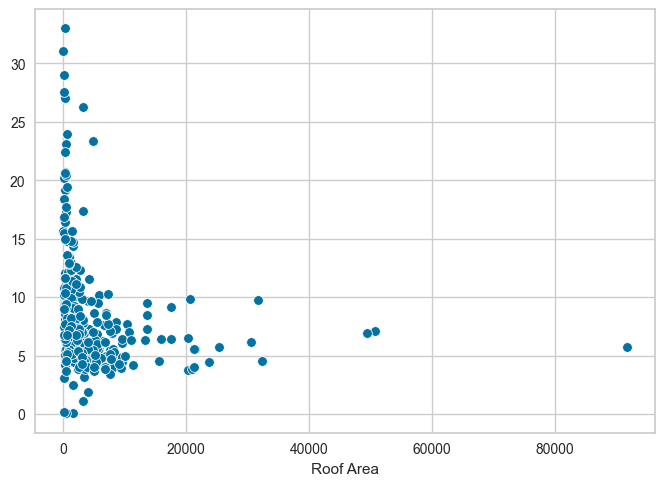

In [389]:
sns.scatterplot(data7['Roof Area'],data7['CF (C&Z)']/data7['Roof Area'])

In [390]:
#Buildings with CF e=wt./m2 < 3 or > 15 shall be considered outliers and shall be dropped
data7[ (data7['CF (C&Z)']/data7['Roof Area'] > 20) | (data7['CF (C&Z)']/data7['Roof Area'] < 3) ]

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,bay_spacing,sheeted_wall,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
4,5.700,9.870,4.00,0.80,9.870,0.000,0.000,0.00,0.000000,9.870,1,56.259000,[9.87],1,2,0,1,0.57,0.50,0.00,7214.092578,2258.493483,1631.191800,197.520000,0.00000,2943.656439,102.458900,0.00000,0.0,37.871956,42.90000,0.0,NO,NO
7,3.218,14.570,5.00,0.80,7.285,7.285,0.000,0.00,0.000000,7.285,2,46.886260,"[7.285, 7.285]",1,3,0,1,0.57,0.50,0.00,7597.581887,2605.675818,944.680649,205.320000,0.00000,3596.993800,143.003908,0.00000,0.0,62.307712,39.60000,0.0,NO,NO
39,12.196,36.268,5.00,0.20,2.006,2.006,2.006,2.00,2.005625,2.015,18,442.324528,"[2.006, 2.006, 2.006, 2.006, 2.006, 2.006, 2.0...",1,4,0,0,0.58,0.00,0.00,19519.259200,15793.091200,33.173120,160.200000,2891.99970,0.000000,579.734720,0.00000,0.0,61.060460,0.00000,0.0,NO,NO
55,60.570,67.400,12.00,1.00,7.100,7.100,6.000,2.15,5.320000,5.617,12,4082.418000,"[7.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 2.15,...",1,10,0,1,0.57,0.00,0.00,637278.315100,533795.849100,7761.674152,3984.999119,0.00000,83841.525650,2383.549485,4314.14280,0.0,720.054797,476.52000,0.0,YES,YES
57,12.350,28.615,8.50,1.00,6.400,5.000,6.150,5.30,5.783333,5.723,5,353.395250,"[6.4, 5.3, 5.9, 6.15, 5.0]",1,6,0,0,0.57,0.00,0.00,7602.848965,5435.412785,34.272000,124.200000,1676.89377,0.000000,181.020000,0.00000,0.0,69.921410,81.12900,0.0,NO,NO
64,13.216,15.770,11.50,1.00,4.135,4.135,3.750,3.75,0.000000,3.942,4,208.416320,"[4.135, 3.75, 3.75, 4.135]",1,3,2,1,0.58,0.10,0.00,45957.861000,20422.798480,6874.347720,6626.313012,0.00000,8986.512000,523.725014,1577.74320,0.0,415.796580,530.62500,0.0,YES,NO
72,25.000,60.000,12.00,1.00,5.000,2.630,7.190,3.06,5.127300,5.000,12,1500.000000,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.023, 5.0...",1,14,0,1,0.58,0.00,0.00,206969.930700,147251.824600,3711.591952,13060.539040,0.00000,33530.325000,1050.642916,7026.13296,0.0,717.954240,620.92000,0.0,YES,YES
81,27.000,60.000,11.20,1.00,6.000,6.000,6.000,6.00,6.000000,6.000,10,1620.000000,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...",1,11,0,0,0.58,0.00,0.00,197706.435900,104016.178000,73.440000,56014.184000,33534.52682,0.000000,1846.764000,0.00000,0.0,1574.543140,646.80000,0.0,YES,YES
330,11.000,24.000,15.95,1.00,8.000,8.000,0.000,8.00,0.000000,8.000,3,264.000000,"[8.0, 8.0, 8.0]",1,4,0,0,0.57,0.00,0.00,78643.185150,47778.872310,7141.918250,10817.094910,6276.03220,0.000000,747.691973,4307.21280,0.0,1132.226700,442.13600,0.0,YES,NO
331,11.000,24.000,15.95,1.00,8.000,8.000,0.000,8.00,0.000000,8.000,3,264.000000,"[8.0, 8.0, 8.0]",1,4,0,1,0.57,0.00,0.00,88487.668650,47778.872310,7141.918250,10817.094910,390.31570,15730.200000,747.691973,4307.21280,0.0,1132.226700,442.13600,0.0,YES,NO


In [391]:
data7[ (data7['CF (C&Z)']/data7['Roof Area'] > 15) | (data7['CF (C&Z)']/data7['Roof Area'] < 3) ].index

Int64Index([  4,   7,   8,  39,  55,  57,  64,  72,  81,  87, 105, 184, 238,
            309, 330, 331, 337, 338, 343, 344, 361, 388, 389, 390, 408, 409,
            414, 415, 417, 450, 451, 455, 497, 502, 504],
           dtype='int64')

In [392]:
data7.drop(data7[ (data7['CF (C&Z)']/data7['Roof Area'] > 20) | (data7['CF (C&Z)']/data7['Roof Area'] < 3) ].index ,axis = 0
           , inplace = True)

In [393]:
data7.shape

(356, 34)

<AxesSubplot:ylabel='Density'>

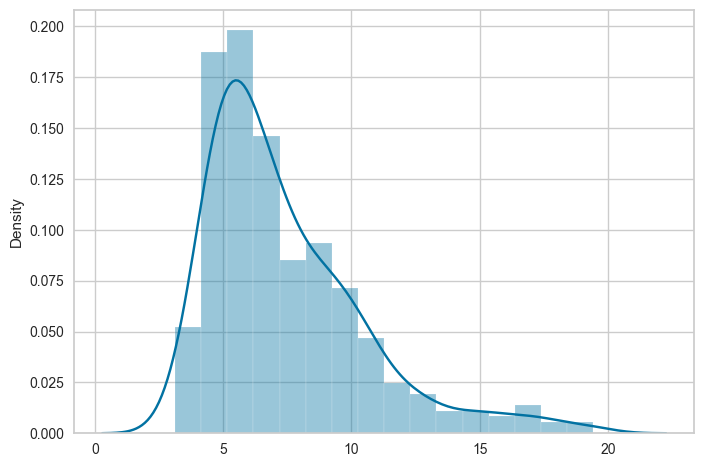

In [394]:
sns.distplot( data7['CF (C&Z)'] / data7['Roof Area'] )

In [395]:
np.std(data7['CF (C&Z)']/data7['Roof Area'])

3.0479177591863564

<AxesSubplot:xlabel='Roof Area', ylabel='CF (C&Z)'>

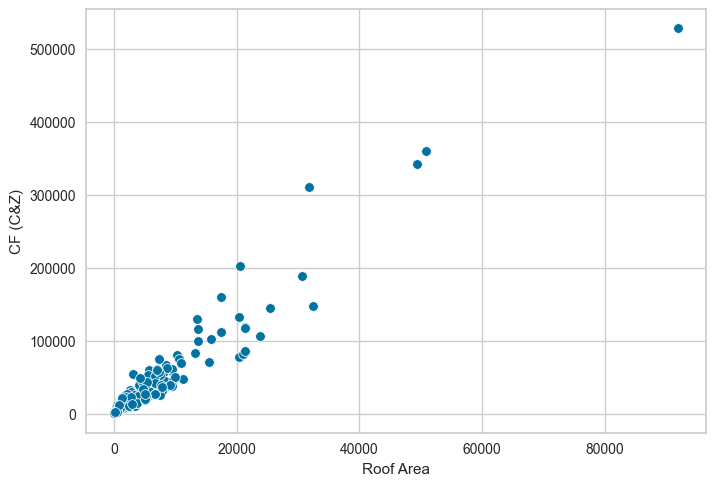

In [396]:
sns.scatterplot(data7['Roof Area'],data7['CF (C&Z)'])

<AxesSubplot:xlabel='avg_bay'>

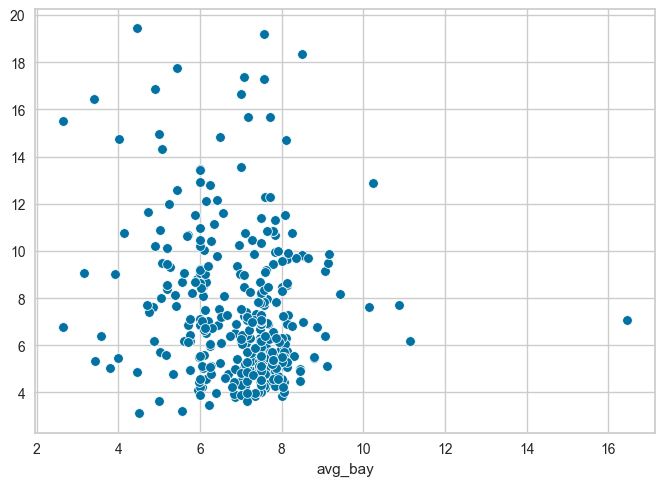

In [397]:
sns.scatterplot(data7['avg_bay'],data7['CF (C&Z)']/data7['Roof Area'])

In [398]:
data7[data7['CF (C&Z)']/data7['Roof Area'] > 15]

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,bay_spacing,sheeted_wall,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load,Total Weight,Frames,CF (C&Z),Sundry Parts,Sheeting,Tempcon Panels,Trims,Decking,Joist,St. BO- Anchor Bolts,SP. BO,Special Works,Mezz,Crane
8,3.700,7.170,4.000,0.8,7.170,0.000,0.000,0.000,0.000000,7.170,1,26.5290,[7.17],1,2,0,1,0.57,0.50,0.0,4210.877885,1730.019985,415.62180,145.840000,0.00000,1783.60,86.577900,0.000,0.0,31.06820,18.1500,0.0,NO,NO
87,8.975,22.700,13.570,0.5,7.785,7.785,0.000,7.200,0.000000,7.567,3,203.7325,"[7.785, 7.2, 7.785]",1,4,0,0,0.58,0.10,0.0,47568.655150,28470.780000,3912.93544,6890.194884,4056.24800,0.00,452.188251,3334.320,0.0,387.63858,64.3500,0.0,YES,NO
105,37.000,85.000,13.275,0.5,8.000,6.000,7.100,7.100,7.100000,7.083,12,3145.0000,"[8.0, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, ...",1,11,2,0,0.58,0.25,0.0,454691.334300,258562.814100,54678.93240,31709.421800,63411.77900,0.00,18933.866740,11639.232,0.0,4769.94820,10985.3400,0.0,NO,NO
184,9.900,37.870,14.850,1.0,9.085,7.085,8.500,5.200,7.233333,7.574,5,374.9130,"[9.085, 8.5, 8.0, 5.2, 7.085]",1,6,0,0,0.57,0.20,0.0,37127.889700,22783.520000,6481.32140,1966.080000,3432.87440,0.00,855.165900,0.000,0.0,306.45760,1302.4704,0.0,NO,NO
238,5.460,14.000,9.500,1.0,7.000,7.000,0.000,0.000,0.000000,7.000,2,76.4400,"[7.0, 7.0]",1,3,0,1,0.57,0.15,0.0,9745.922200,4086.212000,1274.19360,426.120000,0.00000,3612.24,277.612200,0.000,0.0,69.54440,0.0000,0.0,NO,NO
309,4.750,8.500,6.900,0.0,8.500,0.000,0.000,0.000,0.000000,8.500,1,40.3750,[8.5],1,2,0,1,0.57,0.15,0.0,3408.208000,813.940000,741.71600,70.080000,0.00000,1650.00,112.530000,0.000,0.0,19.94200,0.0000,0.0,NO,NO
361,16.700,2.653,5.000,1.0,2.653,0.000,0.000,0.000,0.000000,2.653,1,44.3051,[2.653],1,2,1,0,0.58,0.00,0.0,2275.045867,904.280788,686.69196,96.756800,477.82131,0.00,80.181609,0.000,0.0,29.31340,0.0000,0.0,NO,NO
389,13.000,27.240,9.650,2.5,3.410,3.410,3.410,3.410,3.410000,3.405,8,354.1200,"[3.41, 3.41, 3.41, 3.41, 3.41, 3.41, 3.41, 3.41]",1,9,0,1,0.75,0.35,0.0,83134.441490,46527.100000,5824.07040,3117.778400,2487.08000,19232.00,1136.586690,3160.080,0.0,1336.56400,313.1820,0.0,YES,NO
390,12.870,44.540,9.650,2.5,4.454,4.454,4.454,4.454,4.454000,4.454,10,573.2298,"[4.454, 4.454, 4.454, 4.454, 4.454, 4.454, 4.4...",1,11,0,1,0.75,0.35,0.0,160326.116100,81578.900000,11142.53920,14612.022800,5532.34280,37388.00,2252.577265,5179.680,0.0,2257.27600,382.7780,0.0,YES,NO
414,9.710,14.670,3.250,1.0,4.885,4.885,0.000,4.500,0.000000,4.890,3,142.4457,"[4.885, 4.5, 4.885]",1,4,0,1,0.58,0.00,0.0,10470.918850,2411.106000,2404.70288,591.695200,62.86000,3985.20,289.579628,0.000,0.0,629.45514,96.3200,0.0,NO,NO


## Data Split

####  data subset1 for Cold Formed/secondary Steel Weight prediction
#### data subset2 for Frames/Primary Steel Weight prediction (not addressed in this model)

In [399]:
# for this version we will consider only the main parameters for the building Width, length , eave height, no of bays,
# sheeted wall, tempcon, loads
# we will disregard features Roof area, roof slope , data about bays

In [400]:
data7.columns

Index(['Width', 'Length', 'Eave Height', 'Roof Slope', 'first_bay', 'last_bay',
       'max_int_bay', 'min_int_bay', 'avg_int_bay', 'avg_bay', 'no_of_bays',
       'Roof Area', 'bay_spacing', 'sheeted_wall', 'No of Main Frames',
       'No of Post and Beams', 'Tempcon', 'Live Load', ' Collateral Load',
       'Snow Load', 'Total Weight', 'Frames', 'CF (C&Z)', 'Sundry Parts',
       'Sheeting', 'Tempcon Panels', 'Trims', 'Decking', 'Joist',
       'St. BO- Anchor Bolts', 'SP. BO', 'Special Works', 'Mezz', 'Crane'],
      dtype='object')

In [401]:
data7[['CF (C&Z)' , 'Width', 'Length', 'Eave Height', 'Roof Slope', 'first_bay', 'last_bay',
       'max_int_bay', 'min_int_bay', 'avg_int_bay', 'avg_bay', 'no_of_bays',
       'Roof Area', 'bay_spacing', 'sheeted_wall', 'No of Main Frames',
       'No of Post and Beams', 'Tempcon', 'Live Load', ' Collateral Load',
       'Snow Load']].corr().sort_values('CF (C&Z)' , ascending = False )

,CF (C&Z),Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,sheeted_wall,No of Main Frames,No of Post and Beams,Tempcon,Live Load,Collateral Load,Snow Load
CF (C&Z),1.000000,0.723670,0.748255,0.268601,-0.206470,0.289767,0.372853,0.389839,0.292063,0.333316,0.373358,0.653744,0.964405,0.069312,0.680442,-0.045221,0.146147,0.018593,0.329640,-0.013101
Roof Area,0.964405,0.771371,0.752224,0.226374,-0.172712,0.266337,0.346577,0.345057,0.299988,0.332137,0.355487,0.669545,1.000000,0.065088,0.686405,-0.004361,0.129290,0.013687,0.296800,-0.010028
Length,0.748255,0.421381,1.000000,0.292529,-0.146920,0.307634,0.359451,0.497779,0.354620,0.507996,0.387845,0.959129,0.752224,0.135048,0.957864,-0.013095,0.121140,-0.042426,0.261274,0.030217
Width,0.723670,1.000000,0.421381,0.187015,-0.166461,0.274697,0.348006,0.293937,0.304157,0.307222,0.341217,0.350768,0.771371,0.043027,0.343318,0.137438,0.126659,0.010433,0.248823,-0.004568
No of Main Frames,0.680442,0.343318,0.957864,0.292139,-0.139738,0.139467,0.197939,0.385400,0.207116,0.417367,0.182044,0.985323,0.686405,0.102793,1.000000,-0.161561,0.144799,-0.028466,0.242353,0.043318
no_of_bays,0.653744,0.350768,0.959129,0.272163,-0.112765,0.152001,0.185387,0.383076,0.205268,0.418617,0.167043,1.000000,0.669545,0.109716,0.985323,-0.056370,0.126786,-0.024039,0.241610,0.033323
max_int_bay,0.389839,0.293937,0.497779,0.274008,-0.120846,0.455809,0.539324,1.000000,0.658897,0.789647,0.627565,0.383076,0.345057,0.165855,0.385400,0.095902,0.022909,-0.047316,0.131289,0.038726
avg_bay,0.373358,0.341217,0.387845,0.276606,-0.139352,0.753132,0.778103,0.627565,0.732215,0.603371,1.000000,0.167043,0.355487,0.246877,0.182044,0.208544,0.012411,-0.123959,0.108068,0.010166
last_bay,0.372853,0.348006,0.359451,0.287625,-0.074198,0.607579,1.000000,0.539324,0.667379,0.490316,0.778103,0.185387,0.346577,0.200081,0.197939,0.176769,-0.030857,-0.109702,0.073355,-0.003555
avg_int_bay,0.333316,0.307222,0.507996,0.336873,-0.104998,0.401551,0.490316,0.789647,0.635227,1.000000,0.603371,0.418617,0.332137,0.198590,0.417367,0.102608,0.095599,-0.059382,0.075784,0.055390


In [402]:
data8 = data7[['Width', 'Length', 'Eave Height', 'Roof Slope', 'first_bay', 'last_bay',
       'max_int_bay', 'min_int_bay', 'avg_int_bay', 'avg_bay', 'no_of_bays',
       'Roof Area', 'sheeted_wall', 'Tempcon', 'Live Load', ' Collateral Load',
       'Snow Load', 'CF (C&Z)' ]]

In [403]:
#data8['avg_bay'] = np.square(data8['avg_bay'])

In [404]:
data8.head()

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,sheeted_wall,Tempcon,Live Load,Collateral Load,Snow Load,CF (C&Z)
0,9.250,44.624,3.64,0.5,3.430,3.430,3.43,3.43,3.43,3.433,13,412.77200,1,1,0.57,0.0,0.0,2205.442020
1,34.600,47.000,21.55,4.0,7.900,7.900,7.80,7.80,7.80,7.833,6,1626.20000,1,1,0.58,0.0,0.0,17331.089200
5,13.762,19.970,2.70,0.8,5.385,4.685,3.30,3.30,3.30,3.994,5,274.82714,1,1,0.57,0.5,0.0,1502.472824
6,10.950,20.270,7.10,1.2,4.785,4.785,6.50,4.20,0.00,5.068,4,221.95650,1,1,0.57,0.5,0.0,2101.520340
8,3.700,7.170,4.00,0.8,7.170,0.000,0.00,0.00,0.00,7.170,1,26.52900,1,1,0.57,0.5,0.0,415.621800


In [405]:
dsubset = data8.copy()

In [406]:
dsubset.shape

(356, 18)

In [659]:
dsubset.to_csv('D:/00-Data Science and Data Analysis/ML Projects/03-Weight prediction for data from ZS-Egypt -first project/dsubset.csv')

In [407]:
#sns.distplot(dsubset['Length'], bins = 50)

# Model Selection-01

In [408]:
# check skewness for each column to see where should we transform data

In [409]:
df_skew = pd.DataFrame(dsubset.columns,columns=['Feature'])
df_skew['skew'] = df_skew['Feature'].apply(lambda feat:stats.skew(dsubset[feat]))
df_skew['absolute_skew'] = abs(df_skew['skew'])
df_skew['skewed'] = df_skew['absolute_skew'].apply(lambda skewness : True if skewness >=1.1 else False)
df_skew.set_index('Feature' , drop = True , inplace = True)

In [410]:
df_skew

,skew,absolute_skew,skewed
Feature,,,
Width,3.581050,3.581050,True
Length,2.452958,2.452958,True
Eave Height,0.597143,0.597143,False
Roof Slope,2.406904,2.406904,True
first_bay,-0.380789,0.380789,False
last_bay,-0.311698,0.311698,False
max_int_bay,-0.553742,0.553742,False
min_int_bay,-1.098697,1.098697,False
avg_int_bay,-1.178288,1.178288,True


In [411]:
df_skew[df_skew['skewed'] == True].index
# all columns are >1.1 skewness, value 1.1 was chosen to avoid transforming columns related to bays
# we should also not transform Roof slope columns so as not to get errors since it has negative values

Index(['Width', 'Length', 'Roof Slope', 'avg_int_bay', 'no_of_bays',
       'Roof Area', 'sheeted_wall', ' Collateral Load', 'Snow Load',
       'CF (C&Z)'],
      dtype='object', name='Feature')

In [412]:
skewed_features = list(df_skew[df_skew['skewed'] == True].index)

In [413]:
skewed_features.remove('Roof Slope')

In [414]:
dsubset_1 = dsubset.copy()

In [415]:
# we are going to apply log1p transformation to all skewed columns except the 0/1 "Tempcon" column
for col in skewed_features:
    dsubset_1[col] = dsubset_1[col].apply(np.log1p)

In [416]:
dsubset_1.describe()

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,sheeted_wall,Tempcon,Live Load,Collateral Load,Snow Load,CF (C&Z)
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,3.524638,4.130253,9.670256,0.938601,6.819937,6.767361,6.612281,6.551062,1.771318,6.963225,2.315193,7.592918,0.677571,0.356742,0.575730,0.084646,0.012746,9.523853
std,0.732883,0.718232,3.819321,0.580269,1.573498,1.640446,2.485830,1.943922,0.757385,1.328337,0.573147,1.321742,0.102878,0.479712,0.042945,0.113965,0.078658,1.212418
min,1.547563,1.295549,0.000000,-1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,2.653000,0.693147,3.315240,0.000000,0.000000,0.300000,0.000000,0.000000,4.728237
25%,3.038498,3.756919,7.175000,0.665000,6.000000,6.000000,6.000000,6.000000,1.945884,6.086750,1.945910,6.988715,0.693147,0.000000,0.570000,0.000000,0.000000,8.971265
50%,3.575147,4.203722,9.410000,1.000000,7.000000,7.000000,7.304000,7.000000,2.096378,7.185000,2.302585,7.649416,0.693147,0.000000,0.580000,0.000000,0.000000,9.585843
75%,4.025352,4.615121,12.000000,1.000000,7.900000,7.796250,8.000000,7.700000,2.170123,7.740250,2.639057,8.486783,0.693147,1.000000,0.580000,0.139762,0.000000,10.180289
max,6.010286,6.190520,29.000000,5.000000,14.050000,16.800000,22.100000,16.800000,2.879198,16.454000,4.110874,11.427335,0.693147,1.000000,1.000000,0.530628,0.774727,13.176016


In [417]:
sk = []
for feat in df_skew.index:
    sk.append(abs(stats.skew(dsubset_1[feat])))
df_skew['trans_data_absolute_skew'] = np.array(sk)
df_skew['trans_data_skewed'] = df_skew['trans_data_absolute_skew'].apply(lambda skewness : True if skewness >=1.1 else False)
df_skew

,skew,absolute_skew,skewed,trans_data_absolute_skew,trans_data_skewed
Feature,,,,,
Width,3.581050,3.581050,True,0.084715,False
Length,2.452958,2.452958,True,0.496940,False
Eave Height,0.597143,0.597143,False,0.597143,False
Roof Slope,2.406904,2.406904,True,2.406904,True
first_bay,-0.380789,0.380789,False,0.380789,False
last_bay,-0.311698,0.311698,False,0.311698,False
max_int_bay,-0.553742,0.553742,False,0.553742,False
min_int_bay,-1.098697,1.098697,False,1.098697,False
avg_int_bay,-1.178288,1.178288,True,1.811872,True


In [418]:
# still some skewed columns but we will proceed
# we are going to drop Roof Slope, Snow Load Columns as a trial

In [419]:
#dsubset_1.drop(['Roof Slope', 'Snow Load'], axis = 1, inplace = True)

In [420]:
# split train test data again using the same random seed above 101

In [421]:
# subset1 X set shall be assigned to a variable name ss_X1
ss1_X = dsubset_1.drop('CF (C&Z)', axis = 1)

In [422]:
ss1_X.head()

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,sheeted_wall,Tempcon,Live Load,Collateral Load,Snow Load
0,2.327278,3.820434,3.64,0.5,3.430,3.430,3.43,3.43,1.488400,3.433,2.639057,6.025315,0.693147,1,0.57,0.000000,0.0
1,3.572346,3.871201,21.55,4.0,7.900,7.900,7.80,7.80,2.174752,7.833,1.945910,7.394616,0.693147,1,0.58,0.000000,0.0
5,2.692056,3.043093,2.70,0.8,5.385,4.685,3.30,3.30,1.458615,3.994,1.791759,5.619774,0.693147,1,0.57,0.405465,0.0
6,2.480731,3.057298,7.10,1.2,4.785,4.785,6.50,4.20,0.000000,5.068,1.609438,5.406977,0.693147,1,0.57,0.405465,0.0
8,1.547563,2.100469,4.00,0.8,7.170,0.000,0.00,0.00,0.000000,7.170,0.693147,3.315240,0.693147,1,0.57,0.405465,0.0


In [423]:
ss1_X.shape

(356, 17)

In [424]:
# subset1 Y set shall be assigned to a variable name ss_Y
ss1_Y = dsubset_1[['CF (C&Z)']]

In [425]:
ss1_Y.shape

(356, 1)

In [426]:
# Train-test set split

In [427]:
X1_train, X1_test, y1_train, y1_test = train_test_split( ss1_X , ss1_Y , test_size = 0.25 , random_state = 101 )

In [428]:
X1_train.head()

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,sheeted_wall,Tempcon,Live Load,Collateral Load,Snow Load
385,3.277145,4.048998,8.00,1.0,6.500,4.80,6.500,4.90,1.983953,6.260,2.302585,7.270779,0.693147,0,0.58,0.262364,0.0
132,4.246064,4.753590,11.50,0.0,7.650,7.65,7.650,7.65,2.157559,7.667,2.772589,8.976698,0.693147,1,0.58,0.470004,0.0
404,4.036009,4.207971,10.00,1.5,6.894,6.35,6.894,6.35,2.031039,6.622,2.397895,8.211437,0.693147,0,0.58,0.000000,0.0
262,4.316421,5.309109,11.35,0.5,10.000,10.00,9.000,9.00,2.302585,9.144,3.135494,9.519368,0.693147,1,0.58,0.000000,0.0
252,4.553456,5.538003,11.60,0.5,8.400,8.40,8.400,8.40,2.240710,8.439,3.433987,10.076972,0.693147,1,0.58,0.000000,0.0


In [429]:
s1 = setup( pd.concat([X1_train,y1_train] , axis = 1) , target ='CF (C&Z)' )

,Description,Value
0,session_id,3036
1,Target,CF (C&Z)
2,Original Data,"(267, 18)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(186, 17)"


In [430]:
best_model_1 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2199,0.0867,0.2873,0.9371,0.0302,0.0243,0.0040
ridge,Ridge Regression,0.2198,0.0868,0.2876,0.9368,0.0303,0.0243,0.0060
lr,Linear Regression,0.2264,0.0929,0.2988,0.9318,0.0317,0.0252,0.3130
omp,Orthogonal Matching Pursuit,0.2682,0.1107,0.3266,0.9193,0.0336,0.0295,0.0040
rf,Random Forest Regressor,0.2482,0.1282,0.3464,0.9117,0.0367,0.0276,0.0850
catboost,CatBoost Regressor,0.2466,0.1340,0.3508,0.9101,0.0368,0.0276,0.3780
et,Extra Trees Regressor,0.2555,0.1325,0.3537,0.9099,0.0378,0.0286,0.0800
gbr,Gradient Boosting Regressor,0.2394,0.1306,0.3421,0.9098,0.0366,0.0267,0.0090
ada,AdaBoost Regressor,0.2824,0.1587,0.3847,0.8943,0.0415,0.0318,0.0110
xgboost,Extreme Gradient Boosting,0.2714,0.1554,0.3818,0.8925,0.0410,0.0303,0.0820


### Results have gotten better but still bad let's try Scaling (transforming input/X data so as they have a "Zero" as average)

In [431]:
dsubset_2 = dsubset_1.copy()

In [432]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [433]:
ss2_X = dsubset_2.drop('CF (C&Z)', axis = 1)

In [434]:
ss2_X.describe()

,Width,Length,Eave Height,Roof Slope,first_bay,last_bay,max_int_bay,min_int_bay,avg_int_bay,avg_bay,no_of_bays,Roof Area,sheeted_wall,Tempcon,Live Load,Collateral Load,Snow Load
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,3.524638,4.130253,9.670256,0.938601,6.819937,6.767361,6.612281,6.551062,1.771318,6.963225,2.315193,7.592918,0.677571,0.356742,0.575730,0.084646,0.012746
std,0.732883,0.718232,3.819321,0.580269,1.573498,1.640446,2.485830,1.943922,0.757385,1.328337,0.573147,1.321742,0.102878,0.479712,0.042945,0.113965,0.078658
min,1.547563,1.295549,0.000000,-1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,2.653000,0.693147,3.315240,0.000000,0.000000,0.300000,0.000000,0.000000
25%,3.038498,3.756919,7.175000,0.665000,6.000000,6.000000,6.000000,6.000000,1.945884,6.086750,1.945910,6.988715,0.693147,0.000000,0.570000,0.000000,0.000000
50%,3.575147,4.203722,9.410000,1.000000,7.000000,7.000000,7.304000,7.000000,2.096378,7.185000,2.302585,7.649416,0.693147,0.000000,0.580000,0.000000,0.000000
75%,4.025352,4.615121,12.000000,1.000000,7.900000,7.796250,8.000000,7.700000,2.170123,7.740250,2.639057,8.486783,0.693147,1.000000,0.580000,0.139762,0.000000
max,6.010286,6.190520,29.000000,5.000000,14.050000,16.800000,22.100000,16.800000,2.879198,16.454000,4.110874,11.427335,0.693147,1.000000,1.000000,0.530628,0.774727


In [435]:
ss2_y = dsubset_2['CF (C&Z)']

In [436]:
scaler = StandardScaler()

In [437]:
#scaler.fit_transform(ss1_X_2)
ss2_X = pd.DataFrame(scaler.fit_transform(ss2_X) , columns = ss2_X.columns , index = ss2_X.index)

In [438]:
# split train test data

In [439]:
X2_train, X2_test, y2_train, y2_test = train_test_split( ss2_X , ss2_y , test_size = 0.25 , random_state = 101 )

In [440]:
s2 = setup( pd.concat([X2_train,y2_train] , axis = 1) , target ='CF (C&Z)' )

,Description,Value
0,session_id,4612
1,Target,CF (C&Z)
2,Original Data,"(267, 18)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(186, 17)"


In [441]:
best_model_2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2229,0.0897,0.2965,0.9169,0.0305,0.0246,0.0040
ridge,Ridge Regression,0.2234,0.0900,0.2970,0.9165,0.0306,0.0246,0.0030
lr,Linear Regression,0.2287,0.0939,0.3030,0.9140,0.0313,0.0253,0.0050
gbr,Gradient Boosting Regressor,0.2268,0.1122,0.3208,0.9086,0.0337,0.0257,0.0090
catboost,CatBoost Regressor,0.2191,0.1201,0.3307,0.9043,0.0342,0.0246,0.3900
et,Extra Trees Regressor,0.2325,0.1198,0.3299,0.9040,0.0343,0.0260,0.0760
rf,Random Forest Regressor,0.2401,0.1262,0.3369,0.8994,0.0349,0.0270,0.0850
omp,Orthogonal Matching Pursuit,0.2721,0.1154,0.3350,0.8951,0.0340,0.0298,0.0040
ada,AdaBoost Regressor,0.2632,0.1335,0.3475,0.8938,0.0361,0.0295,0.0130
xgboost,Extreme Gradient Boosting,0.2638,0.1430,0.3650,0.8810,0.0378,0.0296,0.0190


### Now and after data has been transformed and scaled we create and fit best performing models

In [442]:
X_train, X_test, y_train, y_test = X1_train, X1_test, y1_train, y1_test

In [443]:
# table below for model comparison after data transformation

In [444]:
kf = KFold(n_splits = 5, random_state=10)

In [445]:
estimators = []

In [446]:
df_metrics = pd.DataFrame(data = np.nan, columns = ['r2_score_train', 'r2_score_test' , 'MAE_train', 'MAE_test', 'MSE_train', 'MSE_test'],index = ['model'])

In [447]:
df_metrics

,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
model,NaN,NaN,NaN,NaN,NaN,NaN


In [448]:
#features = diabetes.columns[:diabetes.shape[1]]
#importances = random_search_ada.best_estimator_.feature_importances_
#indices = np.argsort(importances)

In [449]:
#features = diabetes.columns[:diabetes.shape[1]]
#importances = random_search_ada.best_estimator_.feature_importances_
#indices = np.argsort(importances)
#
#plt.title('Feature Importances')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()

In [450]:
def metrics_all(model_name,X_train_set,X_test_set,y_train_set,y_test_set,tuned=False):
    model = model_name
    model.fit(X_train_set,y_train_set)
    
    pred_train = np.exp(model.predict(X1_train))
    pred_test  = np.exp(model.predict(X1_test))
    r2_tr=r2_score(np.exp(y_train_set),pred_train)
    mae_tr=mean_absolute_error(np.exp(y_train_set),pred_train)
    mse_tr=mean_squared_error(np.exp(y_train_set),pred_train)
    r2_te=r2_score(np.exp(y_test_set),pred_test)
    mae_te=mean_absolute_error(np.exp(y_test_set),pred_test)
    mse_te=mean_squared_error(np.exp(y_test_set),pred_test)
    if tuned:
        df_metrics.loc[model_name.__class__.__name__+'_tuned'] = [r2_tr,r2_te,mae_tr,mae_te,mse_tr,mse_te]
    else:
        df_metrics.loc[model_name.__class__.__name__+'_not_tuned'] = [r2_tr,r2_te,mae_tr,mae_te,mse_tr,mse_te]
            
            
    if 'model' in df_metrics.index :
        df_metrics.drop('model', axis = 0 , inplace = True)
    
    print(model_name.__class__.__name__,'r2_score for train set = ',r2_tr)
    print(model_name.__class__.__name__,'r2_score for test set  = ',r2_te)
    print(model_name.__class__.__name__,'MAE      for train set = ',mae_tr)
    print(model_name.__class__.__name__,'MAE       for test set = ',mae_te)
    print(model_name.__class__.__name__,'MSE      for train set = ',mse_tr)
    print(model_name.__class__.__name__,'MSE       for test set = ',mse_te)
    return df_metrics

In [451]:
def wt_summary(model_name,X_train_set,X_test_set,y_train_set,y_test_set):
    model = model_name
    model.fit(X_train_set,y_train_set)
    pred_train = np.exp(model.predict(X_train_set))
    pred_test  = np.exp(model.predict(X_test_set))
    target_col = y_test_set.columns.to_list()[0]
    m = pred_test.shape[0]
    pred_test = pred_test.reshape(m,1)
    
    df_comparison = pd.DataFrame({'actual weight':np.exp(y_test)[target_col] , 'predicted weight':pd.Series(pred_test[:,0], index =y_test.index) } )
    df_comparison['difference %'] = np.round(( (df_comparison['actual weight']-df_comparison['predicted weight']) / df_comparison['actual weight'] * 100),2)
    
    return df_comparison    

## <span style = "color:green">Liner Regression Model</span>

In [452]:
lr0 = LinearRegression()

In [453]:
lr0.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [454]:
lr0_results = cross_val_score(estimator=lr0 , X = X_train , y= y_train , scoring='r2'
                              ,cv = kf)

In [455]:
lr0_results

array([0.93149798, 0.94779902, 0.91029383, 0.91937024, 0.95351621])

In [456]:
np.mean(lr0_results)

0.9324954580899568

<BarContainer object of 5 artists>

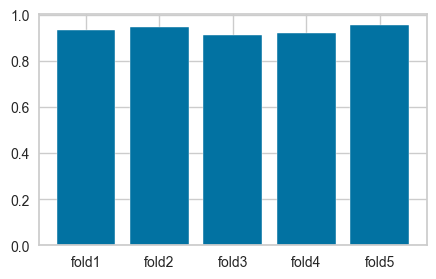

In [457]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , lr0_results , width=0.8)

In [458]:
metrics_all( lr0 , X_train , X_test , y_train , y_test )

LinearRegression r2_score for train set =  0.9453171860002696
LinearRegression r2_score for test set  =  0.95420220802668
LinearRegression MAE      for train set =  4829.3972776488545
LinearRegression MAE       for test set =  6646.390980024227
LinearRegression MSE      for train set =  89000771.17044033
LinearRegression MSE       for test set =  203319895.21663666


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.39098,8.900077e+07,2.033199e+08


In [459]:
lr0_comparison = wt_summary(lr0 , X_train , X_test , y_train , y_test)

<BarContainer object of 89 artists>

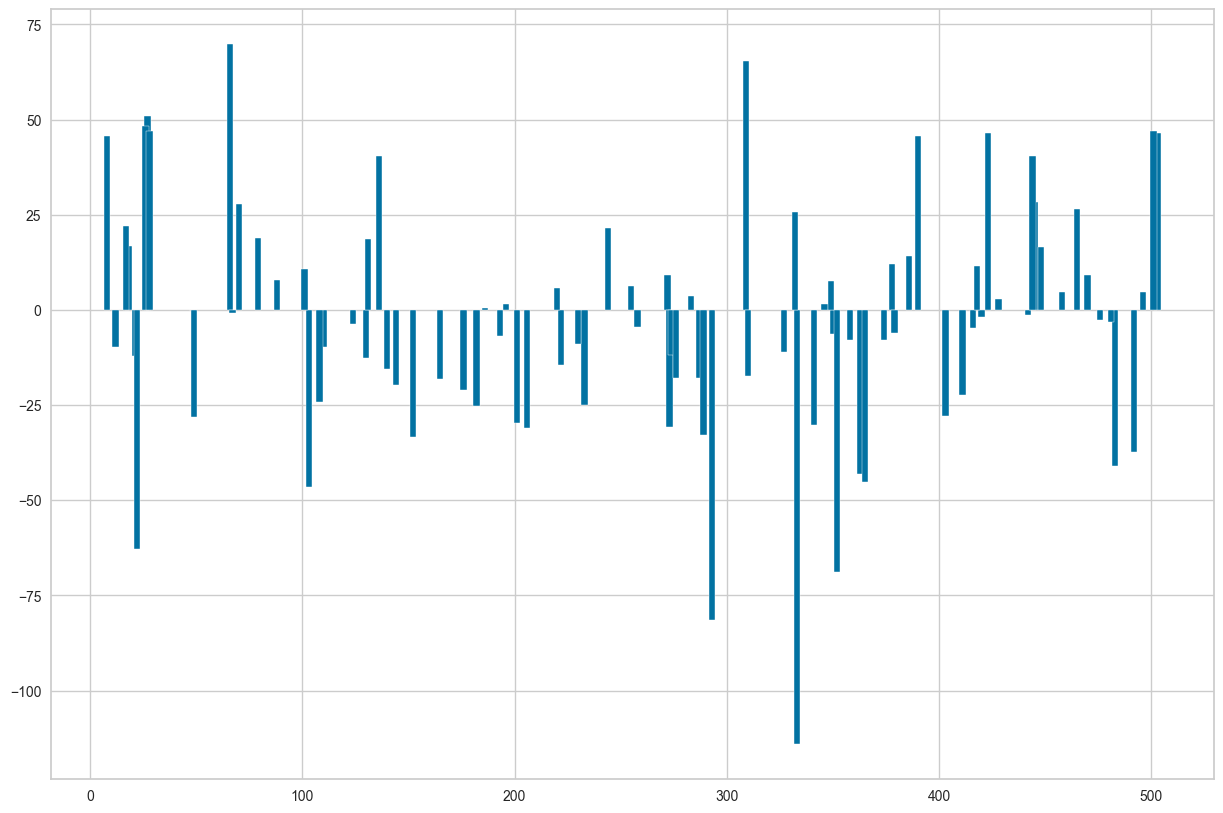

In [460]:
plt.figure(figsize = (15,10))
plt.bar(lr0_comparison.index,lr0_comparison['difference %'], width=3)

### <span style = "color:green">No Hyper parameter optimization for Linear Regression</span>

In [461]:
lr = LinearRegression()

In [462]:
metrics_all( lr , X_train , X_test , y_train , y_test ,tuned=True)

LinearRegression r2_score for train set =  0.9453171860002696
LinearRegression r2_score for test set  =  0.95420220802668
LinearRegression MAE      for train set =  4829.3972776488545
LinearRegression MAE       for test set =  6646.390980024227
LinearRegression MSE      for train set =  89000771.17044033
LinearRegression MSE       for test set =  203319895.21663666


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.39098,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.39098,8.900077e+07,2.033199e+08


In [463]:
estimators.append(('LinearRegression',lr))

## <span style = "color:green">Baysien Ridge Model</span>

In [464]:
br0 = BayesianRidge()

In [465]:
br0.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [466]:
br0_results = cross_val_score(estimator=br0 , X = X_train , y= y_train , scoring='r2'
                              ,cv = kf)

In [467]:
br0_results

array([0.92911137, 0.95168661, 0.91181896, 0.92688616, 0.94972263])

In [468]:
np.mean(br0_results)

0.9338451456459467

<BarContainer object of 5 artists>

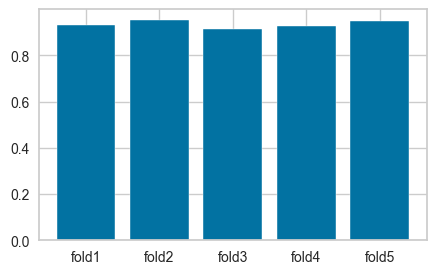

In [469]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , br0_results , width=0.8)

In [470]:
metrics_all(br0 , X_train , X_test , y_train , y_test )

BayesianRidge r2_score for train set =  0.9369186113991833
BayesianRidge r2_score for test set  =  0.8875491896824459
BayesianRidge MAE      for train set =  5000.2867280647215
BayesianRidge MAE       for test set =  7622.281543810827
BayesianRidge MSE      for train set =  102670141.15262231
BayesianRidge MSE       for test set =  499226840.108588


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08


In [471]:
br0_comparison = wt_summary(br0 , X_train , X_test , y_train , y_test)

<BarContainer object of 89 artists>

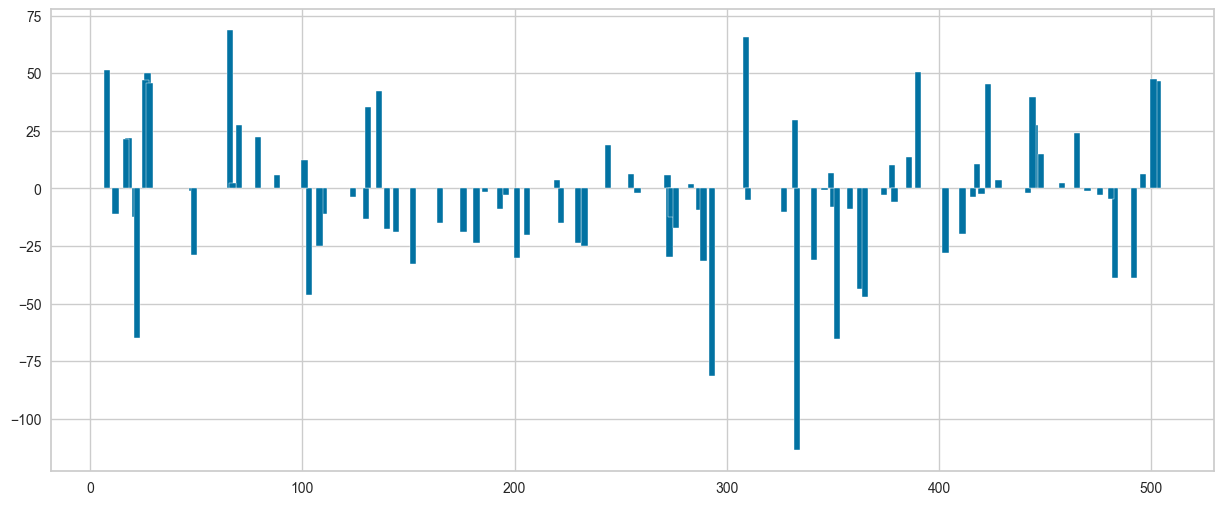

In [472]:
plt.figure(figsize = (15,6))
plt.bar(br0_comparison.index,br0_comparison['difference %'], width=3)

### <span style = "color:green">1-1: Hyper parameter optimization for BR using Optuna</span>

In [473]:
def br_objective(trial):
    n_iter = trial.suggest_int('n_iter', 50, 400)
    tol = trial.suggest_loguniform('tol', 1e-8, 1.0)
    alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 1.0)
    alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8, 1.0)
    lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8, 20.0)
    lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8, 1.0)
  
    model = BayesianRidge(
        n_iter=n_iter,
        tol=tol,
        alpha_1=alpha_1,
        alpha_2=alpha_2,
        lambda_1=lambda_1,
        lambda_2=lambda_2
    )
  
    model.fit(X_train, y_train)
  
#    cv_scores = np.exp(np.sqrt(-cross_val_score(model, X1_train, y1_train, scoring='r2', cv=kf)))
    cv_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)
    
    return np.mean(cv_scores)

In [474]:
study_br = optuna.create_study(direction='maximize')
study_br.optimize(br_objective, n_trials=200)

[I 2022-11-07 13:23:46,258] A new study created in memory with name: no-name-9a95187b-7939-446a-964f-aef52ca9b642
[I 2022-11-07 13:23:46,277] Trial 0 finished with value: 0.933840985251185 and parameters: {'n_iter': 384, 'tol': 0.025045860483221855, 'alpha_1': 0.02788232076827229, 'alpha_2': 0.020261520575495334, 'lambda_1': 7.08104783510701e-06, 'lambda_2': 0.7813470418910622}. Best is trial 0 with value: 0.933840985251185.
[I 2022-11-07 13:23:46,293] Trial 1 finished with value: 0.9338435671565415 and parameters: {'n_iter': 274, 'tol': 0.3285432991554656, 'alpha_1': 0.0041452506957743935, 'alpha_2': 0.008749041949012364, 'lambda_1': 0.023911241483411266, 'lambda_2': 0.00021046508970427866}. Best is trial 1 with value: 0.9338435671565415.
[I 2022-11-07 13:23:46,312] Trial 2 finished with value: 0.9338463927433264 and parameters: {'n_iter': 52, 'tol': 1.3557371244372219e-06, 'alpha_1': 0.7460813942378287, 'alpha_2': 0.007483061552300492, 'lambda_1': 8.314869543884677e-05, 'lambda_2': 1

[I 2022-11-07 13:23:46,850] Trial 24 finished with value: 0.9338915992831964 and parameters: {'n_iter': 221, 'tol': 5.57804723953869e-06, 'alpha_1': 1.065593970462654e-08, 'alpha_2': 0.050938876342023376, 'lambda_1': 0.00019604220408226495, 'lambda_2': 0.4025993425749587}. Best is trial 17 with value: 0.9339041313651792.
[I 2022-11-07 13:23:46,876] Trial 25 finished with value: 0.9338458295923397 and parameters: {'n_iter': 119, 'tol': 5.06310974790106e-05, 'alpha_1': 1.5358652071512793e-06, 'alpha_2': 0.0007577458545588437, 'lambda_1': 2.7788758191926e-07, 'lambda_2': 0.0008315894992475486}. Best is trial 17 with value: 0.9339041313651792.
[I 2022-11-07 13:23:46,904] Trial 26 finished with value: 0.9338523267759514 and parameters: {'n_iter': 78, 'tol': 0.0074249788557435225, 'alpha_1': 7.141632219277661e-08, 'alpha_2': 3.6601800336647023e-05, 'lambda_1': 3.954162563462041e-06, 'lambda_2': 0.009037803989964984}. Best is trial 17 with value: 0.9339041313651792.
[I 2022-11-07 13:23:46,930

[I 2022-11-07 13:23:47,537] Trial 49 finished with value: 0.9339042111229927 and parameters: {'n_iter': 188, 'tol': 0.00018819313207421899, 'alpha_1': 1.1297714617006661e-08, 'alpha_2': 0.016422378640374494, 'lambda_1': 1.022020064218458e-08, 'lambda_2': 0.21572763724789265}. Best is trial 49 with value: 0.9339042111229927.
[I 2022-11-07 13:23:47,564] Trial 50 finished with value: 0.9338306373863332 and parameters: {'n_iter': 181, 'tol': 0.0031157089683196255, 'alpha_1': 1.1464673986885759e-08, 'alpha_2': 0.5942083053145852, 'lambda_1': 5.635889648201571e-07, 'lambda_2': 0.00014732888557778467}. Best is trial 49 with value: 0.9339042111229927.
[I 2022-11-07 13:23:47,590] Trial 51 finished with value: 0.9339035217485352 and parameters: {'n_iter': 161, 'tol': 4.970317737461815e-05, 'alpha_1': 3.4845058395128274e-08, 'alpha_2': 0.026901414101747897, 'lambda_1': 2.5205205905997414e-08, 'lambda_2': 0.18207464700942907}. Best is trial 49 with value: 0.9339042111229927.
[I 2022-11-07 13:23:47

[I 2022-11-07 13:23:48,230] Trial 74 finished with value: 0.9339174814645945 and parameters: {'n_iter': 148, 'tol': 0.0002644134624190556, 'alpha_1': 0.0046620071690657875, 'alpha_2': 0.00350057258461807, 'lambda_1': 11.173385645745014, 'lambda_2': 0.8571941821209268}. Best is trial 74 with value: 0.9339174814645945.
[I 2022-11-07 13:23:48,258] Trial 75 finished with value: 0.9339103687114072 and parameters: {'n_iter': 96, 'tol': 9.462847716830106e-05, 'alpha_1': 0.0094462593994036, 'alpha_2': 0.004046499017466348, 'lambda_1': 10.13981212231251, 'lambda_2': 0.7034658103562997}. Best is trial 74 with value: 0.9339174814645945.
[I 2022-11-07 13:23:48,286] Trial 76 finished with value: 0.933899512687586 and parameters: {'n_iter': 96, 'tol': 0.0003591332784670693, 'alpha_1': 0.0066954159614255005, 'alpha_2': 0.0034351561967631023, 'lambda_1': 14.468142121016042, 'lambda_2': 0.8251696692680218}. Best is trial 74 with value: 0.9339174814645945.
[I 2022-11-07 13:23:48,316] Trial 77 finished w

[I 2022-11-07 13:23:48,936] Trial 99 finished with value: 0.9338645348137445 and parameters: {'n_iter': 120, 'tol': 4.04014431198568e-05, 'alpha_1': 0.03979247438197551, 'alpha_2': 0.000394539973638716, 'lambda_1': 0.13167849753589653, 'lambda_2': 0.6284409410940478}. Best is trial 97 with value: 0.9339175279608268.
[I 2022-11-07 13:23:48,964] Trial 100 finished with value: 0.9337252853490284 and parameters: {'n_iter': 85, 'tol': 0.0009317571112529709, 'alpha_1': 0.0023097096608099077, 'alpha_2': 0.00046993307235335965, 'lambda_1': 8.095249001522628, 'lambda_2': 0.12627980596708496}. Best is trial 97 with value: 0.9339175279608268.
[I 2022-11-07 13:23:48,992] Trial 101 finished with value: 0.9338998533250129 and parameters: {'n_iter': 116, 'tol': 0.0004085890510285985, 'alpha_1': 0.01754679699877926, 'alpha_2': 0.0002362497483212495, 'lambda_1': 2.6377220896436726, 'lambda_2': 0.6894868224370305}. Best is trial 97 with value: 0.9339175279608268.
[I 2022-11-07 13:23:49,018] Trial 102 fi

[I 2022-11-07 13:23:49,638] Trial 124 finished with value: 0.9338074639702627 and parameters: {'n_iter': 94, 'tol': 0.001434324695688079, 'alpha_1': 0.14737911756484015, 'alpha_2': 0.003540321961069611, 'lambda_1': 1.0931568200267459, 'lambda_2': 2.004031162609088e-05}. Best is trial 97 with value: 0.9339175279608268.
[I 2022-11-07 13:23:49,666] Trial 125 finished with value: 0.9339119672687858 and parameters: {'n_iter': 82, 'tol': 0.00010013958260118916, 'alpha_1': 0.01922079267201538, 'alpha_2': 0.007465790510824111, 'lambda_1': 2.462544708586133, 'lambda_2': 0.36154709359871995}. Best is trial 97 with value: 0.9339175279608268.
[I 2022-11-07 13:23:49,695] Trial 126 finished with value: 0.9338692824263892 and parameters: {'n_iter': 82, 'tol': 5.924916496393605e-06, 'alpha_1': 0.015133811899207856, 'alpha_2': 0.006183706282494777, 'lambda_1': 7.1269679987190635, 'lambda_2': 0.3320138877237761}. Best is trial 97 with value: 0.9339175279608268.
[I 2022-11-07 13:23:49,724] Trial 127 fini

[I 2022-11-07 13:23:50,375] Trial 149 finished with value: 0.9337016999550908 and parameters: {'n_iter': 81, 'tol': 1.9168921872812442e-05, 'alpha_1': 0.0010242612263014629, 'alpha_2': 6.811375365696267e-08, 'lambda_1': 19.793303209758815, 'lambda_2': 0.38393602007876376}. Best is trial 130 with value: 0.9339217083265894.
[I 2022-11-07 13:23:50,408] Trial 150 finished with value: 0.9338515710890632 and parameters: {'n_iter': 85, 'tol': 3.111661733270026e-06, 'alpha_1': 0.00032170888965544245, 'alpha_2': 2.418059690634232e-08, 'lambda_1': 4.812966846913807, 'lambda_2': 0.19321668226361555}. Best is trial 130 with value: 0.9339217083265894.
[I 2022-11-07 13:23:50,438] Trial 151 finished with value: 0.9339126127971689 and parameters: {'n_iter': 62, 'tol': 1.8408446837029683e-06, 'alpha_1': 0.0018561372852520198, 'alpha_2': 1.4277807883830947e-08, 'lambda_1': 4.00876269418566, 'lambda_2': 0.6733496501821872}. Best is trial 130 with value: 0.9339217083265894.
[I 2022-11-07 13:23:50,470] Tri

[I 2022-11-07 13:23:51,132] Trial 174 finished with value: 0.9339154876377485 and parameters: {'n_iter': 65, 'tol': 3.8935353133236576e-08, 'alpha_1': 0.002144422442089283, 'alpha_2': 4.352603900246896e-07, 'lambda_1': 13.648305518833622, 'lambda_2': 0.9593159470894547}. Best is trial 171 with value: 0.9339223979050431.
[I 2022-11-07 13:23:51,161] Trial 175 finished with value: 0.9339185642149305 and parameters: {'n_iter': 63, 'tol': 1.1840366762996406e-08, 'alpha_1': 0.006661119118773084, 'alpha_2': 1.0136052084856647e-06, 'lambda_1': 7.439938529568175, 'lambda_2': 0.9521736401985055}. Best is trial 171 with value: 0.9339223979050431.
[I 2022-11-07 13:23:51,191] Trial 176 finished with value: 0.9339168454744724 and parameters: {'n_iter': 65, 'tol': 1.6642111236751122e-08, 'alpha_1': 0.00046958894257654113, 'alpha_2': 2.14128139368063e-06, 'lambda_1': 7.2148597304340205, 'lambda_2': 0.9791101003213598}. Best is trial 171 with value: 0.9339223979050431.
[I 2022-11-07 13:23:51,221] Trial

[I 2022-11-07 13:23:51,879] Trial 199 finished with value: 0.9339076210061725 and parameters: {'n_iter': 50, 'tol': 7.273797314315675e-08, 'alpha_1': 0.004899052482531597, 'alpha_2': 2.064556285725191e-07, 'lambda_1': 10.430319853020224, 'lambda_2': 0.6905022327540961}. Best is trial 188 with value: 0.9339226610456398.


In [475]:
study_br.best_value

0.9339226610456398

In [476]:
study_br.best_params

{'n_iter': 59,
 'tol': 1.6735433032204804e-08,
 'alpha_1': 0.0020435079337177363,
 'alpha_2': 1.23603555158093e-07,
 'lambda_1': 10.229242080032744,
 'lambda_2': 0.9704245103702412}

In [477]:
br_best_params = study_br.best_params

In [478]:
br = BayesianRidge(**br_best_params)

In [479]:
metrics_all( br , X_train , X_test , y_train , y_test, tuned=True )

BayesianRidge r2_score for train set =  0.9383371584855513
BayesianRidge r2_score for test set  =  0.8957200353950859
BayesianRidge MAE      for train set =  4970.755299536186
BayesianRidge MAE       for test set =  7512.735661432221
BayesianRidge MSE      for train set =  100361339.25685744
BayesianRidge MSE       for test set =  462952263.9217469


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08


In [480]:
estimators.append(('BayesianRidge',br))

## <span style="color:green"> Ridge Regression Model:</span>

In [481]:
rr0 = Ridge()

In [482]:
rr0.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [483]:
rr0_results = cross_val_score(estimator=rr0 , X = X_train , y= y_train , scoring='r2'
                              ,cv = kf)

In [484]:
rr0_results

array([0.9295985 , 0.95108456, 0.91178482, 0.9268223 , 0.950387  ])

In [485]:
np.mean(rr0_results)

0.9339354344667286

<BarContainer object of 5 artists>

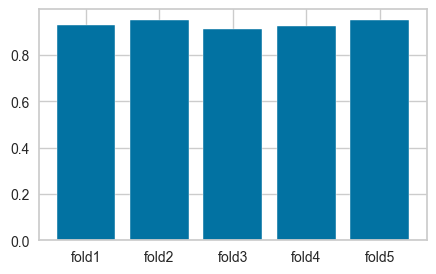

In [486]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , rr0_results , width=0.8)

In [487]:
metrics_all(rr0 , X_train , X_test , y_train , y_test )

Ridge r2_score for train set =  0.9384897131515882
Ridge r2_score for test set  =  0.8968122344987316
Ridge MAE      for train set =  4968.238160723377
Ridge MAE       for test set =  7497.335069197006
Ridge MSE      for train set =  100113044.00776885
Ridge MSE       for test set =  458103431.74576986


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08


In [488]:
rr0_comparison = wt_summary(rr0 , X_train , X_test , y_train , y_test)

<BarContainer object of 89 artists>

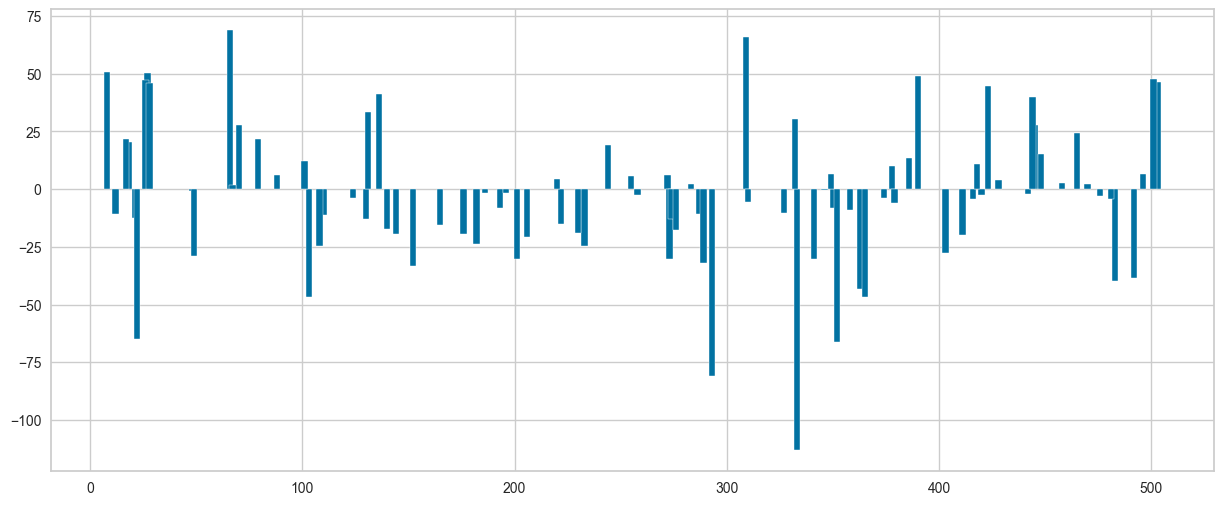

In [489]:
plt.figure(figsize = (15,6))
plt.bar(rr0_comparison.index,rr0_comparison['difference %'], width=3)

### <span style="color:green"> 2-1: hyper parameter optimization for Ridge Regression model using Optuna</span>

In [490]:
def rr_objective(trial):
    alpha = trial.suggest_float( 'alpha', 0.01 , 2.0 ),
#    fit_intercept=True,
#    normalize=False,
#    copy_X=True,
#    max_iter=None,
    tol = trial.suggest_loguniform('tol', 1e-8 , 10.0),
#    solver= trial.suggest_categorical('solver' , ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
#    random_state=None,

    model = Ridge( tol = tol ,
        alpha = alpha
                 )

    model.fit(X_train, y_train)
  
#    cv_scores = np.exp(np.sqrt(-cross_val_score(model, X1_train, y1_train, scoring='neg_mean_squared_error', cv=kf)))
    cv_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)  
    return np.mean(cv_scores)

In [491]:
study_rr = optuna.create_study(direction='maximize')
study_rr.optimize(rr_objective, n_trials=200)

[I 2022-11-07 13:23:52,446] A new study created in memory with name: no-name-aafc6882-a851-4cc6-a58c-7de25d83b928
[I 2022-11-07 13:23:52,465] Trial 0 finished with value: 0.9338792713993742 and parameters: {'alpha': 1.8505428101648398, 'tol': 0.00022774786307946655}. Best is trial 0 with value: 0.9338792713993742.
[I 2022-11-07 13:23:52,482] Trial 1 finished with value: 0.9338706429371573 and parameters: {'alpha': 0.49321864154346096, 'tol': 0.30266652418242096}. Best is trial 0 with value: 0.9338792713993742.
[I 2022-11-07 13:23:52,500] Trial 2 finished with value: 0.9337533181647798 and parameters: {'alpha': 0.27195692762480295, 'tol': 0.0330742812395844}. Best is trial 0 with value: 0.9338792713993742.
[I 2022-11-07 13:23:52,518] Trial 3 finished with value: 0.9329884763455445 and parameters: {'alpha': 0.011434333922376916, 'tol': 6.676622404868209e-08}. Best is trial 0 with value: 0.9338792713993742.
[I 2022-11-07 13:23:52,535] Trial 4 finished with value: 0.9339322603173216 and pa

[I 2022-11-07 13:23:53,256] Trial 38 finished with value: 0.9339353922710067 and parameters: {'alpha': 1.038293559938014, 'tol': 3.6607256631920977e-06}. Best is trial 31 with value: 0.9339354652348352.
[I 2022-11-07 13:23:53,278] Trial 39 finished with value: 0.9339254300697629 and parameters: {'alpha': 1.3133041269818118, 'tol': 5.095041207666996e-06}. Best is trial 31 with value: 0.9339354652348352.
[I 2022-11-07 13:23:53,300] Trial 40 finished with value: 0.9339147683475671 and parameters: {'alpha': 1.4661640219793495, 'tol': 3.245205052241005e-06}. Best is trial 31 with value: 0.9339354652348352.
[I 2022-11-07 13:23:53,322] Trial 41 finished with value: 0.9339354231281763 and parameters: {'alpha': 1.0328332629009729, 'tol': 8.424609283762649e-08}. Best is trial 31 with value: 0.9339354652348352.
[I 2022-11-07 13:23:53,342] Trial 42 finished with value: 0.9339326509584511 and parameters: {'alpha': 1.164722822998921, 'tol': 4.930332537913454e-08}. Best is trial 31 with value: 0.9339

[I 2022-11-07 13:23:54,076] Trial 76 finished with value: 0.9339274829486136 and parameters: {'alpha': 0.7990595949013715, 'tol': 5.5174849891821936e-08}. Best is trial 31 with value: 0.9339354652348352.
[I 2022-11-07 13:23:54,097] Trial 77 finished with value: 0.9338846049638413 and parameters: {'alpha': 1.7981038978254604, 'tol': 0.00019059012668255987}. Best is trial 31 with value: 0.9339354652348352.
[I 2022-11-07 13:23:54,119] Trial 78 finished with value: 0.9339343019853189 and parameters: {'alpha': 0.9276251404471846, 'tol': 1.230401363051791e-08}. Best is trial 31 with value: 0.9339354652348352.
[I 2022-11-07 13:23:54,139] Trial 79 finished with value: 0.9339310219647183 and parameters: {'alpha': 0.8500385547323503, 'tol': 2.185374416780157e-06}. Best is trial 31 with value: 0.9339354652348352.
[I 2022-11-07 13:23:54,160] Trial 80 finished with value: 0.9339221934727014 and parameters: {'alpha': 1.3641441209235203, 'tol': 8.477994285555492e-07}. Best is trial 31 with value: 0.9

[I 2022-11-07 13:23:54,883] Trial 114 finished with value: 0.9339354640375472 and parameters: {'alpha': 1.0104688887559623, 'tol': 0.0005298602659790131}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:54,904] Trial 115 finished with value: 0.9339349909642332 and parameters: {'alpha': 0.9584324803941416, 'tol': 0.0001658627168270409}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:54,925] Trial 116 finished with value: 0.9339314558813309 and parameters: {'alpha': 0.8577504385040449, 'tol': 0.0005875470408853605}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:54,947] Trial 117 finished with value: 0.9339354465727275 and parameters: {'alpha': 1.0031093133688633, 'tol': 0.0031114529299298786}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:54,968] Trial 118 finished with value: 0.9339308034778739 and parameters: {'alpha': 1.2110096220398692, 'tol': 0.004923492408109538}. Best is trial 104 with val

[I 2022-11-07 13:23:55,700] Trial 152 finished with value: 0.9339352672189978 and parameters: {'alpha': 0.9780748083251387, 'tol': 0.00023124851137707925}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:55,722] Trial 153 finished with value: 0.9339353427321477 and parameters: {'alpha': 1.0450910336687078, 'tol': 0.0001296875005784755}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:55,743] Trial 154 finished with value: 0.9339353957847532 and parameters: {'alpha': 0.992844651942865, 'tol': 0.0006382363300328652}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:55,765] Trial 155 finished with value: 0.9339347186438586 and parameters: {'alpha': 0.9444765687630811, 'tol': 0.001002028521919794}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:55,786] Trial 156 finished with value: 0.9339343331591742 and parameters: {'alpha': 1.1079918395466777, 'tol': 0.0002753227936291186}. Best is trial 104 with val

[I 2022-11-07 13:23:56,523] Trial 190 finished with value: 0.9339354639106711 and parameters: {'alpha': 1.0103732857726828, 'tol': 0.00767153008622582}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:56,546] Trial 191 finished with value: 0.9339354549774903 and parameters: {'alpha': 1.0058770228340903, 'tol': 0.007010855752872826}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:56,567] Trial 192 finished with value: 0.9339349057036447 and parameters: {'alpha': 1.0797336533442048, 'tol': 0.0013066779298204787}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:56,589] Trial 193 finished with value: 0.933934845324568 and parameters: {'alpha': 0.9505614266235094, 'tol': 0.00312860528778899}. Best is trial 104 with value: 0.9339354670624103.
[I 2022-11-07 13:23:56,611] Trial 194 finished with value: 0.9339354569096978 and parameters: {'alpha': 1.006642409245421, 'tol': 0.0020555797407623656}. Best is trial 104 with value: 0.

In [492]:
study_rr.best_value

0.9339354670624103

In [493]:
study_rr.best_params

{'alpha': 1.0150537009091551, 'tol': 1.2193746290600496e-05}

In [494]:
rr_best_params = study_rr.best_params

In [495]:
rr = Ridge(**rr_best_params)

In [496]:
metrics_all(rr , X_train , X_test , y_train , y_test, tuned=True)

Ridge r2_score for train set =  0.9384636984407547
Ridge r2_score for test set  =  0.8966207646469572
Ridge MAE      for train set =  4968.662505002343
Ridge MAE       for test set =  7500.049391633112
Ridge MSE      for train set =  100155385.0863748
Ridge MSE       for test set =  458953464.6517798


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08


In [497]:
# default parameters are better performing

In [498]:
rr = Ridge()

In [499]:
estimators.append(('Ridge',rr))
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001))]

## <span style = "color:green">Gradient Boosting Regressor</span>

In [500]:
gbr0 = GradientBoostingRegressor()

In [501]:
gbr0.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [502]:
gbr0_results = cross_val_score(estimator=gbr0 , X = X_train , y= y_train , scoring='r2'
                              ,cv = kf)

In [503]:
gbr0_results

array([0.92543811, 0.94360176, 0.91817199, 0.87651868, 0.91824622])

In [504]:
np.mean(gbr0_results)

0.9163953539126979

<BarContainer object of 5 artists>

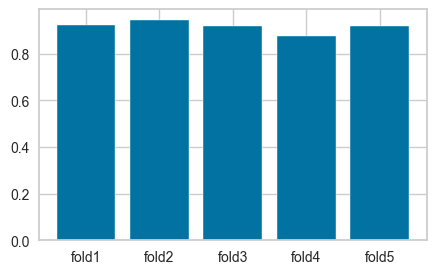

In [505]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , gbr0_results , width=0.8)

In [506]:
metrics_all(gbr0 , X_train , X_test , y_train , y_test )

GradientBoostingRegressor r2_score for train set =  0.9926478725626162
GradientBoostingRegressor r2_score for test set  =  0.6782691030320798
GradientBoostingRegressor MAE      for train set =  1986.8943335100928
GradientBoostingRegressor MAE       for test set =  10955.671893630262
GradientBoostingRegressor MSE      for train set =  11966191.273070432
GradientBoostingRegressor MSE       for test set =  1428328516.3088183


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09


In [507]:
gbr0_comparison = wt_summary(gbr0 , X_train , X_test , y_train , y_test)

<BarContainer object of 89 artists>

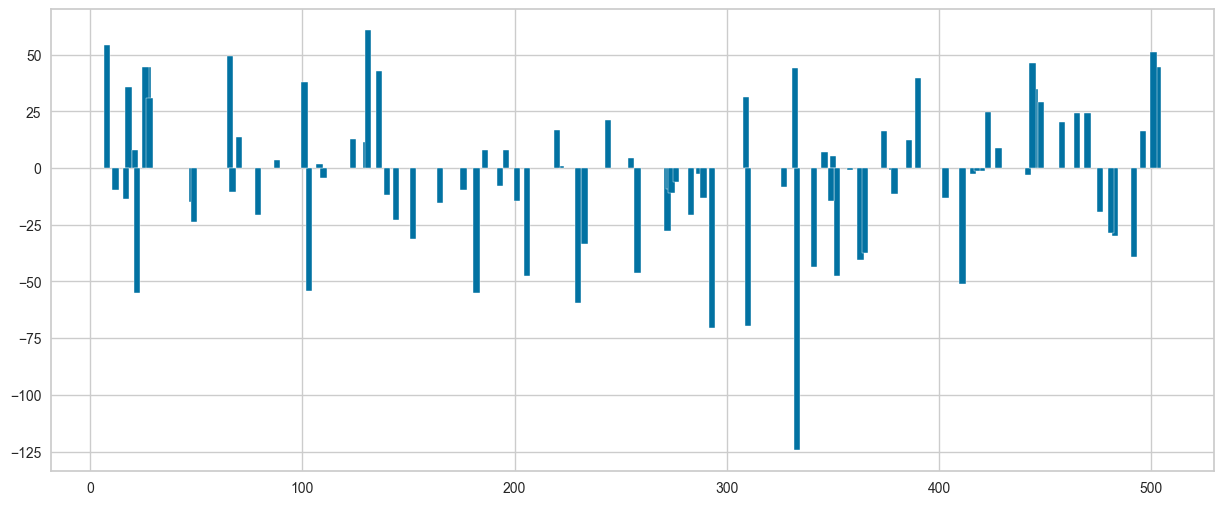

In [508]:
plt.figure(figsize = (15,6))
plt.bar(gbr0_comparison.index,gbr0_comparison['difference %'], width=3)

### <span style = "color:green">4-1 HyperParameter optimization for Gradient Boosting using Optuna</span>

In [509]:
def objective_gbr(trial):
#    loss='ls',
    learning_rate = trial.suggest_float('learning_rate' ,0.01,0.5)
    n_estimators = trial.suggest_int( 'n_estimators' , 50 , 400 )
#    subsample =  trial.suggest_float('subsample',0.01, 1.0)
#    criterion='friedman_mse',
    min_samples_split = trial.suggest_int('min_samples_split',2, 5)
    min_samples_leaf  = trial.suggest_int('min_samples_leaf',1, 3)
#    min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf',0.0,0.5)
    max_depth = trial.suggest_int('max_depth',2,3)
#    min_impurity_decrease=0.0,
#    min_impurity_split=None,
#    init=None,
#    max_features=None,
#    alpha=0.9,
#    verbose=0,
#    max_leaf_nodes = trial.suggest_int('max_leaf_nodes',2,100),
#    warm_start=False,
#    presort='deprecated',
#    validation_fraction=0.1,
#    n_iter_no_change=None,
#    tol=0.0001,
#    ccp_alpha=0.0,
    
    model = GradientBoostingRegressor(learning_rate = learning_rate ,
                                      n_estimators = n_estimators ,
                                      min_samples_split= min_samples_split ,
                                      min_samples_leaf = min_samples_leaf ,
                                      max_depth = max_depth ,
                                      random_state=20 )
    model.fit(X_train, y_train)
    
#    cv_scores = np.exp(np.sqrt((-cross_val_score( model , X1_train , y1_train,scoring='neg_mean_squared_error' , cv=kf ))))
    cv_scores = cross_val_score( model , X_train , y_train,scoring='r2' , cv=kf )
    
    return np.mean(cv_scores)

In [510]:
study_gbr = optuna.create_study(direction='maximize')
study_gbr.optimize(objective_gbr, n_trials=200)

[I 2022-11-07 13:23:57,649] A new study created in memory with name: no-name-435f2a5a-168a-4156-be8e-41f1cf37cee2
[I 2022-11-07 13:23:58,260] Trial 0 finished with value: 0.8945875807740412 and parameters: {'learning_rate': 0.4755652013301334, 'n_estimators': 332, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 2}. Best is trial 0 with value: 0.8945875807740412.
[I 2022-11-07 13:23:58,883] Trial 1 finished with value: 0.9155233046535509 and parameters: {'learning_rate': 0.03472410300638088, 'n_estimators': 254, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 3}. Best is trial 1 with value: 0.9155233046535509.
[I 2022-11-07 13:23:59,617] Trial 2 finished with value: 0.9060839444421032 and parameters: {'learning_rate': 0.14498640466548107, 'n_estimators': 391, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 2}. Best is trial 1 with value: 0.9155233046535509.
[I 2022-11-07 13:24:00,475] Trial 3 finished with value: 0.9097459527036481 and parameters: {'l

[I 2022-11-07 13:24:10,473] Trial 30 finished with value: 0.9204586326753453 and parameters: {'learning_rate': 0.2327192773684932, 'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 30 with value: 0.9204586326753453.
[I 2022-11-07 13:24:10,695] Trial 31 finished with value: 0.9176793007400844 and parameters: {'learning_rate': 0.23473672216588262, 'n_estimators': 76, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 30 with value: 0.9204586326753453.
[I 2022-11-07 13:24:11,004] Trial 32 finished with value: 0.9131183366318405 and parameters: {'learning_rate': 0.23804342807994816, 'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 30 with value: 0.9204586326753453.
[I 2022-11-07 13:24:11,230] Trial 33 finished with value: 0.912588411131223 and parameters: {'learning_rate': 0.16910054097134197, 'n_estimators': 79, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_de

[I 2022-11-07 13:24:25,240] Trial 60 finished with value: 0.9171360606502134 and parameters: {'learning_rate': 0.2952644179145154, 'n_estimators': 313, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 38 with value: 0.9234464178820805.
[I 2022-11-07 13:24:26,193] Trial 61 finished with value: 0.919098810770616 and parameters: {'learning_rate': 0.33209339109710045, 'n_estimators': 396, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 38 with value: 0.9234464178820805.
[I 2022-11-07 13:24:27,149] Trial 62 finished with value: 0.9117529635020348 and parameters: {'learning_rate': 0.31894284976759457, 'n_estimators': 384, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 38 with value: 0.9234464178820805.
[I 2022-11-07 13:24:27,987] Trial 63 finished with value: 0.9153738602524187 and parameters: {'learning_rate': 0.30731144758678003, 'n_estimators': 342, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max

[I 2022-11-07 13:24:37,890] Trial 90 finished with value: 0.9149313828364136 and parameters: {'learning_rate': 0.1748387170702279, 'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 38 with value: 0.9234464178820805.
[I 2022-11-07 13:24:38,057] Trial 91 finished with value: 0.9182985035035347 and parameters: {'learning_rate': 0.2735365553446905, 'n_estimators': 65, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 38 with value: 0.9234464178820805.
[I 2022-11-07 13:24:38,282] Trial 92 finished with value: 0.9172373126621677 and parameters: {'learning_rate': 0.23387426287428376, 'n_estimators': 83, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 38 with value: 0.9234464178820805.
[I 2022-11-07 13:24:38,552] Trial 93 finished with value: 0.9207381367575224 and parameters: {'learning_rate': 0.26055608782622686, 'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_de

[I 2022-11-07 13:24:48,732] Trial 120 finished with value: 0.9186983039283625 and parameters: {'learning_rate': 0.21978952339213004, 'n_estimators': 259, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 105 with value: 0.9254129562799139.
[I 2022-11-07 13:24:49,473] Trial 121 finished with value: 0.9188284953615256 and parameters: {'learning_rate': 0.2828309760812155, 'n_estimators': 291, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 105 with value: 0.9254129562799139.
[I 2022-11-07 13:24:49,899] Trial 122 finished with value: 0.9166440204387698 and parameters: {'learning_rate': 0.25770692095804526, 'n_estimators': 165, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 105 with value: 0.9254129562799139.
[I 2022-11-07 13:24:50,375] Trial 123 finished with value: 0.9180104277110146 and parameters: {'learning_rate': 0.29958822965950094, 'n_estimators': 189, 'min_samples_split': 4, 'min_samples_leaf':

[I 2022-11-07 13:24:57,625] Trial 150 finished with value: 0.918631090051903 and parameters: {'learning_rate': 0.27361445485558433, 'n_estimators': 54, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 3}. Best is trial 139 with value: 0.9276029527677057.
[I 2022-11-07 13:24:57,829] Trial 151 finished with value: 0.9183611971142426 and parameters: {'learning_rate': 0.2816023475230156, 'n_estimators': 77, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 139 with value: 0.9276029527677057.
[I 2022-11-07 13:24:58,073] Trial 152 finished with value: 0.9203851426702725 and parameters: {'learning_rate': 0.27459947312470695, 'n_estimators': 92, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 139 with value: 0.9276029527677057.
[I 2022-11-07 13:24:58,359] Trial 153 finished with value: 0.9149207611687087 and parameters: {'learning_rate': 0.2534886935733543, 'n_estimators': 108, 'min_samples_split': 4, 'min_samples_leaf': 1, '

[I 2022-11-07 13:25:04,654] Trial 180 finished with value: 0.9211824024263289 and parameters: {'learning_rate': 0.2740482074217989, 'n_estimators': 93, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 139 with value: 0.9276029527677057.
[I 2022-11-07 13:25:04,901] Trial 181 finished with value: 0.9201071925330098 and parameters: {'learning_rate': 0.2753466344318328, 'n_estimators': 93, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 139 with value: 0.9276029527677057.
[I 2022-11-07 13:25:05,188] Trial 182 finished with value: 0.9149654940981721 and parameters: {'learning_rate': 0.2650001843210409, 'n_estimators': 105, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 139 with value: 0.9276029527677057.
[I 2022-11-07 13:25:05,439] Trial 183 finished with value: 0.9195664828739976 and parameters: {'learning_rate': 0.2843334066084115, 'n_estimators': 90, 'min_samples_split': 4, 'min_samples_leaf': 1, 'm

In [511]:
study_gbr.best_value

0.9276029527677057

In [512]:
study_gbr.best_params

{'learning_rate': 0.2757350277443475,
 'n_estimators': 85,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [513]:
gbr_best_params = study_gbr.best_params

In [514]:
gbr = GradientBoostingRegressor(**gbr_best_params)

In [515]:
metrics_all(gbr , X_train , X_test , y_train , y_test , tuned = True )

GradientBoostingRegressor r2_score for train set =  0.9973636085353387
GradientBoostingRegressor r2_score for test set  =  0.6955674309647255
GradientBoostingRegressor MAE      for train set =  1045.97724587706
GradientBoostingRegressor MAE       for test set =  10224.978358705663
GradientBoostingRegressor MSE      for train set =  4290943.649373689
GradientBoostingRegressor MSE       for test set =  1351532363.6747034


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09


In [516]:
# default parameters are better performing

In [517]:
gbr = GradientBoostingRegressor()

In [518]:
estimators.append(('Gradient BoostingRegressor',gbr))
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('Gradient BoostingRegressor',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                      

##  <span style = "color:green">CatBoost Regressor </span>

In [519]:
cbr = CatBoostRegressor()

In [520]:
cbr.fit(X_train,y_train)

Learning rate set to 0.033233
0:	learn: 1.1605840	total: 161ms	remaining: 2m 41s
1:	learn: 1.1356443	total: 165ms	remaining: 1m 22s
2:	learn: 1.1146142	total: 168ms	remaining: 55.9s
3:	learn: 1.0886934	total: 169ms	remaining: 42.2s
4:	learn: 1.0687790	total: 170ms	remaining: 33.9s
5:	learn: 1.0500958	total: 171ms	remaining: 28.3s
6:	learn: 1.0269046	total: 172ms	remaining: 24.4s
7:	learn: 1.0056743	total: 173ms	remaining: 21.4s
8:	learn: 0.9826847	total: 173ms	remaining: 19.1s
9:	learn: 0.9628255	total: 174ms	remaining: 17.2s
10:	learn: 0.9428408	total: 175ms	remaining: 15.7s
11:	learn: 0.9252132	total: 176ms	remaining: 14.5s
12:	learn: 0.9082337	total: 177ms	remaining: 13.4s
13:	learn: 0.8901783	total: 177ms	remaining: 12.5s
14:	learn: 0.8738327	total: 178ms	remaining: 11.7s
15:	learn: 0.8570322	total: 179ms	remaining: 11s
16:	learn: 0.8384351	total: 180ms	remaining: 10.4s
17:	learn: 0.8231063	total: 181ms	remaining: 9.87s
18:	learn: 0.8075592	total: 182ms	remaining: 9.38s
19:	learn: 

208:	learn: 0.2083748	total: 331ms	remaining: 1.25s
209:	learn: 0.2074584	total: 332ms	remaining: 1.25s
210:	learn: 0.2067085	total: 334ms	remaining: 1.25s
211:	learn: 0.2061510	total: 335ms	remaining: 1.24s
212:	learn: 0.2054360	total: 336ms	remaining: 1.24s
213:	learn: 0.2050713	total: 337ms	remaining: 1.24s
214:	learn: 0.2047895	total: 337ms	remaining: 1.23s
215:	learn: 0.2040807	total: 338ms	remaining: 1.23s
216:	learn: 0.2035076	total: 339ms	remaining: 1.22s
217:	learn: 0.2029348	total: 340ms	remaining: 1.22s
218:	learn: 0.2025671	total: 340ms	remaining: 1.21s
219:	learn: 0.2019803	total: 341ms	remaining: 1.21s
220:	learn: 0.2016947	total: 342ms	remaining: 1.21s
221:	learn: 0.2011774	total: 343ms	remaining: 1.2s
222:	learn: 0.2004277	total: 343ms	remaining: 1.2s
223:	learn: 0.2001601	total: 344ms	remaining: 1.19s
224:	learn: 0.1996489	total: 345ms	remaining: 1.19s
225:	learn: 0.1988913	total: 346ms	remaining: 1.18s
226:	learn: 0.1985870	total: 346ms	remaining: 1.18s
227:	learn: 0.

398:	learn: 0.1425213	total: 507ms	remaining: 763ms
399:	learn: 0.1421280	total: 508ms	remaining: 762ms
400:	learn: 0.1416594	total: 509ms	remaining: 760ms
401:	learn: 0.1414447	total: 510ms	remaining: 758ms
402:	learn: 0.1411204	total: 510ms	remaining: 756ms
403:	learn: 0.1410811	total: 511ms	remaining: 754ms
404:	learn: 0.1407665	total: 512ms	remaining: 752ms
405:	learn: 0.1407169	total: 513ms	remaining: 750ms
406:	learn: 0.1404677	total: 513ms	remaining: 748ms
407:	learn: 0.1400365	total: 514ms	remaining: 746ms
408:	learn: 0.1399987	total: 515ms	remaining: 744ms
409:	learn: 0.1397682	total: 516ms	remaining: 742ms
410:	learn: 0.1395304	total: 516ms	remaining: 740ms
411:	learn: 0.1394959	total: 517ms	remaining: 738ms
412:	learn: 0.1394621	total: 518ms	remaining: 736ms
413:	learn: 0.1391924	total: 519ms	remaining: 734ms
414:	learn: 0.1389890	total: 519ms	remaining: 732ms
415:	learn: 0.1389501	total: 520ms	remaining: 730ms
416:	learn: 0.1385708	total: 521ms	remaining: 728ms
417:	learn: 

578:	learn: 0.1028866	total: 672ms	remaining: 488ms
579:	learn: 0.1027708	total: 672ms	remaining: 487ms
580:	learn: 0.1027547	total: 673ms	remaining: 486ms
581:	learn: 0.1025558	total: 674ms	remaining: 484ms
582:	learn: 0.1022585	total: 675ms	remaining: 483ms
583:	learn: 0.1020466	total: 676ms	remaining: 481ms
584:	learn: 0.1019219	total: 676ms	remaining: 480ms
585:	learn: 0.1018576	total: 677ms	remaining: 478ms
586:	learn: 0.1014836	total: 678ms	remaining: 477ms
587:	learn: 0.1010880	total: 679ms	remaining: 475ms
588:	learn: 0.1009085	total: 679ms	remaining: 474ms
589:	learn: 0.1008843	total: 680ms	remaining: 473ms
590:	learn: 0.1006536	total: 681ms	remaining: 471ms
591:	learn: 0.1004837	total: 682ms	remaining: 470ms
592:	learn: 0.1002244	total: 682ms	remaining: 468ms
593:	learn: 0.0999806	total: 683ms	remaining: 467ms
594:	learn: 0.0998151	total: 684ms	remaining: 465ms
595:	learn: 0.0995711	total: 685ms	remaining: 464ms
596:	learn: 0.0992444	total: 685ms	remaining: 463ms
597:	learn: 

803:	learn: 0.0730691	total: 844ms	remaining: 206ms
804:	learn: 0.0730178	total: 845ms	remaining: 205ms
805:	learn: 0.0728865	total: 846ms	remaining: 204ms
806:	learn: 0.0727992	total: 847ms	remaining: 203ms
807:	learn: 0.0726735	total: 848ms	remaining: 201ms
808:	learn: 0.0726223	total: 848ms	remaining: 200ms
809:	learn: 0.0726079	total: 849ms	remaining: 199ms
810:	learn: 0.0725571	total: 850ms	remaining: 198ms
811:	learn: 0.0724504	total: 851ms	remaining: 197ms
812:	learn: 0.0723844	total: 851ms	remaining: 196ms
813:	learn: 0.0722477	total: 852ms	remaining: 195ms
814:	learn: 0.0721769	total: 853ms	remaining: 194ms
815:	learn: 0.0721662	total: 854ms	remaining: 192ms
816:	learn: 0.0721524	total: 854ms	remaining: 191ms
817:	learn: 0.0720675	total: 855ms	remaining: 190ms
818:	learn: 0.0720583	total: 856ms	remaining: 189ms
819:	learn: 0.0718868	total: 857ms	remaining: 188ms
820:	learn: 0.0718362	total: 857ms	remaining: 187ms
821:	learn: 0.0717095	total: 858ms	remaining: 186ms
822:	learn: 

In [521]:
cbr_results = cross_val_score(estimator=cbr , X = X_train , y= y_train , scoring='r2'
                              ,cv = kf)

Learning rate set to 0.032067
0:	learn: 1.1532728	total: 1.02ms	remaining: 1.02s
1:	learn: 1.1298622	total: 1.86ms	remaining: 930ms
2:	learn: 1.1071725	total: 2.66ms	remaining: 883ms
3:	learn: 1.0851613	total: 3.5ms	remaining: 870ms
4:	learn: 1.0649053	total: 4.32ms	remaining: 860ms
5:	learn: 1.0459673	total: 5.28ms	remaining: 874ms
6:	learn: 1.0258422	total: 6.14ms	remaining: 872ms
7:	learn: 1.0078572	total: 6.93ms	remaining: 859ms
8:	learn: 0.9885224	total: 7.84ms	remaining: 864ms
9:	learn: 0.9700379	total: 8.7ms	remaining: 861ms
10:	learn: 0.9512504	total: 9.62ms	remaining: 865ms
11:	learn: 0.9308896	total: 10.4ms	remaining: 858ms
12:	learn: 0.9146057	total: 11.3ms	remaining: 859ms
13:	learn: 0.8972253	total: 12.2ms	remaining: 856ms
14:	learn: 0.8808113	total: 13.1ms	remaining: 857ms
15:	learn: 0.8643183	total: 13.9ms	remaining: 858ms
16:	learn: 0.8462524	total: 14.9ms	remaining: 864ms
17:	learn: 0.8304689	total: 15.8ms	remaining: 861ms
18:	learn: 0.8146860	total: 16.7ms	remaining: 

177:	learn: 0.2158800	total: 156ms	remaining: 722ms
178:	learn: 0.2153201	total: 157ms	remaining: 722ms
179:	learn: 0.2142066	total: 158ms	remaining: 721ms
180:	learn: 0.2135314	total: 159ms	remaining: 721ms
181:	learn: 0.2128548	total: 160ms	remaining: 720ms
182:	learn: 0.2118010	total: 161ms	remaining: 720ms
183:	learn: 0.2113291	total: 162ms	remaining: 719ms
184:	learn: 0.2104034	total: 163ms	remaining: 718ms
185:	learn: 0.2099716	total: 164ms	remaining: 717ms
186:	learn: 0.2092866	total: 165ms	remaining: 716ms
187:	learn: 0.2082754	total: 166ms	remaining: 716ms
188:	learn: 0.2078295	total: 167ms	remaining: 715ms
189:	learn: 0.2069161	total: 168ms	remaining: 715ms
190:	learn: 0.2064357	total: 169ms	remaining: 714ms
191:	learn: 0.2055846	total: 169ms	remaining: 713ms
192:	learn: 0.2047875	total: 171ms	remaining: 716ms
193:	learn: 0.2039411	total: 172ms	remaining: 715ms
194:	learn: 0.2031746	total: 173ms	remaining: 715ms
195:	learn: 0.2024335	total: 174ms	remaining: 714ms
196:	learn: 

366:	learn: 0.1311126	total: 329ms	remaining: 568ms
367:	learn: 0.1305365	total: 330ms	remaining: 567ms
368:	learn: 0.1304471	total: 331ms	remaining: 566ms
369:	learn: 0.1304015	total: 332ms	remaining: 565ms
370:	learn: 0.1303568	total: 333ms	remaining: 564ms
371:	learn: 0.1299374	total: 334ms	remaining: 563ms
372:	learn: 0.1295722	total: 335ms	remaining: 563ms
373:	learn: 0.1294864	total: 336ms	remaining: 562ms
374:	learn: 0.1290121	total: 337ms	remaining: 561ms
375:	learn: 0.1288972	total: 338ms	remaining: 560ms
376:	learn: 0.1285952	total: 338ms	remaining: 559ms
377:	learn: 0.1281949	total: 339ms	remaining: 558ms
378:	learn: 0.1279150	total: 340ms	remaining: 557ms
379:	learn: 0.1277547	total: 341ms	remaining: 557ms
380:	learn: 0.1274630	total: 342ms	remaining: 556ms
381:	learn: 0.1272125	total: 343ms	remaining: 555ms
382:	learn: 0.1268145	total: 344ms	remaining: 554ms
383:	learn: 0.1267580	total: 345ms	remaining: 553ms
384:	learn: 0.1266405	total: 346ms	remaining: 552ms
385:	learn: 

540:	learn: 0.0895484	total: 488ms	remaining: 414ms
541:	learn: 0.0892678	total: 489ms	remaining: 413ms
542:	learn: 0.0890450	total: 490ms	remaining: 412ms
543:	learn: 0.0889810	total: 491ms	remaining: 411ms
544:	learn: 0.0888068	total: 492ms	remaining: 411ms
545:	learn: 0.0885107	total: 493ms	remaining: 410ms
546:	learn: 0.0884572	total: 493ms	remaining: 409ms
547:	learn: 0.0882813	total: 494ms	remaining: 408ms
548:	learn: 0.0881133	total: 495ms	remaining: 407ms
549:	learn: 0.0880721	total: 496ms	remaining: 406ms
550:	learn: 0.0879758	total: 497ms	remaining: 405ms
551:	learn: 0.0879530	total: 497ms	remaining: 404ms
552:	learn: 0.0878057	total: 498ms	remaining: 403ms
553:	learn: 0.0875024	total: 499ms	remaining: 402ms
554:	learn: 0.0872311	total: 500ms	remaining: 401ms
555:	learn: 0.0870150	total: 501ms	remaining: 400ms
556:	learn: 0.0866387	total: 502ms	remaining: 399ms
557:	learn: 0.0864684	total: 502ms	remaining: 398ms
558:	learn: 0.0861913	total: 503ms	remaining: 397ms
559:	learn: 

775:	learn: 0.0584709	total: 663ms	remaining: 191ms
776:	learn: 0.0583490	total: 664ms	remaining: 191ms
777:	learn: 0.0582600	total: 665ms	remaining: 190ms
778:	learn: 0.0581907	total: 666ms	remaining: 189ms
779:	learn: 0.0580960	total: 667ms	remaining: 188ms
780:	learn: 0.0580166	total: 667ms	remaining: 187ms
781:	learn: 0.0579291	total: 668ms	remaining: 186ms
782:	learn: 0.0578387	total: 669ms	remaining: 185ms
783:	learn: 0.0576600	total: 670ms	remaining: 184ms
784:	learn: 0.0576018	total: 670ms	remaining: 184ms
785:	learn: 0.0575525	total: 671ms	remaining: 183ms
786:	learn: 0.0575306	total: 672ms	remaining: 182ms
787:	learn: 0.0573608	total: 673ms	remaining: 181ms
788:	learn: 0.0572647	total: 673ms	remaining: 180ms
789:	learn: 0.0571297	total: 674ms	remaining: 179ms
790:	learn: 0.0570093	total: 675ms	remaining: 178ms
791:	learn: 0.0569030	total: 675ms	remaining: 177ms
792:	learn: 0.0567941	total: 676ms	remaining: 177ms
793:	learn: 0.0566933	total: 677ms	remaining: 176ms
794:	learn: 

995:	learn: 0.0417240	total: 827ms	remaining: 3.32ms
996:	learn: 0.0417200	total: 828ms	remaining: 2.49ms
997:	learn: 0.0417054	total: 828ms	remaining: 1.66ms
998:	learn: 0.0416402	total: 829ms	remaining: 830us
999:	learn: 0.0416319	total: 830ms	remaining: 0us
Learning rate set to 0.032067
0:	learn: 1.1316179	total: 1.08ms	remaining: 1.07s
1:	learn: 1.1093896	total: 1.96ms	remaining: 979ms
2:	learn: 1.0886910	total: 2.87ms	remaining: 953ms
3:	learn: 1.0668998	total: 3.6ms	remaining: 897ms
4:	learn: 1.0474009	total: 4.3ms	remaining: 856ms
5:	learn: 1.0268522	total: 5.02ms	remaining: 832ms
6:	learn: 1.0069107	total: 5.7ms	remaining: 809ms
7:	learn: 0.9887332	total: 6.36ms	remaining: 789ms
8:	learn: 0.9678024	total: 7.09ms	remaining: 781ms
9:	learn: 0.9512222	total: 7.82ms	remaining: 774ms
10:	learn: 0.9320727	total: 8.53ms	remaining: 767ms
11:	learn: 0.9129013	total: 9.26ms	remaining: 762ms
12:	learn: 0.8963817	total: 9.99ms	remaining: 759ms
13:	learn: 0.8807032	total: 10.8ms	remaining: 

415:	learn: 0.1380974	total: 274ms	remaining: 385ms
416:	learn: 0.1378978	total: 275ms	remaining: 385ms
417:	learn: 0.1377789	total: 276ms	remaining: 384ms
418:	learn: 0.1375343	total: 276ms	remaining: 383ms
419:	learn: 0.1374847	total: 277ms	remaining: 382ms
420:	learn: 0.1371556	total: 278ms	remaining: 382ms
421:	learn: 0.1370991	total: 278ms	remaining: 381ms
422:	learn: 0.1366240	total: 279ms	remaining: 380ms
423:	learn: 0.1364681	total: 280ms	remaining: 380ms
424:	learn: 0.1363147	total: 280ms	remaining: 379ms
425:	learn: 0.1356391	total: 281ms	remaining: 378ms
426:	learn: 0.1350231	total: 282ms	remaining: 378ms
427:	learn: 0.1343308	total: 282ms	remaining: 377ms
428:	learn: 0.1338133	total: 283ms	remaining: 377ms
429:	learn: 0.1337210	total: 284ms	remaining: 376ms
430:	learn: 0.1332012	total: 284ms	remaining: 375ms
431:	learn: 0.1328173	total: 285ms	remaining: 375ms
432:	learn: 0.1325757	total: 285ms	remaining: 374ms
433:	learn: 0.1323539	total: 286ms	remaining: 373ms
434:	learn: 

664:	learn: 0.0875296	total: 439ms	remaining: 221ms
665:	learn: 0.0875005	total: 440ms	remaining: 220ms
666:	learn: 0.0872520	total: 441ms	remaining: 220ms
667:	learn: 0.0871539	total: 441ms	remaining: 219ms
668:	learn: 0.0870971	total: 442ms	remaining: 219ms
669:	learn: 0.0868664	total: 443ms	remaining: 218ms
670:	learn: 0.0867946	total: 444ms	remaining: 217ms
671:	learn: 0.0865089	total: 444ms	remaining: 217ms
672:	learn: 0.0863290	total: 445ms	remaining: 216ms
673:	learn: 0.0862830	total: 446ms	remaining: 215ms
674:	learn: 0.0861616	total: 446ms	remaining: 215ms
675:	learn: 0.0859498	total: 447ms	remaining: 214ms
676:	learn: 0.0858824	total: 448ms	remaining: 214ms
677:	learn: 0.0857620	total: 448ms	remaining: 213ms
678:	learn: 0.0855677	total: 449ms	remaining: 212ms
679:	learn: 0.0853501	total: 450ms	remaining: 212ms
680:	learn: 0.0851679	total: 451ms	remaining: 211ms
681:	learn: 0.0849778	total: 451ms	remaining: 210ms
682:	learn: 0.0849466	total: 452ms	remaining: 210ms
683:	learn: 

898:	learn: 0.0620572	total: 611ms	remaining: 68.6ms
899:	learn: 0.0619530	total: 611ms	remaining: 67.9ms
900:	learn: 0.0618692	total: 612ms	remaining: 67.3ms
901:	learn: 0.0617803	total: 613ms	remaining: 66.6ms
902:	learn: 0.0616978	total: 614ms	remaining: 65.9ms
903:	learn: 0.0615860	total: 614ms	remaining: 65.2ms
904:	learn: 0.0615385	total: 615ms	remaining: 64.6ms
905:	learn: 0.0614401	total: 616ms	remaining: 63.9ms
906:	learn: 0.0613854	total: 616ms	remaining: 63.2ms
907:	learn: 0.0613664	total: 617ms	remaining: 62.5ms
908:	learn: 0.0612524	total: 618ms	remaining: 61.9ms
909:	learn: 0.0612353	total: 619ms	remaining: 61.2ms
910:	learn: 0.0611562	total: 619ms	remaining: 60.5ms
911:	learn: 0.0610797	total: 620ms	remaining: 59.8ms
912:	learn: 0.0609999	total: 621ms	remaining: 59.2ms
913:	learn: 0.0609245	total: 622ms	remaining: 58.5ms
914:	learn: 0.0608450	total: 622ms	remaining: 57.8ms
915:	learn: 0.0607692	total: 623ms	remaining: 57.1ms
916:	learn: 0.0607126	total: 624ms	remaining: 

302:	learn: 0.1627008	total: 204ms	remaining: 469ms
303:	learn: 0.1623436	total: 204ms	remaining: 468ms
304:	learn: 0.1618647	total: 205ms	remaining: 467ms
305:	learn: 0.1614670	total: 206ms	remaining: 467ms
306:	learn: 0.1612700	total: 207ms	remaining: 466ms
307:	learn: 0.1605432	total: 207ms	remaining: 466ms
308:	learn: 0.1604665	total: 208ms	remaining: 465ms
309:	learn: 0.1603883	total: 209ms	remaining: 464ms
310:	learn: 0.1600458	total: 209ms	remaining: 463ms
311:	learn: 0.1596710	total: 210ms	remaining: 463ms
312:	learn: 0.1590266	total: 210ms	remaining: 462ms
313:	learn: 0.1587893	total: 211ms	remaining: 461ms
314:	learn: 0.1583181	total: 212ms	remaining: 461ms
315:	learn: 0.1578465	total: 212ms	remaining: 460ms
316:	learn: 0.1577502	total: 213ms	remaining: 459ms
317:	learn: 0.1576103	total: 214ms	remaining: 459ms
318:	learn: 0.1575238	total: 214ms	remaining: 458ms
319:	learn: 0.1570719	total: 215ms	remaining: 457ms
320:	learn: 0.1563402	total: 216ms	remaining: 456ms
321:	learn: 

547:	learn: 0.1012023	total: 367ms	remaining: 302ms
548:	learn: 0.1011097	total: 368ms	remaining: 302ms
549:	learn: 0.1008589	total: 368ms	remaining: 301ms
550:	learn: 0.1006068	total: 369ms	remaining: 301ms
551:	learn: 0.1003395	total: 370ms	remaining: 300ms
552:	learn: 0.1003022	total: 370ms	remaining: 299ms
553:	learn: 0.0998529	total: 371ms	remaining: 299ms
554:	learn: 0.0996350	total: 372ms	remaining: 298ms
555:	learn: 0.0993914	total: 373ms	remaining: 298ms
556:	learn: 0.0992338	total: 373ms	remaining: 297ms
557:	learn: 0.0991517	total: 374ms	remaining: 296ms
558:	learn: 0.0989456	total: 375ms	remaining: 296ms
559:	learn: 0.0987115	total: 376ms	remaining: 295ms
560:	learn: 0.0984357	total: 376ms	remaining: 294ms
561:	learn: 0.0984143	total: 377ms	remaining: 294ms
562:	learn: 0.0982810	total: 378ms	remaining: 293ms
563:	learn: 0.0982467	total: 379ms	remaining: 293ms
564:	learn: 0.0981314	total: 379ms	remaining: 292ms
565:	learn: 0.0980748	total: 380ms	remaining: 291ms
566:	learn: 

770:	learn: 0.0725749	total: 535ms	remaining: 159ms
771:	learn: 0.0722597	total: 536ms	remaining: 158ms
772:	learn: 0.0721570	total: 537ms	remaining: 158ms
773:	learn: 0.0721221	total: 538ms	remaining: 157ms
774:	learn: 0.0719105	total: 539ms	remaining: 156ms
775:	learn: 0.0717510	total: 540ms	remaining: 156ms
776:	learn: 0.0716426	total: 540ms	remaining: 155ms
777:	learn: 0.0716255	total: 541ms	remaining: 154ms
778:	learn: 0.0715363	total: 542ms	remaining: 154ms
779:	learn: 0.0715249	total: 543ms	remaining: 153ms
780:	learn: 0.0715093	total: 544ms	remaining: 152ms
781:	learn: 0.0714110	total: 544ms	remaining: 152ms
782:	learn: 0.0712947	total: 545ms	remaining: 151ms
783:	learn: 0.0712004	total: 546ms	remaining: 150ms
784:	learn: 0.0711155	total: 547ms	remaining: 150ms
785:	learn: 0.0709567	total: 548ms	remaining: 149ms
786:	learn: 0.0707522	total: 548ms	remaining: 148ms
787:	learn: 0.0706888	total: 549ms	remaining: 148ms
788:	learn: 0.0705281	total: 550ms	remaining: 147ms
789:	learn: 

999:	learn: 0.0551406	total: 705ms	remaining: 0us
Learning rate set to 0.032091
0:	learn: 1.1776427	total: 25.4ms	remaining: 25.4s
1:	learn: 1.1533133	total: 26.3ms	remaining: 13.1s
2:	learn: 1.1311580	total: 27.3ms	remaining: 9.07s
3:	learn: 1.1063572	total: 28.2ms	remaining: 7.02s
4:	learn: 1.0852974	total: 29ms	remaining: 5.76s
5:	learn: 1.0658354	total: 29.7ms	remaining: 4.92s
6:	learn: 1.0456737	total: 30.4ms	remaining: 4.31s
7:	learn: 1.0253717	total: 31.1ms	remaining: 3.85s
8:	learn: 1.0031845	total: 31.7ms	remaining: 3.49s
9:	learn: 0.9834424	total: 32.4ms	remaining: 3.21s
10:	learn: 0.9631537	total: 33ms	remaining: 2.97s
11:	learn: 0.9430732	total: 33.7ms	remaining: 2.77s
12:	learn: 0.9259668	total: 34.3ms	remaining: 2.61s
13:	learn: 0.9079840	total: 35ms	remaining: 2.47s
14:	learn: 0.8914370	total: 35.7ms	remaining: 2.35s
15:	learn: 0.8739455	total: 36.4ms	remaining: 2.24s
16:	learn: 0.8582908	total: 37ms	remaining: 2.14s
17:	learn: 0.8404849	total: 38.2ms	remaining: 2.08s
18

365:	learn: 0.1425239	total: 273ms	remaining: 472ms
366:	learn: 0.1422808	total: 273ms	remaining: 472ms
367:	learn: 0.1418468	total: 274ms	remaining: 471ms
368:	learn: 0.1417976	total: 275ms	remaining: 470ms
369:	learn: 0.1417432	total: 276ms	remaining: 469ms
370:	learn: 0.1413288	total: 276ms	remaining: 468ms
371:	learn: 0.1412542	total: 277ms	remaining: 467ms
372:	learn: 0.1409286	total: 278ms	remaining: 467ms
373:	learn: 0.1407492	total: 278ms	remaining: 466ms
374:	learn: 0.1404178	total: 279ms	remaining: 465ms
375:	learn: 0.1403687	total: 280ms	remaining: 464ms
376:	learn: 0.1400465	total: 281ms	remaining: 464ms
377:	learn: 0.1397084	total: 281ms	remaining: 463ms
378:	learn: 0.1393064	total: 282ms	remaining: 462ms
379:	learn: 0.1389197	total: 283ms	remaining: 461ms
380:	learn: 0.1383662	total: 283ms	remaining: 460ms
381:	learn: 0.1376873	total: 284ms	remaining: 459ms
382:	learn: 0.1376406	total: 285ms	remaining: 459ms
383:	learn: 0.1371460	total: 286ms	remaining: 458ms
384:	learn: 

618:	learn: 0.0891445	total: 449ms	remaining: 276ms
619:	learn: 0.0889307	total: 449ms	remaining: 275ms
620:	learn: 0.0886857	total: 451ms	remaining: 275ms
621:	learn: 0.0885373	total: 451ms	remaining: 274ms
622:	learn: 0.0883075	total: 452ms	remaining: 274ms
623:	learn: 0.0881570	total: 453ms	remaining: 273ms
624:	learn: 0.0879555	total: 453ms	remaining: 272ms
625:	learn: 0.0878364	total: 454ms	remaining: 271ms
626:	learn: 0.0876124	total: 455ms	remaining: 271ms
627:	learn: 0.0874509	total: 455ms	remaining: 270ms
628:	learn: 0.0873206	total: 456ms	remaining: 269ms
629:	learn: 0.0869901	total: 457ms	remaining: 268ms
630:	learn: 0.0869709	total: 457ms	remaining: 268ms
631:	learn: 0.0869328	total: 458ms	remaining: 267ms
632:	learn: 0.0867900	total: 459ms	remaining: 266ms
633:	learn: 0.0866504	total: 460ms	remaining: 265ms
634:	learn: 0.0866293	total: 460ms	remaining: 265ms
635:	learn: 0.0864228	total: 461ms	remaining: 264ms
636:	learn: 0.0861832	total: 462ms	remaining: 263ms
637:	learn: 

864:	learn: 0.0631125	total: 616ms	remaining: 96.1ms
865:	learn: 0.0630179	total: 617ms	remaining: 95.4ms
866:	learn: 0.0629727	total: 617ms	remaining: 94.7ms
867:	learn: 0.0628879	total: 619ms	remaining: 94.1ms
868:	learn: 0.0628242	total: 619ms	remaining: 93.4ms
869:	learn: 0.0628134	total: 620ms	remaining: 92.6ms
870:	learn: 0.0627180	total: 621ms	remaining: 91.9ms
871:	learn: 0.0626626	total: 621ms	remaining: 91.2ms
872:	learn: 0.0625917	total: 622ms	remaining: 90.5ms
873:	learn: 0.0624908	total: 623ms	remaining: 89.8ms
874:	learn: 0.0623589	total: 623ms	remaining: 89.1ms
875:	learn: 0.0622972	total: 624ms	remaining: 88.3ms
876:	learn: 0.0622157	total: 625ms	remaining: 87.6ms
877:	learn: 0.0621147	total: 626ms	remaining: 86.9ms
878:	learn: 0.0620622	total: 626ms	remaining: 86.2ms
879:	learn: 0.0619780	total: 627ms	remaining: 85.5ms
880:	learn: 0.0619263	total: 628ms	remaining: 84.8ms
881:	learn: 0.0618126	total: 628ms	remaining: 84.1ms
882:	learn: 0.0617694	total: 629ms	remaining: 

252:	learn: 0.1856667	total: 176ms	remaining: 520ms
253:	learn: 0.1854367	total: 177ms	remaining: 519ms
254:	learn: 0.1849995	total: 177ms	remaining: 518ms
255:	learn: 0.1848534	total: 178ms	remaining: 517ms
256:	learn: 0.1840595	total: 179ms	remaining: 517ms
257:	learn: 0.1838304	total: 179ms	remaining: 516ms
258:	learn: 0.1835710	total: 180ms	remaining: 515ms
259:	learn: 0.1827709	total: 181ms	remaining: 514ms
260:	learn: 0.1820229	total: 181ms	remaining: 514ms
261:	learn: 0.1818369	total: 182ms	remaining: 513ms
262:	learn: 0.1813749	total: 183ms	remaining: 512ms
263:	learn: 0.1811579	total: 183ms	remaining: 511ms
264:	learn: 0.1809295	total: 184ms	remaining: 511ms
265:	learn: 0.1805963	total: 185ms	remaining: 510ms
266:	learn: 0.1803824	total: 185ms	remaining: 509ms
267:	learn: 0.1794698	total: 186ms	remaining: 508ms
268:	learn: 0.1792695	total: 187ms	remaining: 507ms
269:	learn: 0.1784180	total: 187ms	remaining: 507ms
270:	learn: 0.1780707	total: 188ms	remaining: 506ms
271:	learn: 

510:	learn: 0.1092552	total: 348ms	remaining: 333ms
511:	learn: 0.1089674	total: 348ms	remaining: 332ms
512:	learn: 0.1086495	total: 349ms	remaining: 331ms
513:	learn: 0.1079889	total: 350ms	remaining: 331ms
514:	learn: 0.1077159	total: 351ms	remaining: 331ms
515:	learn: 0.1076805	total: 352ms	remaining: 330ms
516:	learn: 0.1073152	total: 352ms	remaining: 329ms
517:	learn: 0.1069469	total: 353ms	remaining: 329ms
518:	learn: 0.1066779	total: 354ms	remaining: 328ms
519:	learn: 0.1063198	total: 354ms	remaining: 327ms
520:	learn: 0.1061121	total: 355ms	remaining: 326ms
521:	learn: 0.1057672	total: 356ms	remaining: 326ms
522:	learn: 0.1057300	total: 356ms	remaining: 325ms
523:	learn: 0.1057008	total: 357ms	remaining: 324ms
524:	learn: 0.1053930	total: 358ms	remaining: 324ms
525:	learn: 0.1051759	total: 358ms	remaining: 323ms
526:	learn: 0.1049164	total: 359ms	remaining: 322ms
527:	learn: 0.1046616	total: 360ms	remaining: 322ms
528:	learn: 0.1044064	total: 361ms	remaining: 321ms
529:	learn: 

766:	learn: 0.0610784	total: 518ms	remaining: 157ms
767:	learn: 0.0610134	total: 518ms	remaining: 157ms
768:	learn: 0.0608884	total: 519ms	remaining: 156ms
769:	learn: 0.0608285	total: 520ms	remaining: 155ms
770:	learn: 0.0607049	total: 521ms	remaining: 155ms
771:	learn: 0.0606380	total: 521ms	remaining: 154ms
772:	learn: 0.0604486	total: 522ms	remaining: 153ms
773:	learn: 0.0603667	total: 523ms	remaining: 153ms
774:	learn: 0.0602297	total: 523ms	remaining: 152ms
775:	learn: 0.0601481	total: 524ms	remaining: 151ms
776:	learn: 0.0599863	total: 525ms	remaining: 151ms
777:	learn: 0.0598234	total: 525ms	remaining: 150ms
778:	learn: 0.0597174	total: 526ms	remaining: 149ms
779:	learn: 0.0596397	total: 527ms	remaining: 149ms
780:	learn: 0.0595149	total: 527ms	remaining: 148ms
781:	learn: 0.0593624	total: 528ms	remaining: 147ms
782:	learn: 0.0592633	total: 529ms	remaining: 147ms
783:	learn: 0.0591820	total: 529ms	remaining: 146ms
784:	learn: 0.0590267	total: 530ms	remaining: 145ms
785:	learn: 

In [522]:
cbr_results

array([0.90372906, 0.92796589, 0.91935465, 0.86463795, 0.95174419])

In [523]:
np.mean(cbr_results)

0.9134863493973782

<BarContainer object of 5 artists>

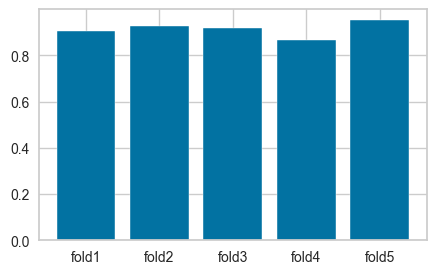

In [524]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , cbr_results , width=0.8)

In [525]:
metrics_all(cbr , X_train , X_test , y_train , y_test )

Learning rate set to 0.033233
0:	learn: 1.1605840	total: 1.14ms	remaining: 1.14s
1:	learn: 1.1356443	total: 2.1ms	remaining: 1.05s
2:	learn: 1.1146142	total: 3.09ms	remaining: 1.03s
3:	learn: 1.0886934	total: 4.12ms	remaining: 1.02s
4:	learn: 1.0687790	total: 4.99ms	remaining: 993ms
5:	learn: 1.0500958	total: 5.89ms	remaining: 976ms
6:	learn: 1.0269046	total: 6.72ms	remaining: 954ms
7:	learn: 1.0056743	total: 7.49ms	remaining: 929ms
8:	learn: 0.9826847	total: 7.83ms	remaining: 863ms
9:	learn: 0.9628255	total: 8.59ms	remaining: 850ms
10:	learn: 0.9428408	total: 9.35ms	remaining: 841ms
11:	learn: 0.9252132	total: 10.1ms	remaining: 831ms
12:	learn: 0.9082337	total: 10.9ms	remaining: 824ms
13:	learn: 0.8901783	total: 11.7ms	remaining: 823ms
14:	learn: 0.8738327	total: 12.4ms	remaining: 816ms
15:	learn: 0.8570322	total: 13.2ms	remaining: 812ms
16:	learn: 0.8384351	total: 14ms	remaining: 809ms
17:	learn: 0.8231063	total: 14.7ms	remaining: 803ms
18:	learn: 0.8075592	total: 15.5ms	remaining: 7

224:	learn: 0.1996489	total: 170ms	remaining: 587ms
225:	learn: 0.1988913	total: 171ms	remaining: 586ms
226:	learn: 0.1985870	total: 172ms	remaining: 585ms
227:	learn: 0.1983424	total: 173ms	remaining: 584ms
228:	learn: 0.1979087	total: 173ms	remaining: 583ms
229:	learn: 0.1971094	total: 174ms	remaining: 583ms
230:	learn: 0.1963238	total: 175ms	remaining: 582ms
231:	learn: 0.1961605	total: 176ms	remaining: 581ms
232:	learn: 0.1958095	total: 176ms	remaining: 580ms
233:	learn: 0.1955913	total: 177ms	remaining: 580ms
234:	learn: 0.1947712	total: 178ms	remaining: 579ms
235:	learn: 0.1945634	total: 179ms	remaining: 578ms
236:	learn: 0.1943056	total: 179ms	remaining: 577ms
237:	learn: 0.1941188	total: 180ms	remaining: 576ms
238:	learn: 0.1934155	total: 181ms	remaining: 576ms
239:	learn: 0.1932406	total: 182ms	remaining: 575ms
240:	learn: 0.1923575	total: 182ms	remaining: 574ms
241:	learn: 0.1918370	total: 183ms	remaining: 573ms
242:	learn: 0.1913952	total: 184ms	remaining: 572ms
243:	learn: 

456:	learn: 0.1288849	total: 342ms	remaining: 406ms
457:	learn: 0.1287463	total: 343ms	remaining: 406ms
458:	learn: 0.1284638	total: 344ms	remaining: 405ms
459:	learn: 0.1284295	total: 344ms	remaining: 404ms
460:	learn: 0.1282510	total: 345ms	remaining: 404ms
461:	learn: 0.1279515	total: 346ms	remaining: 403ms
462:	learn: 0.1279178	total: 347ms	remaining: 402ms
463:	learn: 0.1273161	total: 347ms	remaining: 401ms
464:	learn: 0.1271098	total: 348ms	remaining: 401ms
465:	learn: 0.1269404	total: 349ms	remaining: 400ms
466:	learn: 0.1266104	total: 350ms	remaining: 399ms
467:	learn: 0.1259555	total: 350ms	remaining: 398ms
468:	learn: 0.1256156	total: 351ms	remaining: 398ms
469:	learn: 0.1255852	total: 352ms	remaining: 397ms
470:	learn: 0.1251963	total: 353ms	remaining: 396ms
471:	learn: 0.1251487	total: 354ms	remaining: 395ms
472:	learn: 0.1250831	total: 354ms	remaining: 395ms
473:	learn: 0.1247448	total: 355ms	remaining: 394ms
474:	learn: 0.1243861	total: 356ms	remaining: 393ms
475:	learn: 

686:	learn: 0.0857209	total: 515ms	remaining: 234ms
687:	learn: 0.0856116	total: 515ms	remaining: 234ms
688:	learn: 0.0855671	total: 516ms	remaining: 233ms
689:	learn: 0.0855084	total: 517ms	remaining: 232ms
690:	learn: 0.0853951	total: 518ms	remaining: 232ms
691:	learn: 0.0852597	total: 518ms	remaining: 231ms
692:	learn: 0.0852457	total: 519ms	remaining: 230ms
693:	learn: 0.0850454	total: 520ms	remaining: 229ms
694:	learn: 0.0850337	total: 521ms	remaining: 228ms
695:	learn: 0.0849620	total: 521ms	remaining: 228ms
696:	learn: 0.0848467	total: 522ms	remaining: 227ms
697:	learn: 0.0847339	total: 523ms	remaining: 226ms
698:	learn: 0.0845610	total: 524ms	remaining: 225ms
699:	learn: 0.0843921	total: 524ms	remaining: 225ms
700:	learn: 0.0842246	total: 525ms	remaining: 224ms
701:	learn: 0.0840470	total: 526ms	remaining: 223ms
702:	learn: 0.0839802	total: 527ms	remaining: 222ms
703:	learn: 0.0838732	total: 527ms	remaining: 222ms
704:	learn: 0.0837684	total: 528ms	remaining: 221ms
705:	learn: 

908:	learn: 0.0644120	total: 686ms	remaining: 68.6ms
909:	learn: 0.0643521	total: 686ms	remaining: 67.9ms
910:	learn: 0.0642821	total: 687ms	remaining: 67.1ms
911:	learn: 0.0641742	total: 688ms	remaining: 66.4ms
912:	learn: 0.0640583	total: 689ms	remaining: 65.6ms
913:	learn: 0.0639653	total: 690ms	remaining: 64.9ms
914:	learn: 0.0639209	total: 690ms	remaining: 64.1ms
915:	learn: 0.0637944	total: 691ms	remaining: 63.4ms
916:	learn: 0.0637170	total: 692ms	remaining: 62.6ms
917:	learn: 0.0635495	total: 693ms	remaining: 61.9ms
918:	learn: 0.0635044	total: 694ms	remaining: 61.1ms
919:	learn: 0.0634230	total: 694ms	remaining: 60.4ms
920:	learn: 0.0633103	total: 695ms	remaining: 59.6ms
921:	learn: 0.0632664	total: 696ms	remaining: 58.9ms
922:	learn: 0.0632577	total: 697ms	remaining: 58.1ms
923:	learn: 0.0631553	total: 697ms	remaining: 57.4ms
924:	learn: 0.0631140	total: 698ms	remaining: 56.6ms
925:	learn: 0.0630448	total: 699ms	remaining: 55.9ms
926:	learn: 0.0629464	total: 700ms	remaining: 

,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09


In [526]:
cbr_comparison = wt_summary(cbr , X_train , X_test , y_train , y_test)

Learning rate set to 0.033233
0:	learn: 1.1605840	total: 1.28ms	remaining: 1.28s
1:	learn: 1.1356443	total: 2.18ms	remaining: 1.08s
2:	learn: 1.1146142	total: 2.96ms	remaining: 984ms
3:	learn: 1.0886934	total: 4.06ms	remaining: 1.01s
4:	learn: 1.0687790	total: 5.01ms	remaining: 997ms
5:	learn: 1.0500958	total: 5.77ms	remaining: 956ms
6:	learn: 1.0269046	total: 6.52ms	remaining: 925ms
7:	learn: 1.0056743	total: 7.25ms	remaining: 898ms
8:	learn: 0.9826847	total: 7.54ms	remaining: 830ms
9:	learn: 0.9628255	total: 8.28ms	remaining: 820ms
10:	learn: 0.9428408	total: 9ms	remaining: 809ms
11:	learn: 0.9252132	total: 9.74ms	remaining: 802ms
12:	learn: 0.9082337	total: 10.5ms	remaining: 795ms
13:	learn: 0.8901783	total: 11.2ms	remaining: 791ms
14:	learn: 0.8738327	total: 12.1ms	remaining: 794ms
15:	learn: 0.8570322	total: 12.9ms	remaining: 791ms
16:	learn: 0.8384351	total: 13.6ms	remaining: 788ms
17:	learn: 0.8231063	total: 14.4ms	remaining: 785ms
18:	learn: 0.8075592	total: 15.2ms	remaining: 7

212:	learn: 0.2054360	total: 160ms	remaining: 590ms
213:	learn: 0.2050713	total: 160ms	remaining: 589ms
214:	learn: 0.2047895	total: 161ms	remaining: 589ms
215:	learn: 0.2040807	total: 162ms	remaining: 588ms
216:	learn: 0.2035076	total: 163ms	remaining: 587ms
217:	learn: 0.2029348	total: 164ms	remaining: 587ms
218:	learn: 0.2025671	total: 164ms	remaining: 586ms
219:	learn: 0.2019803	total: 165ms	remaining: 585ms
220:	learn: 0.2016947	total: 166ms	remaining: 584ms
221:	learn: 0.2011774	total: 166ms	remaining: 583ms
222:	learn: 0.2004277	total: 167ms	remaining: 583ms
223:	learn: 0.2001601	total: 168ms	remaining: 582ms
224:	learn: 0.1996489	total: 169ms	remaining: 581ms
225:	learn: 0.1988913	total: 169ms	remaining: 580ms
226:	learn: 0.1985870	total: 170ms	remaining: 580ms
227:	learn: 0.1983424	total: 171ms	remaining: 579ms
228:	learn: 0.1979087	total: 172ms	remaining: 578ms
229:	learn: 0.1971094	total: 173ms	remaining: 578ms
230:	learn: 0.1963238	total: 173ms	remaining: 577ms
231:	learn: 

442:	learn: 0.1314894	total: 334ms	remaining: 420ms
443:	learn: 0.1313261	total: 335ms	remaining: 419ms
444:	learn: 0.1311909	total: 336ms	remaining: 419ms
445:	learn: 0.1308460	total: 336ms	remaining: 418ms
446:	learn: 0.1306339	total: 337ms	remaining: 417ms
447:	learn: 0.1303550	total: 338ms	remaining: 416ms
448:	learn: 0.1300924	total: 338ms	remaining: 415ms
449:	learn: 0.1300628	total: 339ms	remaining: 415ms
450:	learn: 0.1300337	total: 340ms	remaining: 414ms
451:	learn: 0.1297819	total: 341ms	remaining: 413ms
452:	learn: 0.1296347	total: 341ms	remaining: 412ms
453:	learn: 0.1293956	total: 342ms	remaining: 412ms
454:	learn: 0.1291862	total: 343ms	remaining: 411ms
455:	learn: 0.1290211	total: 344ms	remaining: 410ms
456:	learn: 0.1288849	total: 344ms	remaining: 409ms
457:	learn: 0.1287463	total: 345ms	remaining: 408ms
458:	learn: 0.1284638	total: 346ms	remaining: 408ms
459:	learn: 0.1284295	total: 347ms	remaining: 407ms
460:	learn: 0.1282510	total: 347ms	remaining: 406ms
461:	learn: 

653:	learn: 0.0902592	total: 502ms	remaining: 266ms
654:	learn: 0.0902412	total: 503ms	remaining: 265ms
655:	learn: 0.0900116	total: 503ms	remaining: 264ms
656:	learn: 0.0898421	total: 504ms	remaining: 263ms
657:	learn: 0.0896507	total: 505ms	remaining: 263ms
658:	learn: 0.0894290	total: 506ms	remaining: 262ms
659:	learn: 0.0894146	total: 507ms	remaining: 261ms
660:	learn: 0.0891978	total: 507ms	remaining: 260ms
661:	learn: 0.0891768	total: 508ms	remaining: 259ms
662:	learn: 0.0889798	total: 509ms	remaining: 259ms
663:	learn: 0.0888720	total: 510ms	remaining: 258ms
664:	learn: 0.0887066	total: 511ms	remaining: 257ms
665:	learn: 0.0886111	total: 511ms	remaining: 256ms
666:	learn: 0.0883999	total: 512ms	remaining: 256ms
667:	learn: 0.0882536	total: 513ms	remaining: 255ms
668:	learn: 0.0881342	total: 514ms	remaining: 254ms
669:	learn: 0.0878756	total: 515ms	remaining: 254ms
670:	learn: 0.0877872	total: 516ms	remaining: 253ms
671:	learn: 0.0876658	total: 517ms	remaining: 252ms
672:	learn: 

878:	learn: 0.0667842	total: 673ms	remaining: 92.6ms
879:	learn: 0.0667129	total: 674ms	remaining: 91.9ms
880:	learn: 0.0666593	total: 675ms	remaining: 91.2ms
881:	learn: 0.0666489	total: 676ms	remaining: 90.4ms
882:	learn: 0.0666406	total: 677ms	remaining: 89.6ms
883:	learn: 0.0666029	total: 677ms	remaining: 88.9ms
884:	learn: 0.0665656	total: 678ms	remaining: 88.1ms
885:	learn: 0.0663770	total: 679ms	remaining: 87.3ms
886:	learn: 0.0663186	total: 680ms	remaining: 86.6ms
887:	learn: 0.0662030	total: 680ms	remaining: 85.8ms
888:	learn: 0.0661460	total: 681ms	remaining: 85ms
889:	learn: 0.0660578	total: 682ms	remaining: 84.3ms
890:	learn: 0.0659393	total: 683ms	remaining: 83.5ms
891:	learn: 0.0658275	total: 683ms	remaining: 82.7ms
892:	learn: 0.0657739	total: 684ms	remaining: 82ms
893:	learn: 0.0656376	total: 685ms	remaining: 81.2ms
894:	learn: 0.0654834	total: 686ms	remaining: 80.4ms
895:	learn: 0.0654288	total: 686ms	remaining: 79.7ms
896:	learn: 0.0653122	total: 687ms	remaining: 78.9

<BarContainer object of 89 artists>

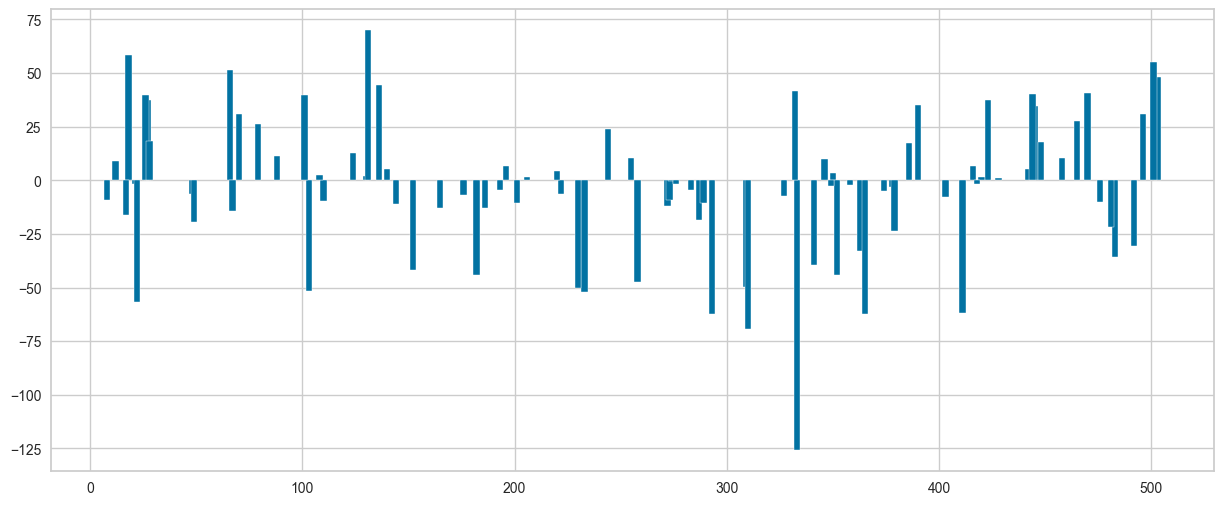

In [527]:
plt.figure(figsize = (15,6))
plt.bar(cbr_comparison.index,cbr_comparison['difference %'], width=3)

### <span style="color:green" >No hyper parameter optimizatoin for catboost shall be done due to the very high cost </span>

### <span style="color:green" >5-1: hyper parameter optimizatoin for catboost using Optuna </span>

In [528]:
#-def objective_cb(trial):
#-    iterations    = trial.suggest_int( 'iterations' , 50 , 3000 ) 
#-    learning_rate = trial.suggest_float('learning_rate' , 0.001 , 0.01 )
#-    depth         = trial.suggest_int( 'depth' , 4 , 15 ) 
#-    l2_leaf_reg   = trial.suggest_int('l2_leaf_reg' , 2 , 10 ) 
#    model_size_reg=None,
#    rsm=None,
#    loss_function='RMSE',
#    border_count=None,
#    feature_border_type=None,
#    per_float_feature_quantization=None,
#    input_borders=None,
#    output_borders=None,
#    fold_permutation_block=None,
#    od_pval=None,
#    od_wait=None,
#    od_type=None,
#    nan_mode=None,
#    counter_calc_method=None,
#    leaf_estimation_iterations=None,
#    leaf_estimation_method=None,
#    thread_count=None,
#    random_seed=None,
#    use_best_model=None,
#    best_model_min_trees=None,
#    verbose=None,
#    silent=None,
#    logging_level=None,
#    metric_period=None,
#    ctr_leaf_count_limit=None,
#    store_all_simple_ctr=None,
#    max_ctr_complexity=None,
#    has_time=None,
#    allow_const_label=None,
#    target_border=None,
#    one_hot_max_size=None,
#-    random_strength = trial.suggest_float( 'random_strength' , 0 , 10 ) 
#    name=None,
#    ignored_features=None,
#    train_dir=None,
#    custom_metric=None,
#    eval_metric=None,
#    bagging_temperature=None,
#    save_snapshot=None,
#    snapshot_file=None,
#    snapshot_interval=None,
#    fold_len_multiplier=None,
#    used_ram_limit=None,
#    gpu_ram_part=None,
#    pinned_memory_size=None,
#    allow_writing_files=None,
#    final_ctr_computation_mode=None,
#    approx_on_full_history=None,
#    boosting_type=None,
#    simple_ctr=None,
#    combinations_ctr=None,
#    per_feature_ctr=None,
#    ctr_description=None,
#    ctr_target_border_count=None,
#    task_type=None,
#    device_config=None,
#    devices=None,
#    bootstrap_type=None,
#    subsample=None,
#    mvs_reg=None,
#    sampling_frequency=None,
#    sampling_unit=None,
#    dev_score_calc_obj_block_size=None,
#    dev_efb_max_buckets=None,
#    sparse_features_conflict_fraction=None,
#    max_depth=None,
#    n_estimators=None,
#    num_boost_round=None,
#    num_trees=None,
#    colsample_bylevel=None,
#    random_state=None,
#    reg_lambda=None,
#    objective=None,
#    eta=None,
#    max_bin=None,
#    gpu_cat_features_storage=None,
#    data_partition=None,
#    metadata=None,
#    early_stopping_rounds=None,
#    cat_features=None,
#    grow_policy=None,
#    min_data_in_leaf=None,
#    min_child_samples=None,
#    max_leaves=None,
#    num_leaves=None,
#    score_function=None,
#    leaf_estimation_backtracking=None,
#    ctr_history_unit=None,
#    monotone_constraints=None,
#    feature_weights=None,
#    penalties_coefficient=None,
#    first_feature_use_penalties=None,
#    per_object_feature_penalties=None,
#    model_shrink_rate=None,
#    model_shrink_mode=None,
#    langevin=None,
#    diffusion_temperature=None,
#    posterior_sampling=None,
#    boost_from_average=None,
#-    model = CatBoostRegressor(
#-        iterations     = iterations     ,
#-        learning_rate  = learning_rate  ,
#-        depth          = depth          ,
#-        l2_leaf_reg    = l2_leaf_reg    ,
#-        random_strength =random_strength
#-    )
#-    model.fit(X1_1_train,y1_1_train)
#- 
#-    cv_scores = np.exp(np.sqrt((-cross_val_score( model , X1_1_train , y1_1_train , scoring='neg_mean_squared_error' , cv=kf ))))
#-    
#-    return np.mean(cv_scores)

In [529]:
#study_cb = optuna.create_study( direction = 'minimize' )
#study_cb.optimize( objective_cb , n_trials = 3 )

In [530]:
#study_cb.best_value

In [531]:
#-np.square(np.log(study_cb.best_value))

In [532]:
#study_cb.best_params

In [533]:
#cb01_best_params_op = study_cb.best_params

In [534]:
#cb01_nmse_op = -np.square(np.log(study_cb.best_value))

In [535]:
#cb01_best_params = cb01_best_params_gs

In [536]:
#cb01_nmse = cb01_nmse_gs

In [537]:
#cb_01 = CatBoostRegressor(**cb01_best_params)

In [538]:
estimators.append(('CatBoostRegressor',cbr))
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('Gradient BoostingRegressor',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                      

##  <span style = "color:green">ExtraTrees Regressor </span>

In [539]:
etr0 = ExtraTreesRegressor()

In [540]:
etr0.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [541]:
etr0_results = cross_val_score(estimator=etr0 , X = X_train , y= y_train , scoring='r2'
                              ,cv = kf)

In [542]:
etr0_results

array([0.92435268, 0.92248254, 0.91804012, 0.87445234, 0.91658827])

In [543]:
np.mean(etr0_results)

0.9111831922954421

<BarContainer object of 5 artists>

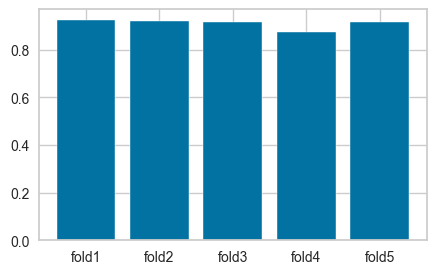

In [544]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , etr0_results , width=0.8)

In [545]:
metrics_all( etr0 , X_train , X_test , y_train , y_test )

ExtraTreesRegressor r2_score for train set =  0.9986152024399774
ExtraTreesRegressor r2_score for test set  =  0.7458283221877144
ExtraTreesRegressor MAE      for train set =  207.91781555866842
ExtraTreesRegressor MAE       for test set =  9746.244903417897
ExtraTreesRegressor MSE      for train set =  2253871.769612333
ExtraTreesRegressor MSE       for test set =  1128398481.0869553


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [546]:
etr0_comparison = wt_summary( etr0 , X_train , X_test , y_train , y_test)

<BarContainer object of 89 artists>

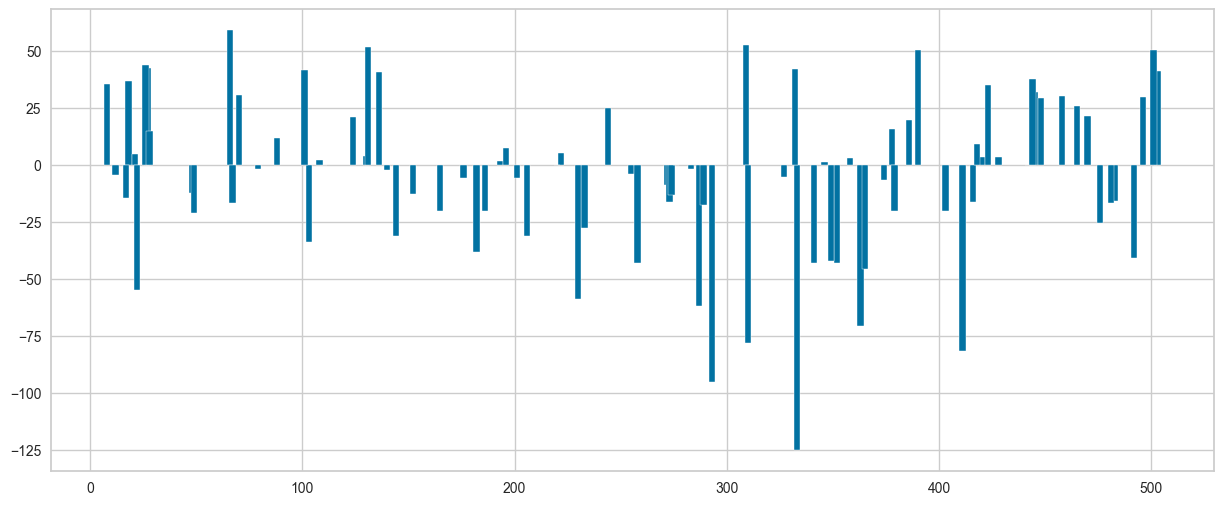

In [547]:
plt.figure(figsize = (15,6))
plt.bar(etr0_comparison.index,etr0_comparison['difference %'], width=3)

### <span style = "color:green">HyperParameter optimization for ExtraTree Regressor using Optuna</span>

In [548]:
def objective_etr(trial):
#    loss='ls',
#    learning_rate = trial.suggest_float('learning_rate' ,0.01,0.5)
    n_estimators = trial.suggest_int( 'n_estimators' , 50 , 400 )
#    subsample =  trial.suggest_float('subsample',0.01, 1.0)
#    criterion='friedman_mse',
    min_samples_split = trial.suggest_int('min_samples_split',2, 5)
    min_samples_leaf  = trial.suggest_int('min_samples_leaf',1, 3)
#    min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf',0.0,0.5)
    max_depth = trial.suggest_int('max_depth',2,3)
#    min_impurity_decrease=0.0,
#    min_impurity_split=None,
#    init=None,
#    max_features=None,
#    alpha=0.9,
#    verbose=0,
#    max_leaf_nodes = trial.suggest_int('max_leaf_nodes',2,100),
#    warm_start=False,
#    presort='deprecated',
#    validation_fraction=0.1,
#    n_iter_no_change=None,
#    tol=0.0001,
#    ccp_alpha=0.0,
    
    model = ExtraTreesRegressor(          n_estimators = n_estimators ,
                                      min_samples_split= min_samples_split ,
                                      min_samples_leaf = min_samples_leaf ,
                                      max_depth = max_depth ,
                                      random_state=20 )
    model.fit(X_train, y_train)
    
#    cv_scores = np.exp(np.sqrt((-cross_val_score( model , X1_train , y1_train,scoring='neg_mean_squared_error' , cv=kf ))))
    cv_scores = cross_val_score( model , X_train , y_train,scoring='r2' , cv=kf )
    
    return np.mean(cv_scores)

In [549]:
study_etr = optuna.create_study(direction='maximize')
study_etr.optimize(objective_etr, n_trials=100)

[I 2022-11-07 13:25:18,492] A new study created in memory with name: no-name-e189e771-6e0d-4887-af4d-1f8dd7c28928
[I 2022-11-07 13:25:19,096] Trial 0 finished with value: 0.8049931546013231 and parameters: {'n_estimators': 205, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 2}. Best is trial 0 with value: 0.8049931546013231.
[I 2022-11-07 13:25:19,721] Trial 1 finished with value: 0.8661511528754893 and parameters: {'n_estimators': 213, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 3}. Best is trial 1 with value: 0.8661511528754893.
[I 2022-11-07 13:25:20,782] Trial 2 finished with value: 0.798075911723836 and parameters: {'n_estimators': 399, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 2}. Best is trial 1 with value: 0.8661511528754893.
[I 2022-11-07 13:25:21,576] Trial 3 finished with value: 0.875956764915397 and parameters: {'n_estimators': 264, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 3 with value: 0.87

[I 2022-11-07 13:25:40,769] Trial 34 finished with value: 0.8771829467349616 and parameters: {'n_estimators': 207, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 31 with value: 0.877530945178092.
[I 2022-11-07 13:25:41,173] Trial 35 finished with value: 0.8741171750981003 and parameters: {'n_estimators': 139, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 31 with value: 0.877530945178092.
[I 2022-11-07 13:25:41,658] Trial 36 finished with value: 0.87489811673773 and parameters: {'n_estimators': 164, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 31 with value: 0.877530945178092.
[I 2022-11-07 13:25:42,235] Trial 37 finished with value: 0.8776049933365272 and parameters: {'n_estimators': 199, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 37 with value: 0.8776049933365272.
[I 2022-11-07 13:25:42,915] Trial 38 finished with value: 0.8665639102066987 and parameters: 

[I 2022-11-07 13:26:01,435] Trial 69 finished with value: 0.8763839846843515 and parameters: {'n_estimators': 230, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 41 with value: 0.8777757411925261.
[I 2022-11-07 13:26:01,960] Trial 70 finished with value: 0.8757500289743645 and parameters: {'n_estimators': 175, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 41 with value: 0.8777757411925261.
[I 2022-11-07 13:26:02,558] Trial 71 finished with value: 0.8771094034151143 and parameters: {'n_estimators': 204, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 41 with value: 0.8777757411925261.
[I 2022-11-07 13:26:03,119] Trial 72 finished with value: 0.877530945178092 and parameters: {'n_estimators': 193, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3}. Best is trial 41 with value: 0.8777757411925261.
[I 2022-11-07 13:26:03,762] Trial 73 finished with value: 0.8766118002550533 and paramete

In [550]:
study_etr.best_value

0.8777757411925261

In [551]:
etr_best_params = study_etr.best_params

In [552]:
etr = ExtraTreesRegressor(**etr_best_params)

In [553]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=3, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=3, min_weight_fraction_leaf=0.0,
                    n_estimators=194, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [554]:
metrics_all(etr , X_train , X_test , y_train , y_test , tuned=True)

ExtraTreesRegressor r2_score for train set =  0.64668604594123
ExtraTreesRegressor r2_score for test set  =  0.4534652817926047
ExtraTreesRegressor MAE      for train set =  8079.763780596366
ExtraTreesRegressor MAE       for test set =  13252.493196202246
ExtraTreesRegressor MSE      for train set =  575047479.7559451
ExtraTreesRegressor MSE       for test set =  2426348014.8326063


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [555]:
etr = ExtraTreesRegressor()

In [556]:
estimators.append(('ExtraTreesRegressor',etr))
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('Gradient BoostingRegressor',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                      

##  <span style = "color:green">OrthogonalMatching Pursuit </span>

In [557]:
omp0 = OrthogonalMatchingPursuit()

In [558]:
omp0.fit(X_train,y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [559]:
omp0_results = cross_val_score(estimator=omp0 , X = X_train , y= y_train , scoring='r2' ,cv = kf)

In [560]:
omp0_results

array([0.91621513, 0.92837248, 0.89996362, 0.91254847, 0.93527179])

In [561]:
np.mean(omp0_results)

0.9184742982784139

<BarContainer object of 5 artists>

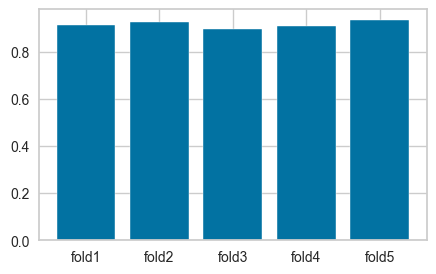

In [562]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , omp0_results , width=0.8)

In [563]:
metrics_all( omp0 , X_train , X_test , y_train , y_test )

OrthogonalMatchingPursuit r2_score for train set =  0.8630779761422616
OrthogonalMatchingPursuit r2_score for test set  =  0.8827930416841954
OrthogonalMatchingPursuit MAE      for train set =  6576.899053555414
OrthogonalMatchingPursuit MAE       for test set =  8897.855483987496
OrthogonalMatchingPursuit MSE      for train set =  222851839.95132807
OrthogonalMatchingPursuit MSE       for test set =  520341821.22388804


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [564]:
omp0_comparison = wt_summary( omp0 , X_train , X_test , y_train , y_test)

<BarContainer object of 89 artists>

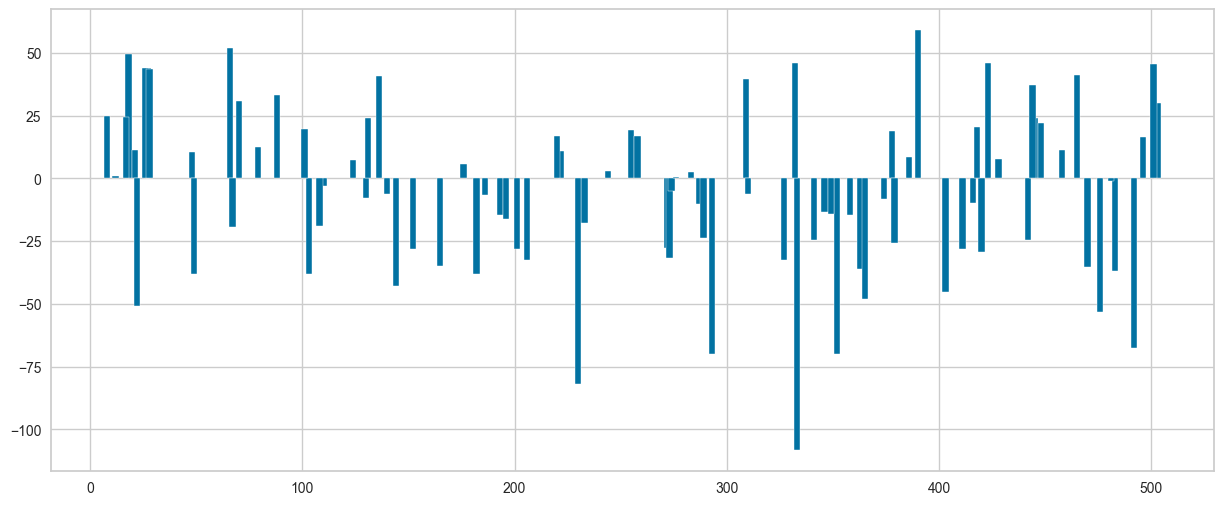

In [565]:
plt.figure(figsize = (15,6))
plt.bar( omp0_comparison.index,omp0_comparison['difference %'], width=3)

### <span style = "color:green">HyperParameter optimization for OMP Regressor using Optuna</span>

In [566]:
def objective_omp(trial):
    n_nonzero_coefs=trial.suggest_int('n_nonzero_coefs' , 0 , 50)
    tol = trial.suggest_loguniform('tol', 1e-8, 1.0)
    
    model = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs , tol = tol)
    model.fit(X_train, y_train)
    
#    cv_scores = np.exp(np.sqrt((-cross_val_score( model , X1_train , y1_train,scoring='neg_mean_squared_error' , cv=kf ))))
    cv_scores = cross_val_score( model , X_train , y_train , scoring='r2' , cv=kf )
    
    return np.mean(cv_scores)

In [567]:
study_omp = optuna.create_study(direction='maximize')
study_omp.optimize(objective_omp, n_trials=100)

[I 2022-11-07 13:26:18,800] A new study created in memory with name: no-name-9a78faf3-e50c-402f-81eb-9fe1648a7ca3
[I 2022-11-07 13:26:18,822] Trial 0 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 31, 'tol': 0.2458731733048779}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:18,844] Trial 1 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 11, 'tol': 0.03696446349613288}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:18,867] Trial 2 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 35, 'tol': 0.00040170404363540715}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:18,888] Trial 3 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 29, 'tol': 0.15263454291228545}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:18,908] Trial 4 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 

[I 2022-11-07 13:26:19,726] Trial 39 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 44, 'tol': 4.960939410397043e-05}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:19,749] Trial 40 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 28, 'tol': 1.9667433448635038e-07}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:19,772] Trial 41 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 46, 'tol': 0.00012571183513351947}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:19,796] Trial 42 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 42, 'tol': 0.004304217229873928}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:19,820] Trial 43 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 41, 'tol': 3.012436381668953e-08}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26

[I 2022-11-07 13:26:20,666] Trial 79 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 22, 'tol': 9.712043336528424e-08}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:20,690] Trial 80 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 21, 'tol': 1.904780376016235e-05}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:20,713] Trial 81 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 14, 'tol': 0.0001758183149921363}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:20,736] Trial 82 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 24, 'tol': 0.32455151968532187}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:20,760] Trial 83 finished with value: 0.9324954580899567 and parameters: {'n_nonzero_coefs': 29, 'tol': 0.00027401226345190284}. Best is trial 0 with value: 0.9324954580899567.
[I 2022-11-07 13:26:2

In [568]:
study_omp.best_value

0.9324954580899567

In [569]:
study_omp.best_params

{'n_nonzero_coefs': 31, 'tol': 0.2458731733048779}

In [570]:
omp_best_params = study_omp.best_params

In [571]:
omp = OrthogonalMatchingPursuit(**omp_best_params)

In [572]:
metrics_all(omp , X_train , X_test , y_train , y_test , tuned = True)

OrthogonalMatchingPursuit r2_score for train set =  0.9453171860002885
OrthogonalMatchingPursuit r2_score for test set  =  0.9542022080267845
OrthogonalMatchingPursuit MAE      for train set =  4829.397277648291
OrthogonalMatchingPursuit MAE       for test set =  6646.3909800223655
OrthogonalMatchingPursuit MSE      for train set =  89000771.17040965
OrthogonalMatchingPursuit MSE       for test set =  203319895.216173


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [573]:
estimators.append(('OrthogonalMatchingPursuit',omp))
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('Gradient BoostingRegressor',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                      

##  <span style = "color:green">Random Forrest Regressor </span>

In [574]:
rf0 = RandomForestRegressor()

In [575]:
rf0.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [576]:
rf0_results = cross_val_score(rf0 , X_train,y_train,scoring='r2')

In [577]:
rf0_results

array([0.92869654, 0.92360822, 0.91872136, 0.85438475, 0.91494062])

In [578]:
np.mean(rf0_results)

0.9080702975564886

<BarContainer object of 5 artists>

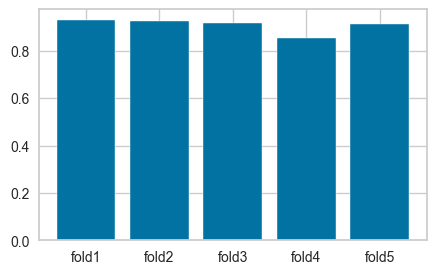

In [579]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , rf0_results , width=0.8)

In [580]:
metrics_all(rf0,X_train,X_test,y_train,y_test)

RandomForestRegressor r2_score for train set =  0.9567984943132476
RandomForestRegressor r2_score for test set  =  0.5900524805865388
RandomForestRegressor MAE      for train set =  2657.9593350487685
RandomForestRegressor MAE       for test set =  11217.26238915404
RandomForestRegressor MSE      for train set =  70313998.87109113
RandomForestRegressor MSE       for test set =  1819967363.0558822


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [581]:
rf0_comparison = wt_summary( rf0 , X_train , X_test , y_train , y_test)

In [582]:
rf0_comparison.head()

,actual weight,predicted weight,difference %
272,13679.8084,16241.459176,-18.73
222,14358.7520,13137.983657,8.50
411,986.9024,1781.120467,-80.48
176,57904.4387,56395.472107,2.61
496,3100.8883,2487.608723,19.78


<BarContainer object of 89 artists>

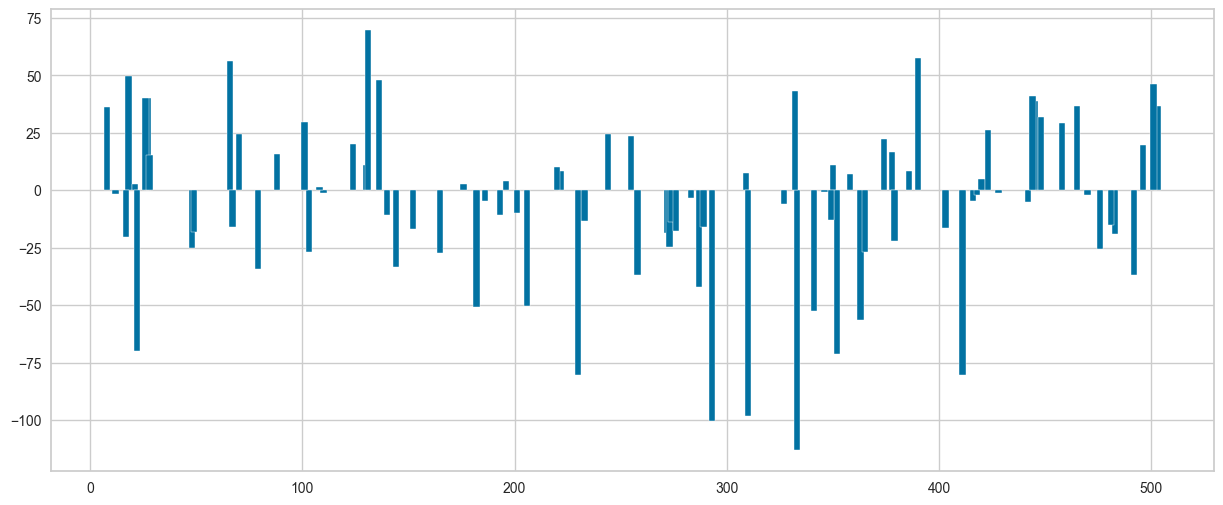

In [583]:
plt.figure(figsize = (15,6))
plt.bar( rf0_comparison.index,rf0_comparison['difference %'], width=3)

### <span style = "color:green">HyperParameter optimization for RandomForrest Regressor using Optuna</span>

In [584]:
def objective_rf(trial):
    max_depth = trial.suggest_int("max_depth", 2, 5)
    n_estimators = trial.suggest_int( "n_estimators" , 10, 200)
    max_features = trial.suggest_int( "max_features" , 1 ,  17 )
    min_samples_split = trial.suggest_int(  "min_samples_split" , 2 , 11)
    min_samples_leaf = trial.suggest_int("min_samples_leaf" , 1 , 11 )
    bootstrap = trial.suggest_categorical(  "bootstrap" , [True , False] )
    model = RandomForestRegressor(
            max_depth = max_depth,
            n_estimators =  n_estimators ,
            max_features =  max_features ,
            min_samples_split =   min_samples_split ,
            min_samples_leaf = min_samples_leaf ,
            bootstrap =   bootstrap 
                        )
    model.fit(X_train,y_train)
    
#    cv_scores = np.exp(np.sqrt((-cross_val_score( model , X1_train , y1_train,scoring='neg_mean_squared_error' , cv=kf ))))
    cv_scores = cross_val_score( model , X_train , y_train , scoring='r2' , cv=kf )
    
    return np.mean(cv_scores)

In [585]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100)

[I 2022-11-07 13:26:22,844] A new study created in memory with name: no-name-628e22d8-4bc1-4e79-962c-1beb448cea44
[I 2022-11-07 13:26:23,420] Trial 0 finished with value: 0.8874495094224061 and parameters: {'max_depth': 3, 'n_estimators': 123, 'max_features': 13, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.8874495094224061.
[I 2022-11-07 13:26:23,738] Trial 1 finished with value: 0.7931796955703583 and parameters: {'max_depth': 2, 'n_estimators': 79, 'max_features': 6, 'min_samples_split': 8, 'min_samples_leaf': 7, 'bootstrap': True}. Best is trial 0 with value: 0.8874495094224061.
[I 2022-11-07 13:26:24,414] Trial 2 finished with value: 0.7885724477203834 and parameters: {'max_depth': 3, 'n_estimators': 171, 'max_features': 3, 'min_samples_split': 10, 'min_samples_leaf': 11, 'bootstrap': True}. Best is trial 0 with value: 0.8874495094224061.
[I 2022-11-07 13:26:25,097] Trial 3 finished with value: 0.8375609193744985 and parameters: 

[I 2022-11-07 13:26:33,505] Trial 29 finished with value: 0.900034934004632 and parameters: {'max_depth': 5, 'n_estimators': 36, 'max_features': 7, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 29 with value: 0.900034934004632.
[I 2022-11-07 13:26:33,651] Trial 30 finished with value: 0.8943940903075465 and parameters: {'max_depth': 5, 'n_estimators': 34, 'max_features': 6, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 29 with value: 0.900034934004632.
[I 2022-11-07 13:26:33,832] Trial 31 finished with value: 0.897803938700007 and parameters: {'max_depth': 5, 'n_estimators': 40, 'max_features': 8, 'min_samples_split': 5, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 29 with value: 0.900034934004632.
[I 2022-11-07 13:26:33,968] Trial 32 finished with value: 0.8934671605057997 and parameters: {'max_depth': 5, 'n_estimators': 27, 'max_features': 8, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap'

[I 2022-11-07 13:26:43,602] Trial 59 finished with value: 0.9012980589186865 and parameters: {'max_depth': 5, 'n_estimators': 82, 'max_features': 12, 'min_samples_split': 10, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 50 with value: 0.903668761662078.
[I 2022-11-07 13:26:44,219] Trial 60 finished with value: 0.9033160670647492 and parameters: {'max_depth': 5, 'n_estimators': 135, 'max_features': 11, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 50 with value: 0.903668761662078.
[I 2022-11-07 13:26:44,831] Trial 61 finished with value: 0.9033701659002125 and parameters: {'max_depth': 5, 'n_estimators': 136, 'max_features': 11, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 50 with value: 0.903668761662078.
[I 2022-11-07 13:26:45,533] Trial 62 finished with value: 0.9023614313206071 and parameters: {'max_depth': 5, 'n_estimators': 141, 'max_features': 13, 'min_samples_split': 9, 'min_samples_leaf': 1, '

[I 2022-11-07 13:27:05,002] Trial 89 finished with value: 0.9056313590121732 and parameters: {'max_depth': 5, 'n_estimators': 183, 'max_features': 13, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 87 with value: 0.9077203958911879.
[I 2022-11-07 13:27:06,008] Trial 90 finished with value: 0.9033549767771849 and parameters: {'max_depth': 5, 'n_estimators': 186, 'max_features': 13, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 87 with value: 0.9077203958911879.
[I 2022-11-07 13:27:06,894] Trial 91 finished with value: 0.9070788812840362 and parameters: {'max_depth': 5, 'n_estimators': 167, 'max_features': 14, 'min_samples_split': 6, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 87 with value: 0.9077203958911879.
[I 2022-11-07 13:27:07,956] Trial 92 finished with value: 0.9066450560684084 and parameters: {'max_depth': 5, 'n_estimators': 200, 'max_features': 14, 'min_samples_split': 6, 'min_samples_leaf': 2, '

In [586]:
study_rf.best_value

0.9079931063223852

In [587]:
study_rf.best_params

{'max_depth': 5,
 'n_estimators': 198,
 'max_features': 16,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'bootstrap': True}

In [588]:
rf_best_params = study_rf.best_params

In [589]:
rf = RandomForestRegressor(**rf_best_params)

In [590]:
metrics_all(rf , X_train , X_test , y_train , y_test , tuned=True)

RandomForestRegressor r2_score for train set =  0.8777482573974805
RandomForestRegressor r2_score for test set  =  0.5502324580525252
RandomForestRegressor MAE      for train set =  4438.289676927403
RandomForestRegressor MAE       for test set =  11873.098464406363
RandomForestRegressor MSE      for train set =  198974752.2614337
RandomForestRegressor MSE       for test set =  1996748872.8250935


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [591]:
rf = RandomForestRegressor()

In [592]:
estimators.append(('RandomForestRegressor',rf))
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('Gradient BoostingRegressor',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                      

##  <span style = "color:green">AdaBoosting Regressor </span>

In [593]:
ada0 = AdaBoostRegressor()

In [594]:
ada0.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [595]:
ada0_results = cross_val_score(ada0 , X_train, y_train, scoring='r2')

In [596]:
ada0_results

array([0.90780074, 0.89779863, 0.91392602, 0.84027007, 0.91065466])

In [597]:
np.mean(ada0_results)

0.8940900250061226

<BarContainer object of 5 artists>

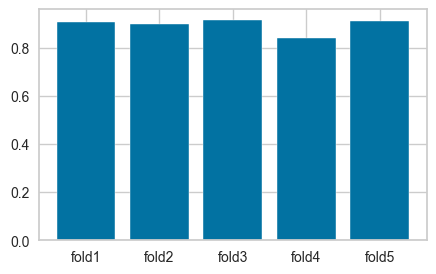

In [598]:
plt.figure(figsize = (5,3))
plt.bar(['fold1','fold2','fold3','fold4','fold5'] , ada0_results , width=0.8)

In [599]:
metrics_all(ada0,X_train,X_test,y_train,y_test)

AdaBoostRegressor r2_score for train set =  0.8934981894335926
AdaBoostRegressor r2_score for test set  =  0.6569035580176492
AdaBoostRegressor MAE      for train set =  5681.906387709353
AdaBoostRegressor MAE       for test set =  10857.425532657142
AdaBoostRegressor MSE      for train set =  173340444.2482632
AdaBoostRegressor MSE       for test set =  1523181132.2626846


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [600]:
ada0_comparison = wt_summary( ada0 , X_train , X_test , y_train , y_test)

In [601]:
ada0_comparison.head()

,actual weight,predicted weight,difference %
272,13679.8084,16457.549486,-20.31
222,14358.7520,14517.150482,-1.10
411,986.9024,1806.526409,-83.05
176,57904.4387,53742.631252,7.19
496,3100.8883,2503.812637,19.25


<BarContainer object of 89 artists>

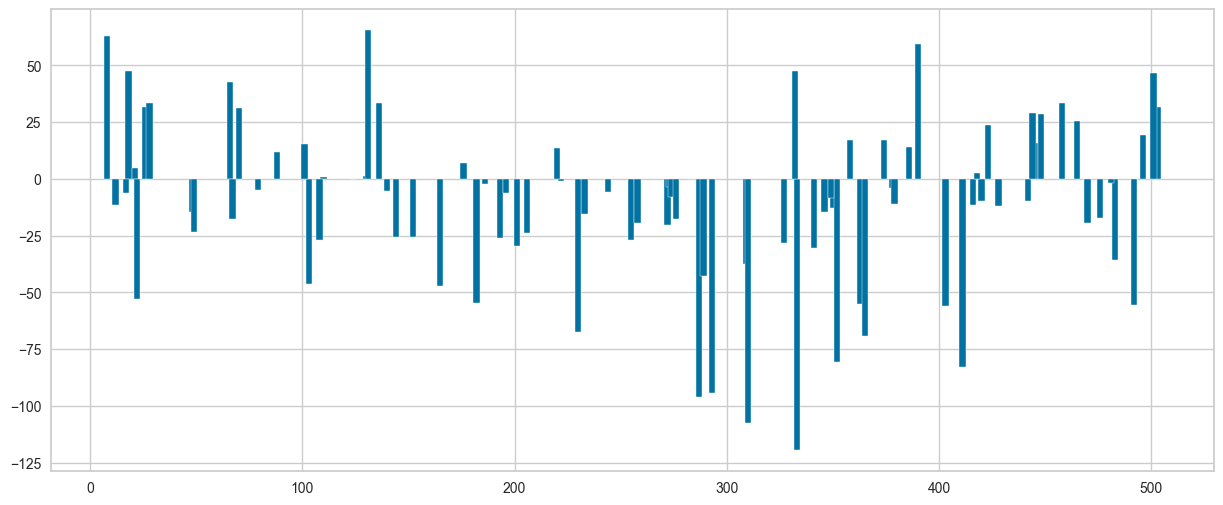

In [602]:
plt.figure(figsize = (15,6))
plt.bar( ada0_comparison.index,ada0_comparison['difference %'], width=3)

### <span style = "color:green">HyperParameter optimization for AdaBoost Regressor using Optuna</span>

In [603]:
def objective_ada(trial):
    
    n_estimators = trial.suggest_int( "n_estimators" , 10, 400)
    learning_rate = trial.suggest_float('learning_rate' ,0.001,10)    
    
    model = AdaBoostRegressor(n_estimators = n_estimators  , learning_rate = learning_rate)
    model.fit(X_train, y_train)
    
#    cv_scores = np.exp(np.sqrt((-cross_val_score( model , X1_train , y1_train,scoring='neg_mean_squared_error' , cv=kf ))))
    cv_scores = cross_val_score( model , X_train , y_train , scoring='r2' , cv=kf )
    
    return np.mean(cv_scores)

In [604]:
study_ada = optuna.create_study(direction='maximize')
study_ada.optimize(objective_ada, n_trials=200)

[I 2022-11-07 13:27:16,463] A new study created in memory with name: no-name-eb288c90-8122-41e1-bf51-9e2c6cc4edc8
[I 2022-11-07 13:27:17,971] Trial 0 finished with value: -5.252327994218641 and parameters: {'n_estimators': 394, 'learning_rate': 9.99574166638039}. Best is trial 0 with value: -5.252327994218641.
[I 2022-11-07 13:27:18,749] Trial 1 finished with value: 0.8947895570954056 and parameters: {'n_estimators': 146, 'learning_rate': 0.6346324665875038}. Best is trial 1 with value: 0.8947895570954056.
[I 2022-11-07 13:27:20,046] Trial 2 finished with value: 0.5592568087506 and parameters: {'n_estimators': 345, 'learning_rate': 3.2940971215087114}. Best is trial 1 with value: 0.8947895570954056.
[I 2022-11-07 13:27:21,310] Trial 3 finished with value: 0.34017989497154205 and parameters: {'n_estimators': 346, 'learning_rate': 4.295474135781873}. Best is trial 1 with value: 0.8947895570954056.
[I 2022-11-07 13:27:22,251] Trial 4 finished with value: -0.9675436610294967 and parameters

[I 2022-11-07 13:27:53,876] Trial 38 finished with value: -0.7254239523523579 and parameters: {'n_estimators': 226, 'learning_rate': 6.411132880121269}. Best is trial 25 with value: 0.9003714602433337.
[I 2022-11-07 13:27:54,376] Trial 39 finished with value: 0.8937820419608912 and parameters: {'n_estimators': 92, 'learning_rate': 0.5172490697550538}. Best is trial 25 with value: 0.9003714602433337.
[I 2022-11-07 13:27:55,086] Trial 40 finished with value: 0.8978623023041059 and parameters: {'n_estimators': 146, 'learning_rate': 2.2956573267305336}. Best is trial 25 with value: 0.9003714602433337.
[I 2022-11-07 13:27:55,930] Trial 41 finished with value: 0.8972759239751593 and parameters: {'n_estimators': 169, 'learning_rate': 2.218086704412988}. Best is trial 25 with value: 0.9003714602433337.
[I 2022-11-07 13:27:56,606] Trial 42 finished with value: 0.8130461036830974 and parameters: {'n_estimators': 180, 'learning_rate': 3.137996853219581}. Best is trial 25 with value: 0.90037146024

[I 2022-11-07 13:28:31,083] Trial 77 finished with value: 0.600641525297385 and parameters: {'n_estimators': 330, 'learning_rate': 4.16699496933771}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:28:31,572] Trial 78 finished with value: 0.8950516600317429 and parameters: {'n_estimators': 92, 'learning_rate': 0.9093917941366398}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:28:32,350] Trial 79 finished with value: 0.8561946584542757 and parameters: {'n_estimators': 203, 'learning_rate': 3.2210649020542137}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:28:33,611] Trial 80 finished with value: 0.8978191438332397 and parameters: {'n_estimators': 283, 'learning_rate': 2.752406206360779}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:28:34,334] Trial 81 finished with value: 0.8970638336932174 and parameters: {'n_estimators': 139, 'learning_rate': 1.6270073364673592}. Best is trial 60 with value: 0.902304811099853.


[I 2022-11-07 13:29:00,407] Trial 116 finished with value: 0.896676986812506 and parameters: {'n_estimators': 99, 'learning_rate': 2.4906835785048775}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:29:01,054] Trial 117 finished with value: 0.8970710275797054 and parameters: {'n_estimators': 125, 'learning_rate': 1.4297538346705734}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:29:01,631] Trial 118 finished with value: 0.843285786670237 and parameters: {'n_estimators': 147, 'learning_rate': 3.046889092513568}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:29:02,147] Trial 119 finished with value: 0.8803557261645716 and parameters: {'n_estimators': 111, 'learning_rate': 2.7949883592524483}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:29:02,739] Trial 120 finished with value: 0.8966415085335246 and parameters: {'n_estimators': 118, 'learning_rate': 2.02923223769724}. Best is trial 60 with value: 0.9023048110998

[I 2022-11-07 13:29:40,547] Trial 155 finished with value: 0.9019412026334906 and parameters: {'n_estimators': 308, 'learning_rate': 2.2690606852584168}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:29:41,788] Trial 156 finished with value: 0.7937039381832706 and parameters: {'n_estimators': 305, 'learning_rate': 2.824424205310872}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:29:43,347] Trial 157 finished with value: 0.8972427549547701 and parameters: {'n_estimators': 310, 'learning_rate': 2.4259852638174246}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:29:44,940] Trial 158 finished with value: 0.9009285760135066 and parameters: {'n_estimators': 323, 'learning_rate': 2.576848799608052}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:29:46,342] Trial 159 finished with value: 0.89887470521742 and parameters: {'n_estimators': 289, 'learning_rate': 2.604355464611861}. Best is trial 60 with value: 0.902304811099

[I 2022-11-07 13:30:38,852] Trial 194 finished with value: 0.8984711061470051 and parameters: {'n_estimators': 105, 'learning_rate': 2.531028489704193}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:30:39,355] Trial 195 finished with value: 0.8967257445554416 and parameters: {'n_estimators': 97, 'learning_rate': 2.050208521909756}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:30:39,902] Trial 196 finished with value: 0.8953558855968806 and parameters: {'n_estimators': 110, 'learning_rate': 2.3643232042834392}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:30:40,387] Trial 197 finished with value: 0.9008901912386389 and parameters: {'n_estimators': 103, 'learning_rate': 2.7247859478606737}. Best is trial 60 with value: 0.902304811099853.
[I 2022-11-07 13:30:40,809] Trial 198 finished with value: 0.8841641586232182 and parameters: {'n_estimators': 90, 'learning_rate': 2.749497382428026}. Best is trial 60 with value: 0.902304811099

In [605]:
study_ada.best_value

0.902304811099853

In [606]:
study_ada.best_params

{'n_estimators': 302, 'learning_rate': 2.49828189778052}

In [607]:
ada_best_params = study_ada.best_params

In [608]:
ada = AdaBoostRegressor(**ada_best_params)

In [609]:
metrics_all(ada , X_train , X_test , y_train , y_test ,tuned = True)

AdaBoostRegressor r2_score for train set =  0.9125220959909768
AdaBoostRegressor r2_score for test set  =  0.6057159789980519
AdaBoostRegressor MAE      for train set =  5487.249148025542
AdaBoostRegressor MAE       for test set =  11376.949949544589
AdaBoostRegressor MSE      for train set =  142377473.79304963
AdaBoostRegressor MSE       for test set =  1750429057.4185698


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [610]:
estimators.append(('AdaBoostRegressor',ada))
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('Gradient BoostingRegressor',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                      

## Ensembling the above 4best performog models using voting regressor

In [611]:
models = []
for n in estimators:
    models.append(n[0])

In [612]:
models

['LinearRegression',
 'BayesianRidge',
 'Ridge',
 'Gradient BoostingRegressor',
 'CatBoostRegressor',
 'ExtraTreesRegressor',
 'OrthogonalMatchingPursuit',
 'RandomForestRegressor',
 'AdaBoostRegressor']

In [613]:
# we are going to consider LR, BR, RR, OMP

In [614]:
from sklearn.ensemble import VotingRegressor

In [615]:
estimators.pop(-2)

('RandomForestRegressor',
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False))

In [616]:
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('Gradient BoostingRegressor',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                      

In [617]:
len(estimators)

8

In [618]:
estimators.pop()

('AdaBoostRegressor',
 AdaBoostRegressor(base_estimator=None, learning_rate=2.49828189778052,
                   loss='linear', n_estimators=302, random_state=None))

In [619]:
estimators.pop(-2)

('ExtraTreesRegressor',
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False))

In [620]:
estimators.pop(-2)

('CatBoostRegressor', <catboost.core.CatBoostRegressor at 0x2063682b308>)

In [621]:
estimators.pop(-2)

('Gradient BoostingRegressor',
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False))

In [622]:
len(estimators)

4

In [623]:
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('OrthogonalMatchingPursuit',
  OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=31,
                            normalize=True, precompute='auto',
                            tol=0.2458731733048779))]

In [624]:
vr  = VotingRegressor(estimators)

In [625]:
scores_01 = cross_val_score(vr,X = X_train, y  = y_train,cv = kf , scoring = 'r2')

In [626]:
scores_01

array([0.93064941, 0.94975843, 0.91127191, 0.92344087, 0.95227228])

In [627]:
np.mean(scores_01)

0.933478581121315

In [628]:
metrics_all(vr,X_train,X_test,y_train,y_test)

VotingRegressor r2_score for train set =  0.9421305302672325
VotingRegressor r2_score for test set  =  0.9278839236398282
VotingRegressor MAE      for train set =  4896.794415724123
VotingRegressor MAE       for test set =  7091.219721158931
VotingRegressor MSE      for train set =  94187315.11268161
VotingRegressor MSE       for test set =  320160262.2573371


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


### Performing Grid search for hyperparameter tuning for ensemble model best results using Optuna

In [629]:
def objective_vr(trial):
    lr_w = trial.suggest_float('lr_w', 0 ,1)
    br_w = trial.suggest_float('br_w',0,1)
    rr_w = trial.suggest_float('rr_w',0,1)
    omp_w = trial.suggest_float('omp_w',0,1)
    
    vr_01  = VotingRegressor(estimators , weights = ( lr_w , br_w , rr_w , omp_w ) )
    
    vr_01.fit(X_train,y_train) 
    
    cv_scores = cross_val_score( vr_01 , X_train , y_train , scoring='r2' , cv=kf )

    return np.mean(cv_scores) 

In [630]:
study_vr = optuna.create_study(direction = 'maximize')
study_vr.optimize( objective_vr , n_trials = 200 )

[I 2022-11-07 13:30:42,018] A new study created in memory with name: no-name-9eeee40f-3ad6-4483-ace2-ec2f2a7abc00
[I 2022-11-07 13:30:42,070] Trial 0 finished with value: 0.9335321738182559 and parameters: {'lr_w': 0.7545417333194574, 'br_w': 0.6162466925847851, 'rr_w': 0.8767925176432477, 'omp_w': 0.5229207033073594}. Best is trial 0 with value: 0.9335321738182559.
[I 2022-11-07 13:30:42,120] Trial 1 finished with value: 0.9335720802875022 and parameters: {'lr_w': 0.918649867440905, 'br_w': 0.9901556989973377, 'rr_w': 0.6474853461532781, 'omp_w': 0.3257602457826272}. Best is trial 1 with value: 0.9335720802875022.
[I 2022-11-07 13:30:42,170] Trial 2 finished with value: 0.9336738832667916 and parameters: {'lr_w': 0.3110150305813104, 'br_w': 0.35167971282262445, 'rr_w': 0.6375770990072614, 'omp_w': 0.2116919147753371}. Best is trial 2 with value: 0.9336738832667916.
[I 2022-11-07 13:30:42,217] Trial 3 finished with value: 0.9338846326845485 and parameters: {'lr_w': 0.042512606741387016

[I 2022-11-07 13:30:43,614] Trial 30 finished with value: 0.9336044517915557 and parameters: {'lr_w': 0.4052583108062858, 'br_w': 0.6294954157673627, 'rr_w': 0.6824346891541336, 'omp_w': 0.48962634124694265}. Best is trial 11 with value: 0.9338965448816055.
[I 2022-11-07 13:30:43,668] Trial 31 finished with value: 0.9338648962212341 and parameters: {'lr_w': 0.03591441075108686, 'br_w': 0.3199071714885618, 'rr_w': 0.5449035411817098, 'omp_w': 0.09172259384251326}. Best is trial 11 with value: 0.9338965448816055.
[I 2022-11-07 13:30:43,722] Trial 32 finished with value: 0.9338290286225384 and parameters: {'lr_w': 0.03716340206177943, 'br_w': 0.5145383110932749, 'rr_w': 0.45373584237326964, 'omp_w': 0.17402752786633785}. Best is trial 11 with value: 0.9338965448816055.
[I 2022-11-07 13:30:43,775] Trial 33 finished with value: 0.9338281963469928 and parameters: {'lr_w': 0.13779100050443294, 'br_w': 0.3102671033025496, 'rr_w': 0.6812030460497166, 'omp_w': 0.08106975391122684}. Best is trial

[I 2022-11-07 13:30:45,234] Trial 61 finished with value: 0.9339053041907972 and parameters: {'lr_w': 0.04061934992919245, 'br_w': 0.7002880457945192, 'rr_w': 0.4213243843472703, 'omp_w': 0.02295412072819748}. Best is trial 53 with value: 0.9339153746189396.
[I 2022-11-07 13:30:45,288] Trial 62 finished with value: 0.9339027033292904 and parameters: {'lr_w': 0.03519412486158209, 'br_w': 0.7210787625507042, 'rr_w': 0.38501238013429645, 'omp_w': 0.033549963564502856}. Best is trial 53 with value: 0.9339153746189396.
[I 2022-11-07 13:30:45,340] Trial 63 finished with value: 0.9338922936372616 and parameters: {'lr_w': 0.06777175803437749, 'br_w': 0.7602897216361364, 'rr_w': 0.42330609471996855, 'omp_w': 0.03404725499134123}. Best is trial 53 with value: 0.9339153746189396.
[I 2022-11-07 13:30:45,393] Trial 64 finished with value: 0.9338663454829643 and parameters: {'lr_w': 0.02783789884176193, 'br_w': 0.6932593951797946, 'rr_w': 0.3172199552140189, 'omp_w': 0.11485718788244038}. Best is tr

[I 2022-11-07 13:30:46,858] Trial 92 finished with value: 0.9339122418794388 and parameters: {'lr_w': 0.023021313942483013, 'br_w': 0.9680435758447028, 'rr_w': 0.307834512167742, 'omp_w': 0.023546334622512648}. Best is trial 69 with value: 0.9339268211749692.
[I 2022-11-07 13:30:46,910] Trial 93 finished with value: 0.9339072725271803 and parameters: {'lr_w': 0.043730783056580645, 'br_w': 0.9606435917871204, 'rr_w': 0.36206185966666316, 'omp_w': 0.021861964034534057}. Best is trial 69 with value: 0.9339268211749692.
[I 2022-11-07 13:30:46,963] Trial 94 finished with value: 0.9338648368921364 and parameters: {'lr_w': 0.08177282270290497, 'br_w': 0.9170727273876194, 'rr_w': 0.3038774644761545, 'omp_w': 0.0935648845906919}. Best is trial 69 with value: 0.9339268211749692.
[I 2022-11-07 13:30:47,014] Trial 95 finished with value: 0.9339180645425014 and parameters: {'lr_w': 0.024863371761726455, 'br_w': 0.969829043438755, 'rr_w': 0.25992632861172227, 'omp_w': 0.00046725650601664643}. Best i

[I 2022-11-07 13:30:48,439] Trial 122 finished with value: 0.9339046600006629 and parameters: {'lr_w': 0.0595002226780312, 'br_w': 0.8592191604197359, 'rr_w': 0.563475857081984, 'omp_w': 0.023929099960630727}. Best is trial 69 with value: 0.9339268211749692.
[I 2022-11-07 13:30:48,492] Trial 123 finished with value: 0.9339015018278596 and parameters: {'lr_w': 0.024485277383488126, 'br_w': 0.926820778731398, 'rr_w': 0.5500398611242826, 'omp_w': 0.0721838587205372}. Best is trial 69 with value: 0.9339268211749692.
[I 2022-11-07 13:30:48,544] Trial 124 finished with value: 0.9339154316439833 and parameters: {'lr_w': 0.0023905708679574263, 'br_w': 0.8829776596116923, 'rr_w': 0.6001190377502857, 'omp_w': 0.0465727040474244}. Best is trial 69 with value: 0.9339268211749692.
[I 2022-11-07 13:30:48,597] Trial 125 finished with value: 0.9338157524147068 and parameters: {'lr_w': 0.33752996969003224, 'br_w': 0.832866252453816, 'rr_w': 0.6421609757540747, 'omp_w': 0.022698300364271295}. Best is tr

[I 2022-11-07 13:30:50,017] Trial 152 finished with value: 0.93391464635786 and parameters: {'lr_w': 0.03561192241671136, 'br_w': 0.8324375967649981, 'rr_w': 0.6718303812576494, 'omp_w': 0.01862251319639133}. Best is trial 143 with value: 0.9339276880826051.
[I 2022-11-07 13:30:50,086] Trial 153 finished with value: 0.9339115584886419 and parameters: {'lr_w': 0.019203734928209204, 'br_w': 0.878005509244585, 'rr_w': 0.6296293705508897, 'omp_w': 0.04533097605480068}. Best is trial 143 with value: 0.9339276880826051.
[I 2022-11-07 13:30:50,141] Trial 154 finished with value: 0.9339098800864212 and parameters: {'lr_w': 0.05219365007450007, 'br_w': 0.9249884055880273, 'rr_w': 0.6171114383681614, 'omp_w': 0.019372724639449217}. Best is trial 143 with value: 0.9339276880826051.
[I 2022-11-07 13:30:50,196] Trial 155 finished with value: 0.9339273579398135 and parameters: {'lr_w': 0.0026063472533694354, 'br_w': 0.9734273276091714, 'rr_w': 0.6449733725849701, 'omp_w': 0.00041945837806737953}. Be

[I 2022-11-07 13:30:51,633] Trial 182 finished with value: 0.933922653071684 and parameters: {'lr_w': 0.0018456356635330592, 'br_w': 0.7414996543304669, 'rr_w': 0.5899906374095416, 'omp_w': 0.019266628228683146}. Best is trial 167 with value: 0.9339283745537592.
[I 2022-11-07 13:30:51,686] Trial 183 finished with value: 0.9339150117026401 and parameters: {'lr_w': 0.03544276902050623, 'br_w': 0.7097151381194677, 'rr_w': 0.6102168010130031, 'omp_w': 0.011505867369389989}. Best is trial 167 with value: 0.9339283745537592.
[I 2022-11-07 13:30:51,740] Trial 184 finished with value: 0.9336781537949126 and parameters: {'lr_w': 0.4696169761103128, 'br_w': 0.7460607980243927, 'rr_w': 0.2634766644187709, 'omp_w': 0.057860702489960225}. Best is trial 167 with value: 0.9339283745537592.
[I 2022-11-07 13:30:51,794] Trial 185 finished with value: 0.9339273529431136 and parameters: {'lr_w': 0.0003138420944355675, 'br_w': 0.8130771054893204, 'rr_w': 0.5740131971097573, 'omp_w': 0.0030440294290933014}.

In [631]:
study_vr.best_value

0.9339285800372087

In [632]:
study_vr.best_params

{'lr_w': 0.0005097441428633799,
 'br_w': 0.6786960019843146,
 'rr_w': 0.5641751668257983,
 'omp_w': 8.468702029486796e-05}

In [633]:
estimators

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('BayesianRidge',
  BayesianRidge(alpha_1=0.0020435079337177363, alpha_2=1.23603555158093e-07,
                alpha_init=None, compute_score=False, copy_X=True,
                fit_intercept=True, lambda_1=10.229242080032744,
                lambda_2=0.9704245103702412, lambda_init=None, n_iter=59,
                normalize=False, tol=1.6735433032204804e-08, verbose=False)),
 ('Ridge',
  Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('OrthogonalMatchingPursuit',
  OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=31,
                            normalize=True, precompute='auto',
                            tol=0.2458731733048779))]

### the above ensembled models with optimized weights and hyperparameters are the best performance so we will make a prediction for submition

In [634]:
weights_model = study_vr.best_params

In [635]:
weights_final = np.array(list(weights_model.values()))

In [636]:
weights_final

array([5.09744143e-04, 6.78696002e-01, 5.64175167e-01, 8.46870203e-05])

In [637]:
vr_final = VotingRegressor(estimators=estimators , weights = weights_final)

In [638]:
vr_final.fit(X_train,y_train)

VotingRegressor(estimators=[('LinearRegression',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('BayesianRidge',
                             BayesianRidge(alpha_1=0.0020435079337177363,
                                           alpha_2=1.23603555158093e-07,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=10.229242080032744,
                                           lambda_2=0.9704245103702412,
                                           lambda_init...
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                           

In [639]:
metrics_all(vr_final,X_train,X_test,y_train,y_test, tuned = True)

VotingRegressor r2_score for train set =  0.9384104680004153
VotingRegressor r2_score for test set  =  0.8962484674343723
VotingRegressor MAE      for train set =  4969.542959456426
VotingRegressor MAE       for test set =  7505.371526732533
VotingRegressor MSE      for train set =  100242022.00012197
VotingRegressor MSE       for test set =  460606282.98626024


,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test
LinearRegression_not_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
LinearRegression_tuned,0.945317,0.954202,4829.397278,6646.390980,8.900077e+07,2.033199e+08
BayesianRidge_not_tuned,0.936919,0.887549,5000.286728,7622.281544,1.026701e+08,4.992268e+08
BayesianRidge_tuned,0.938337,0.895720,4970.755300,7512.735661,1.003613e+08,4.629523e+08
Ridge_not_tuned,0.938490,0.896812,4968.238161,7497.335069,1.001130e+08,4.581034e+08
Ridge_tuned,0.938464,0.896621,4968.662505,7500.049392,1.001554e+08,4.589535e+08
GradientBoostingRegressor_not_tuned,0.992648,0.678269,1986.894334,10955.671894,1.196619e+07,1.428329e+09
GradientBoostingRegressor_tuned,0.997364,0.695567,1045.977246,10224.978359,4.290944e+06,1.351532e+09
CatBoostRegressor_not_tuned,0.997304,0.544419,983.116197,11770.895391,4.387859e+06,2.022560e+09
ExtraTreesRegressor_not_tuned,0.998615,0.745828,207.917816,9746.244903,2.253872e+06,1.128398e+09


In [640]:
lr_summary = wt_summary(lr,X_train,X_test,y_train,y_test)

In [641]:
print('no. of predictions less than +/- 5% of the actual weight=' , np.sum(abs(lr_summary['difference %'])<=5))
print('no. of predictions within +/-5% & +/- 10% of the actual weight=' , np.sum((abs(lr_summary['difference %']) > 5) &  (abs(lr_summary['difference %']) <= 10 )))
print('no. of predictions within +/-10% & +/- 15% of the actual weight=' , np.sum((abs(lr_summary['difference %']) > 10) &  (abs(lr_summary['difference %']) <= 15 )))
print('no. of predictions within +/-15% & +/- 20% of the actual weight=' , np.sum((abs(lr_summary['difference %']) > 15) &  (abs(lr_summary['difference %']) <= 20 )))
print('no. of predictions within +/-20% & +/- 25% of the actual weight=' , np.sum((abs(lr_summary['difference %']) > 20) &  (abs(lr_summary['difference %']) <= 25 )))
print('no. of predictions more than +/-25% =' , np.sum(abs(lr_summary['difference %']) > 25 ))

no. of predictions less than +/- 5% of the actual weight= 16
no. of predictions within +/-5% & +/- 10% of the actual weight= 14
no. of predictions within +/-10% & +/- 15% of the actual weight= 9
no. of predictions within +/-15% & +/- 20% of the actual weight= 10
no. of predictions within +/-20% & +/- 25% of the actual weight= 6
no. of predictions more than +/-25% = 34


In [651]:
vr_summary = wt_summary(vr,X_train,X_test,y_train,y_test)

In [652]:
print('no. of predictions less than +/- 5% of the actual weight=' , np.sum(abs(vr_summary['difference %'])<=5))
print('no. of predictions within +/-5% & +/- 10% of the actual weight=' , np.sum((abs(vr_summary['difference %']) > 5) &  (abs(vr_summary['difference %']) <= 10 )))
print('no. of predictions within +/-10% & +/- 15% of the actual weight=' , np.sum((abs(vr_summary['difference %']) > 10) &  (abs(vr_summary['difference %']) <= 15 )))
print('no. of predictions within +/-15% & +/- 20% of the actual weight=' , np.sum((abs(vr_summary['difference %']) > 15) &  (abs(vr_summary['difference %']) <= 20 )))
print('no. of predictions within +/-20% & +/- 25% of the actual weight=' , np.sum((abs(vr_summary['difference %']) > 20) &  (abs(vr_summary['difference %']) <= 25 )))
print('no. of predictions more than +/-25% =' , np.sum(abs(vr_summary['difference %']) > 25 ))

no. of predictions less than +/- 5% of the actual weight= 15
no. of predictions within +/-5% & +/- 10% of the actual weight= 12
no. of predictions within +/-10% & +/- 15% of the actual weight= 14
no. of predictions within +/-15% & +/- 20% of the actual weight= 6
no. of predictions within +/-20% & +/- 25% of the actual weight= 8
no. of predictions more than +/-25% = 34


In [653]:
vr_final_summary = wt_summary(vr_final,X_train,X_test,y_train,y_test)

In [654]:
print('no. of predictions less than +/- 5% of the actual weight=' , np.sum(abs(vr_final_summary['difference %'])<=5))
print('no. of predictions within +/-5% & +/- 10% of the actual weight=' , np.sum((abs(vr_final_summary['difference %']) > 5) &  (abs(vr_final_summary['difference %']) <= 10 )))
print('no. of predictions within +/-10% & +/- 15% of the actual weight=' , np.sum((abs(vr_final_summary['difference %']) > 10) &  (abs(vr_final_summary['difference %']) <= 15 )))
print('no. of predictions within +/-15% & +/- 20% of the actual weight=' , np.sum((abs(vr_final_summary['difference %']) > 15) &  (abs(vr_final_summary['difference %']) <= 20 )))
print('no. of predictions within +/-20% & +/- 25% of the actual weight=' , np.sum((abs(vr_final_summary['difference %']) > 20) &  (abs(vr_final_summary['difference %']) <= 25 )))
print('no. of predictions more than +/-25% =' , np.sum(abs(vr_final_summary['difference %']) > 25 ))

no. of predictions less than +/- 5% of the actual weight= 18
no. of predictions within +/-5% & +/- 10% of the actual weight= 10
no. of predictions within +/-10% & +/- 15% of the actual weight= 11
no. of predictions within +/-15% & +/- 20% of the actual weight= 10
no. of predictions within +/-20% & +/- 25% of the actual weight= 8
no. of predictions more than +/-25% = 32


In [655]:
# the tuned voting regressor model seems the one that preducts the highest number of accurate weights

In [656]:
vr_final_summary

,actual weight,predicted weight,difference %
272,13679.8084,12870.501433,5.92
222,14358.7520,16542.698482,-15.21
411,986.9024,1183.391439,-19.91
176,57904.4387,69181.502116,-19.48
496,3100.8883,2902.597180,6.39
...,...,...,...
67,35112.5940,34449.584548,1.89
481,14220.6412,14827.700453,-4.27
341,11044.9492,14407.700399,-30.45
244,13316.4736,10763.075803,19.17


<BarContainer object of 89 artists>

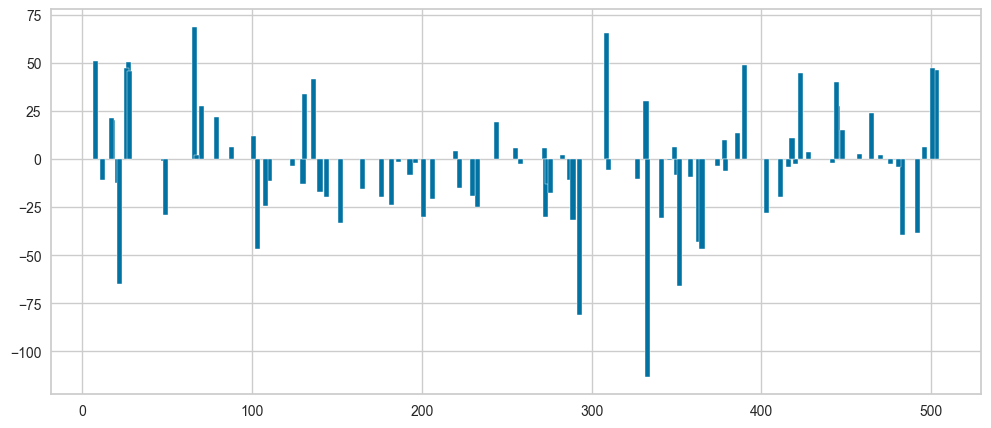

In [645]:
plt.figure(figsize= (12,5))
plt.bar(vr_summary.index,vr_summary['difference %'],width=3)

<AxesSubplot:xlabel='difference %', ylabel='Density'>

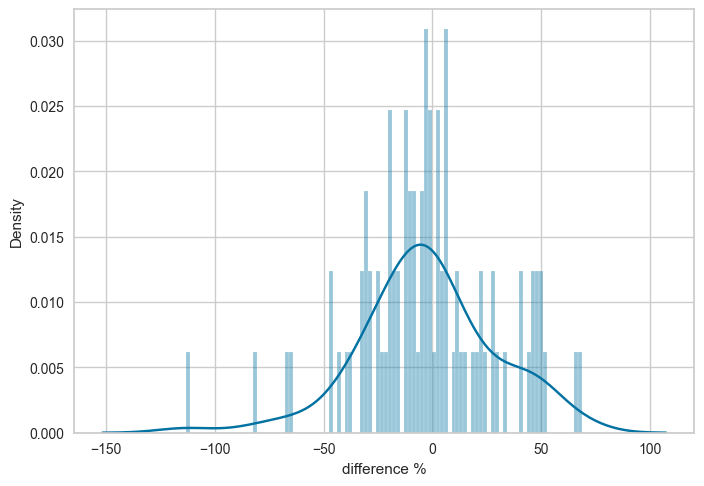

In [657]:
sns.distplot(vr_final_summary['difference %'], bins = 100)

In [658]:
vr_final_summary.to_csv('D:/00-Data Science and Data Analysis/ML Projects/03-Weight prediction for data from ZS-Egypt -first project/Weight_prediction_for_data_from_ZS_Egypt_first_pilot_project-CF.csv')